#Import all necessity functions to execute the program

In [ ]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import random
from collections import Counter
from functools import reduce
from itertools import chain
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

from tqdm import tqdm
from numpy.linalg import norm
from sklearn.neighbors import NearestNeighbors
from keras.utils import load_img, img_to_array

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import Google Drive to access 

In [ ]:
##### To Access the Google Drive #####
def google_drive(parameter = None):
  try:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
  except Exception as e:
    print(e.with_traceback)
  else:
    print('\nGoogle Drive access is done.\n'.title())

try:
  google_drive()
except Exception as e:
  print(e.with_traceback)

Mounted at /content/drive

Google Drive Access Is Done.



#To unzip the Bood cell folder

In [ ]:
##### To Unzip the folder #####
def unzip_file(parameter_ = None):
  try:
    link_folder_ = '/content/drive/MyDrive/CNN Dataset/food.zip'
    zip_ref = zipfile.ZipFile(link_folder_, 'r')
    zip_ref.extractall()
    zip_ref.close()
  except Exception as e:
    print(e.with_traceback)
  else:
    print('Upzip is done succesfully'.title())

##### Call the Unzip function #####
try:
  unzip_file()
except Exception as e:
  print(e.with_traceback)

Upzip Is Done Succesfully


#Extract the Independent and Dependent Features

In [ ]:
_DIRECTORY  = "/content/training"
_CATAGORIES = ["Bread", "Dairy product", "Dessert", "Egg",\
               "Fried food", "Meat", "Noodles-Pasta", "Rice",\
               "Seafood", "Soup", "Vegetable-Fruit"]

"""
/content/Blood_cell_Cancer/Benign
/content/Blood_cell_Cancer/Malignant_Pre_B
/content/Blood_cell_Cancer/Malignant_Pro_B
/content/Blood_cell_Cancer/Malignant_early_Pre_B
"""
data = []
for category in _CATAGORIES:
  path = os.path.join(_DIRECTORY, category)
  for image in os.listdir(path):
    full_path = os.path.join(path, image)
    image_array = cv2.resize(cv2.imread(full_path), (150, 150))
    data.append(image_array)

  print("{} folder is extracted.".format(category).capitalize(),'\n')
  print('*'*50)

Bread folder is extracted. 

**************************************************
Dairy product folder is extracted. 

**************************************************
Dessert folder is extracted. 

**************************************************
Egg folder is extracted. 

**************************************************
Fried food folder is extracted. 

**************************************************
Meat folder is extracted. 

**************************************************
Noodles-pasta folder is extracted. 

**************************************************
Rice folder is extracted. 

**************************************************
Seafood folder is extracted. 

**************************************************
Soup folder is extracted. 

**************************************************
Vegetable-fruit folder is extracted. 

**************************************************


#Take the only Independent Feature

In [ ]:
##### Independent Column #####
independent = []
for x in data:
  independent.append(x)

####Convert the Independent column to the NumPy array

In [ ]:
independent = np.array(independent)
print('The shape of this independent dataset is {}'.format(independent.shape))

The shape of this independent dataset is (9866, 150, 150, 3)


#Install the Transfer-Learning ResNet50

In [ ]:
from keras.applications import ResNet50, VGG16

VGG16_model = VGG16(include_top = False,\
                     weights = 'imagenet',\
                     input_shape = independent.shape[1:])

In [ ]:
##### Show the model summary ####
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

##Make the trainable parameter of VGG16 model False

In [ ]:
try:
  VGG16_model.trainable = False
except Exception as e:
  print(e.with_traceback)
else:
  VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#Create the Model

In [ ]:
def model_creation(activate = None):
  if activate == 'activated':
    ##### Create the Sequential Model ####
    model = Sequential()
    ##### Insert the VGG16 to the Model #####
    model.add(VGG16_model)

    ##### Insert the Pooling Layer to the Model to extract the High Level Features ####
    model.add(GlobalAveragePooling2D())
  
  else:
    raise Exception('There is an Error, Check it again'.capitalize())
  
  return model

try:
  model = model_creation('activated')
except Exception as e:
  print(e.with_traceback)
else:
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
Total params: 14,714,688
Trainable params: 0
Non-trainable params: 14,714,688
_________________________________________________________________


#Extract all the Features

In [ ]:
def extracted_feature(data, activate = None):
  if activate == 'activated':
    ##### Make the dataset in shape of VGG16 #####
    data = np.expand_dims(data, axis = 0)
    extract_feature = model.predict(data).flatten()
    
  else:
    raise Exception('There is an error, please resolve it.'.capitalize())
    print(e.with_traceback)
  
  return (extract_feature/norm(extract_feature))

##### Call the Function #####
try:
  extracted_features_, count = [], 0
  for independent_ in tqdm(independent):
    extracted_features_.append(extracted_feature(independent_, 'activated'))
    count = count + 1

except Exception as e:
  print(e.with_traceback)
else:
  print('{} features are extracted'.format(count))

  0%|          | 0/9866 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|          | 1/9866 [00:02<6:46:57,  2.48s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 3/9866 [00:02<1:52:41,  1.46it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 5/9866 [00:02<59:35,  2.76it/s]  

1/1 [==============================] - 0s 22ms/step


  0%|          | 7/9866 [00:02<38:22,  4.28it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 9/9866 [00:02<27:41,  5.93it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 11/9866 [00:03<21:21,  7.69it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 13/9866 [00:03<17:25,  9.43it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 15/9866 [00:03<14:53, 11.03it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 17/9866 [00:03<13:20, 12.31it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 19/9866 [00:03<12:04, 13.60it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 21/9866 [00:03<11:11, 14.65it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 23/9866 [00:03<10:36, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 25/9866 [00:03<10:09, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 27/9866 [00:03<10:03, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 29/9866 [00:04<09:47, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 31/9866 [00:04<09:30, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 33/9866 [00:04<09:21, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 35/9866 [00:04<09:26, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 37/9866 [00:04<09:17, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 39/9866 [00:04<09:13, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 41/9866 [00:04<09:08, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 43/9866 [00:04<09:17, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 45/9866 [00:04<09:17, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 47/9866 [00:05<09:11, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 49/9866 [00:05<09:07, 17.92it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 51/9866 [00:05<09:03, 18.06it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 53/9866 [00:05<09:21, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 55/9866 [00:05<09:17, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 57/9866 [00:05<09:13, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 59/9866 [00:05<09:13, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 61/9866 [00:05<09:21, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 63/9866 [00:06<09:23, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 65/9866 [00:06<09:21, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 67/9866 [00:06<09:15, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 69/9866 [00:06<09:15, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 71/9866 [00:06<09:28, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 73/9866 [00:06<09:25, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 75/9866 [00:06<09:25, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 77/9866 [00:06<09:23, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 79/9866 [00:06<09:30, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 81/9866 [00:07<09:27, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 83/9866 [00:07<09:20, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 85/9866 [00:07<09:18, 17.53it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 87/9866 [00:07<09:17, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 89/9866 [00:07<09:24, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 91/9866 [00:07<09:20, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 93/9866 [00:07<09:15, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 95/9866 [00:07<09:14, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 97/9866 [00:07<09:14, 17.62it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 99/9866 [00:08<09:10, 17.75it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 101/9866 [00:08<09:03, 17.96it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 103/9866 [00:08<09:01, 18.02it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 105/9866 [00:08<09:01, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 107/9866 [00:08<09:20, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 109/9866 [00:08<09:18, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 111/9866 [00:08<09:19, 17.43it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 113/9866 [00:08<09:16, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 115/9866 [00:08<09:24, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 117/9866 [00:09<09:37, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


  1%|          | 119/9866 [00:09<09:35, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 121/9866 [00:09<09:22, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 123/9866 [00:09<09:31, 17.04it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 125/9866 [00:09<09:19, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 127/9866 [00:09<09:18, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 129/9866 [00:09<09:09, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 131/9866 [00:09<09:05, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 133/9866 [00:10<09:11, 17.63it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 135/9866 [00:10<09:17, 17.45it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 137/9866 [00:10<09:06, 17.81it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 139/9866 [00:10<08:58, 18.08it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 141/9866 [00:10<09:04, 17.87it/s]

1/1 [==============================] - 0s 21ms/step


  1%|▏         | 143/9866 [00:10<09:01, 17.95it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 145/9866 [00:10<09:02, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 147/9866 [00:10<09:00, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 149/9866 [00:10<09:00, 17.98it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 151/9866 [00:11<09:09, 17.67it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 153/9866 [00:11<09:16, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 155/9866 [00:11<09:21, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 157/9866 [00:11<09:14, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 159/9866 [00:11<09:25, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 161/9866 [00:11<09:15, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 163/9866 [00:11<09:10, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 165/9866 [00:11<09:10, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 167/9866 [00:11<09:10, 17.61it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 169/9866 [00:12<13:51, 11.67it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 171/9866 [00:12<12:33, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 173/9866 [00:12<11:41, 13.82it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 175/9866 [00:12<10:57, 14.73it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 177/9866 [00:12<10:41, 15.09it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 179/9866 [00:12<10:18, 15.65it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 181/9866 [00:12<09:54, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 183/9866 [00:13<09:39, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 185/9866 [00:13<09:54, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 187/9866 [00:13<09:48, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 189/9866 [00:13<09:40, 16.66it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 191/9866 [00:13<09:25, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 193/9866 [00:13<09:12, 17.49it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 195/9866 [00:13<09:18, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 197/9866 [00:13<09:15, 17.40it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 199/9866 [00:14<09:15, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 201/9866 [00:14<09:14, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 203/9866 [00:14<09:19, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 205/9866 [00:14<09:16, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 207/9866 [00:14<09:10, 17.55it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 209/9866 [00:14<09:03, 17.77it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 211/9866 [00:14<08:59, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 213/9866 [00:14<09:09, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 215/9866 [00:14<09:13, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 217/9866 [00:15<09:08, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 219/9866 [00:15<09:03, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 221/9866 [00:15<09:19, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 223/9866 [00:15<09:12, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 225/9866 [00:15<09:05, 17.68it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 227/9866 [00:15<09:02, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 229/9866 [00:15<09:01, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 231/9866 [00:15<09:16, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 233/9866 [00:15<09:10, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 235/9866 [00:16<09:04, 17.68it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 237/9866 [00:16<09:00, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 239/9866 [00:16<09:06, 17.61it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 241/9866 [00:16<09:06, 17.61it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 243/9866 [00:16<09:01, 17.77it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 245/9866 [00:16<08:54, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 247/9866 [00:16<08:52, 18.06it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 249/9866 [00:16<09:01, 17.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 251/9866 [00:16<08:56, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 253/9866 [00:17<08:54, 17.98it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 255/9866 [00:17<08:52, 18.06it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 257/9866 [00:17<08:59, 17.81it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 259/9866 [00:17<08:53, 17.99it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 261/9866 [00:17<08:47, 18.21it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 263/9866 [00:17<08:47, 18.21it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 265/9866 [00:17<09:02, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 267/9866 [00:17<08:59, 17.81it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 269/9866 [00:17<08:53, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 271/9866 [00:18<08:53, 18.00it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 273/9866 [00:18<08:47, 18.20it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 275/9866 [00:18<08:58, 17.81it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 277/9866 [00:18<08:54, 17.93it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 279/9866 [00:18<08:48, 18.14it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 281/9866 [00:18<08:45, 18.23it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 283/9866 [00:18<08:59, 17.77it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 285/9866 [00:18<08:59, 17.77it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 287/9866 [00:18<08:54, 17.92it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 289/9866 [00:19<08:54, 17.92it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 291/9866 [00:19<08:51, 18.03it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 293/9866 [00:19<08:58, 17.77it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 295/9866 [00:19<09:12, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 297/9866 [00:19<09:03, 17.60it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 299/9866 [00:19<08:56, 17.84it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 301/9866 [00:19<09:03, 17.61it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 303/9866 [00:19<09:03, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 305/9866 [00:19<08:57, 17.78it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 307/9866 [00:20<08:57, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 309/9866 [00:20<08:51, 17.99it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 311/9866 [00:20<09:04, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 313/9866 [00:20<09:08, 17.42it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 315/9866 [00:20<08:59, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 317/9866 [00:20<08:58, 17.75it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 319/9866 [00:20<09:26, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 321/9866 [00:20<09:21, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 323/9866 [00:21<09:16, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 325/9866 [00:21<09:10, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 327/9866 [00:21<09:05, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 329/9866 [00:21<09:11, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 331/9866 [00:21<09:02, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 333/9866 [00:21<08:55, 17.81it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 335/9866 [00:21<08:56, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 337/9866 [00:21<09:06, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 339/9866 [00:21<09:05, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 341/9866 [00:22<09:03, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 343/9866 [00:22<09:00, 17.62it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 345/9866 [00:22<08:58, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 347/9866 [00:22<09:01, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 349/9866 [00:22<09:25, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 351/9866 [00:22<09:12, 17.22it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 353/9866 [00:22<09:14, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 355/9866 [00:22<09:26, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 357/9866 [00:22<09:19, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 359/9866 [00:23<09:10, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 361/9866 [00:23<08:57, 17.67it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 363/9866 [00:23<08:49, 17.95it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 365/9866 [00:23<09:00, 17.57it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 367/9866 [00:23<08:53, 17.79it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 369/9866 [00:23<08:52, 17.85it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 371/9866 [00:23<08:52, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 373/9866 [00:23<08:55, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 375/9866 [00:23<08:53, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 377/9866 [00:24<08:51, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 379/9866 [00:24<08:46, 18.01it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 381/9866 [00:24<08:48, 17.95it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 383/9866 [00:24<09:05, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 385/9866 [00:24<08:56, 17.67it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 387/9866 [00:24<08:50, 17.86it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 389/9866 [00:24<08:49, 17.90it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 391/9866 [00:24<09:00, 17.53it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 393/9866 [00:24<09:02, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 395/9866 [00:25<09:03, 17.43it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 397/9866 [00:25<08:56, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 399/9866 [00:25<08:49, 17.88it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 401/9866 [00:25<09:01, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 403/9866 [00:25<08:53, 17.74it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 405/9866 [00:25<08:46, 17.96it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 407/9866 [00:25<08:45, 18.00it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 409/9866 [00:25<08:51, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 411/9866 [00:25<08:49, 17.85it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 413/9866 [00:26<08:47, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 415/9866 [00:26<08:44, 18.01it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 417/9866 [00:26<08:48, 17.88it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 419/9866 [00:26<08:56, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 421/9866 [00:26<08:54, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 423/9866 [00:26<08:49, 17.83it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 425/9866 [00:26<08:46, 17.94it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 427/9866 [00:26<08:55, 17.63it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 429/9866 [00:27<08:56, 17.59it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 431/9866 [00:27<08:50, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 433/9866 [00:27<08:45, 17.96it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 435/9866 [00:27<08:53, 17.69it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 437/9866 [00:27<08:49, 17.81it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 439/9866 [00:27<08:49, 17.80it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 441/9866 [00:27<08:46, 17.89it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 443/9866 [00:27<08:56, 17.56it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 445/9866 [00:27<09:13, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 447/9866 [00:28<09:15, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 449/9866 [00:28<09:09, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 451/9866 [00:28<09:03, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 453/9866 [00:28<09:09, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 455/9866 [00:28<09:09, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 457/9866 [00:28<09:01, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 459/9866 [00:28<08:58, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 461/9866 [00:28<09:02, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 463/9866 [00:28<09:10, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 465/9866 [00:29<09:05, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 467/9866 [00:29<08:58, 17.46it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 469/9866 [00:29<09:11, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 471/9866 [00:29<09:16, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 473/9866 [00:29<09:08, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 475/9866 [00:29<08:55, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 477/9866 [00:29<08:50, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 479/9866 [00:29<08:46, 17.82it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 481/9866 [00:30<09:08, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 483/9866 [00:30<09:12, 16.99it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 485/9866 [00:30<08:59, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 487/9866 [00:30<08:55, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 489/9866 [00:30<08:56, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 491/9866 [00:30<08:50, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 493/9866 [00:30<08:47, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 495/9866 [00:30<08:45, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 497/9866 [00:30<08:38, 18.05it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 499/9866 [00:31<08:54, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 501/9866 [00:31<08:51, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 503/9866 [00:31<08:49, 17.69it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 505/9866 [00:31<08:46, 17.78it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 507/9866 [00:31<08:58, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 509/9866 [00:31<08:50, 17.63it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 511/9866 [00:31<08:48, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 513/9866 [00:31<08:48, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 515/9866 [00:31<08:42, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 517/9866 [00:32<08:49, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 519/9866 [00:32<08:49, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 521/9866 [00:32<08:47, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 523/9866 [00:32<08:43, 17.84it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 525/9866 [00:32<08:48, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 527/9866 [00:32<08:45, 17.77it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 529/9866 [00:32<08:45, 17.78it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 531/9866 [00:32<08:43, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 533/9866 [00:32<08:43, 17.81it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 535/9866 [00:33<09:02, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 537/9866 [00:33<08:57, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 539/9866 [00:33<08:46, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 541/9866 [00:33<08:40, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 543/9866 [00:33<08:42, 17.86it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 545/9866 [00:33<08:45, 17.74it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 547/9866 [00:33<08:41, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 549/9866 [00:33<08:40, 17.89it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 551/9866 [00:33<08:44, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 553/9866 [00:34<08:59, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 555/9866 [00:34<08:53, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 557/9866 [00:34<08:51, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 559/9866 [00:34<08:51, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 561/9866 [00:34<08:54, 17.40it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 563/9866 [00:34<08:48, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 565/9866 [00:34<09:03, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 567/9866 [00:34<08:57, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 569/9866 [00:35<08:55, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 571/9866 [00:35<09:12, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 573/9866 [00:35<09:04, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 575/9866 [00:35<08:55, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 577/9866 [00:35<08:52, 17.43it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 579/9866 [00:35<08:54, 17.36it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 581/9866 [00:35<09:08, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 583/9866 [00:35<09:06, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 585/9866 [00:35<09:03, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 587/9866 [00:36<09:01, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 589/9866 [00:36<09:04, 17.03it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 591/9866 [00:36<08:55, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 593/9866 [00:36<08:45, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 595/9866 [00:36<08:38, 17.87it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 597/9866 [00:36<08:45, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 599/9866 [00:36<08:49, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 601/9866 [00:36<08:43, 17.71it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 603/9866 [00:36<08:46, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 605/9866 [00:37<08:41, 17.77it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 607/9866 [00:37<09:01, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 609/9866 [00:37<08:58, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 611/9866 [00:37<08:52, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 613/9866 [00:37<08:51, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 615/9866 [00:37<09:01, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 617/9866 [00:37<09:05, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 619/9866 [00:37<09:09, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 621/9866 [00:38<09:06, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 623/9866 [00:38<08:59, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 625/9866 [00:38<09:07, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 627/9866 [00:38<08:57, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 629/9866 [00:38<08:50, 17.43it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 631/9866 [00:38<08:41, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 633/9866 [00:38<08:49, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 635/9866 [00:38<09:08, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 637/9866 [00:38<08:57, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 639/9866 [00:39<08:52, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 641/9866 [00:39<08:51, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 643/9866 [00:39<08:59, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 645/9866 [00:39<08:55, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 647/9866 [00:39<08:47, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 649/9866 [00:39<08:41, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 651/9866 [00:39<08:52, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 653/9866 [00:39<08:46, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 655/9866 [00:39<08:46, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 657/9866 [00:40<08:46, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 659/9866 [00:40<08:38, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 661/9866 [00:40<08:45, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 663/9866 [00:40<08:39, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 665/9866 [00:40<08:36, 17.80it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 667/9866 [00:40<08:31, 17.99it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 669/9866 [00:40<08:43, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 671/9866 [00:40<08:45, 17.49it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 673/9866 [00:40<08:45, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 675/9866 [00:41<08:42, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 677/9866 [00:41<08:40, 17.65it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 679/9866 [00:41<08:54, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 681/9866 [00:41<08:56, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 683/9866 [00:41<08:50, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 685/9866 [00:41<08:45, 17.46it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 687/9866 [00:41<08:53, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 689/9866 [00:41<08:45, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 691/9866 [00:42<08:42, 17.57it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 693/9866 [00:42<08:46, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 695/9866 [00:42<08:43, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 697/9866 [00:42<08:50, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 699/9866 [00:42<08:43, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 701/9866 [00:42<08:39, 17.65it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 703/9866 [00:42<08:36, 17.75it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 705/9866 [00:42<08:58, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 707/9866 [00:42<08:58, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 709/9866 [00:43<09:01, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 711/9866 [00:43<08:57, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 713/9866 [00:43<08:47, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 715/9866 [00:43<08:55, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 717/9866 [00:43<08:49, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 719/9866 [00:43<08:43, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 721/9866 [00:43<08:46, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 723/9866 [00:43<08:50, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 725/9866 [00:43<08:43, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 727/9866 [00:44<08:39, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 729/9866 [00:44<08:41, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 731/9866 [00:44<08:40, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 733/9866 [00:44<08:51, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


  7%|▋         | 735/9866 [00:44<08:42, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 737/9866 [00:44<08:36, 17.68it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 739/9866 [00:44<08:39, 17.57it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 741/9866 [00:44<08:48, 17.26it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 743/9866 [00:45<08:47, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 745/9866 [00:45<08:43, 17.44it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 747/9866 [00:45<08:48, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 749/9866 [00:45<09:02, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 751/9866 [00:45<09:02, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 753/9866 [00:45<08:54, 17.05it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 755/9866 [00:45<08:51, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 757/9866 [00:45<08:44, 17.35it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 759/9866 [00:45<09:03, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 761/9866 [00:46<08:59, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 763/9866 [00:46<08:49, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 765/9866 [00:46<08:48, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 767/9866 [00:46<08:52, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 769/9866 [00:46<08:50, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 771/9866 [00:46<08:46, 17.27it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 773/9866 [00:46<08:49, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 775/9866 [00:46<08:44, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 777/9866 [00:47<08:52, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 779/9866 [00:47<08:45, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 781/9866 [00:47<08:45, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 783/9866 [00:47<08:42, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 785/9866 [00:47<08:51, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 787/9866 [00:47<08:52, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 789/9866 [00:47<08:43, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 791/9866 [00:47<08:40, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 793/9866 [00:47<08:34, 17.64it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 795/9866 [00:48<08:56, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 797/9866 [00:48<08:47, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 799/9866 [00:48<08:38, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 801/9866 [00:48<08:38, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 803/9866 [00:48<08:41, 17.39it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 805/9866 [00:48<08:36, 17.53it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 807/9866 [00:48<08:38, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 809/9866 [00:48<08:33, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 811/9866 [00:48<08:26, 17.89it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 813/9866 [00:49<08:38, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 815/9866 [00:49<08:33, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 817/9866 [00:49<08:29, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 819/9866 [00:49<08:27, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 821/9866 [00:49<08:34, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 823/9866 [00:49<08:31, 17.68it/s]

1/1 [==============================] - 0s 21ms/step


  8%|▊         | 825/9866 [00:49<08:31, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 827/9866 [00:49<08:33, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 829/9866 [00:49<08:30, 17.71it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 831/9866 [00:50<08:37, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 833/9866 [00:50<08:36, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 835/9866 [00:50<08:38, 17.43it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 837/9866 [00:50<08:35, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 839/9866 [00:50<08:43, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 841/9866 [00:50<08:35, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 843/9866 [00:50<08:36, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▊         | 845/9866 [00:50<08:33, 17.57it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▊         | 847/9866 [00:51<08:32, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 849/9866 [00:51<08:44, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 851/9866 [00:51<08:35, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 853/9866 [00:51<08:30, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 855/9866 [00:51<08:26, 17.79it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 857/9866 [00:51<08:35, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 859/9866 [00:51<08:34, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▊         | 861/9866 [00:51<08:27, 17.75it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▊         | 863/9866 [00:51<08:26, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 865/9866 [00:52<08:22, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 867/9866 [00:52<08:34, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 869/9866 [00:52<08:30, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 871/9866 [00:52<08:26, 17.77it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 873/9866 [00:52<08:21, 17.91it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 875/9866 [00:52<08:24, 17.83it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 877/9866 [00:52<08:23, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 879/9866 [00:52<08:24, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 881/9866 [00:52<08:28, 17.68it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 883/9866 [00:53<08:27, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 885/9866 [00:53<08:31, 17.55it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 887/9866 [00:53<08:24, 17.80it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 889/9866 [00:53<08:20, 17.94it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 891/9866 [00:53<08:17, 18.04it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 893/9866 [00:53<08:25, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 895/9866 [00:53<08:30, 17.57it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 897/9866 [00:53<08:27, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 899/9866 [00:53<08:25, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 901/9866 [00:54<08:21, 17.88it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 903/9866 [00:54<08:30, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 905/9866 [00:54<08:30, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 907/9866 [00:54<08:30, 17.56it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 909/9866 [00:54<08:38, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 911/9866 [00:54<08:41, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 913/9866 [00:54<08:42, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 915/9866 [00:54<08:36, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 917/9866 [00:54<08:36, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


  9%|▉         | 919/9866 [00:55<08:37, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 921/9866 [00:55<08:48, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 923/9866 [00:55<08:44, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 925/9866 [00:55<08:42, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 927/9866 [00:55<08:41, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 929/9866 [00:55<08:53, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 931/9866 [00:55<08:50, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 933/9866 [00:55<08:37, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


  9%|▉         | 935/9866 [00:56<08:28, 17.58it/s]

1/1 [==============================] - 0s 22ms/step


  9%|▉         | 937/9866 [00:56<08:21, 17.80it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 939/9866 [00:56<08:33, 17.37it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 941/9866 [00:56<08:33, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 943/9866 [00:56<08:30, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 945/9866 [00:56<08:27, 17.59it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 947/9866 [00:56<08:33, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 949/9866 [00:56<08:42, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 951/9866 [00:56<08:38, 17.19it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 953/9866 [00:57<08:31, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 955/9866 [00:57<08:33, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 957/9866 [00:57<08:47, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 959/9866 [00:57<08:43, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 961/9866 [00:57<08:39, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 963/9866 [00:57<08:37, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 965/9866 [00:57<08:43, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 967/9866 [00:57<08:37, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 969/9866 [00:58<08:30, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 971/9866 [00:58<08:29, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 973/9866 [00:58<08:23, 17.67it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 975/9866 [00:58<08:33, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


 10%|▉         | 977/9866 [00:58<08:30, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 979/9866 [00:58<08:28, 17.49it/s]

1/1 [==============================] - 0s 21ms/step


 10%|▉         | 981/9866 [00:58<08:26, 17.56it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 983/9866 [00:58<08:28, 17.46it/s]

1/1 [==============================] - 0s 22ms/step


 10%|▉         | 985/9866 [00:58<08:26, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 10%|█         | 987/9866 [00:59<08:27, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 989/9866 [00:59<08:24, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 991/9866 [00:59<08:22, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 993/9866 [00:59<08:28, 17.44it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 995/9866 [00:59<08:28, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 997/9866 [00:59<08:34, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 10%|█         | 999/9866 [00:59<08:26, 17.49it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1001/9866 [01:00<14:23, 10.26it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1003/9866 [01:00<12:57, 11.39it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1005/9866 [01:00<11:55, 12.38it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1007/9866 [01:00<11:12, 13.17it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1009/9866 [01:00<10:42, 13.78it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1011/9866 [01:00<10:38, 13.87it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 1013/9866 [01:00<10:19, 14.30it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 1015/9866 [01:01<10:10, 14.49it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1017/9866 [01:01<10:01, 14.71it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 1019/9866 [01:01<10:34, 13.94it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1021/9866 [01:01<10:14, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1023/9866 [01:01<10:00, 14.71it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1025/9866 [01:01<09:50, 14.97it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1027/9866 [01:01<09:52, 14.91it/s]

1/1 [==============================] - 0s 31ms/step


 10%|█         | 1029/9866 [01:01<09:51, 14.93it/s]

1/1 [==============================] - 0s 28ms/step


 10%|█         | 1031/9866 [01:02<09:44, 15.11it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 1033/9866 [01:02<09:43, 15.14it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 1035/9866 [01:02<09:45, 15.08it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1037/9866 [01:02<09:47, 15.03it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1039/9866 [01:02<09:40, 15.21it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 1041/9866 [01:02<09:39, 15.24it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 1043/9866 [01:02<09:50, 14.94it/s]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 1045/9866 [01:03<10:11, 14.42it/s]

1/1 [==============================] - 0s 27ms/step


 11%|█         | 1047/9866 [01:03<09:52, 14.88it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1049/9866 [01:03<09:42, 15.13it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1051/9866 [01:03<09:33, 15.36it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1053/9866 [01:03<09:38, 15.24it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1055/9866 [01:03<09:26, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1057/9866 [01:03<09:26, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1059/9866 [01:03<09:21, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1061/9866 [01:04<09:11, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1063/9866 [01:04<09:20, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1065/9866 [01:04<09:14, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1067/9866 [01:04<09:09, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1069/9866 [01:04<08:59, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 1071/9866 [01:04<09:13, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1073/9866 [01:04<09:06, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1075/9866 [01:04<08:58, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1077/9866 [01:05<08:58, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1079/9866 [01:05<08:55, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1081/9866 [01:05<09:07, 16.05it/s]

1/1 [==============================] - 0s 26ms/step


 11%|█         | 1083/9866 [01:05<09:16, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1085/9866 [01:05<09:07, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1087/9866 [01:05<09:00, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1089/9866 [01:05<09:16, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1091/9866 [01:05<09:05, 16.09it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1093/9866 [01:06<08:57, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1095/9866 [01:06<08:53, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1097/9866 [01:06<08:46, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1099/9866 [01:06<08:57, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█         | 1101/9866 [01:06<08:49, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1103/9866 [01:06<08:42, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1105/9866 [01:06<08:44, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 1107/9866 [01:06<08:55, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 1109/9866 [01:07<08:50, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1111/9866 [01:07<08:41, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1113/9866 [01:07<08:37, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 11%|█▏        | 1115/9866 [01:07<08:44, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1117/9866 [01:07<08:58, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1119/9866 [01:07<08:45, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1121/9866 [01:07<08:47, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1123/9866 [01:07<08:36, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1125/9866 [01:07<08:40, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█▏        | 1127/9866 [01:08<08:31, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1129/9866 [01:08<08:25, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 1131/9866 [01:08<08:24, 17.32it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 1133/9866 [01:08<08:32, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1135/9866 [01:08<08:34, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1137/9866 [01:08<08:28, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1139/9866 [01:08<08:31, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1141/9866 [01:08<08:23, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1143/9866 [01:09<08:35, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1145/9866 [01:09<08:30, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1147/9866 [01:09<08:25, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1149/9866 [01:09<08:22, 17.34it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1151/9866 [01:09<08:33, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1153/9866 [01:09<08:37, 16.84it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1155/9866 [01:09<08:35, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 1157/9866 [01:09<08:35, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1159/9866 [01:09<08:36, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1161/9866 [01:10<08:45, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1163/9866 [01:10<08:42, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1165/9866 [01:10<08:35, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1167/9866 [01:10<08:30, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1169/9866 [01:10<08:32, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1171/9866 [01:10<08:28, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1173/9866 [01:10<08:26, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1175/9866 [01:10<08:22, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1177/9866 [01:10<08:15, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1179/9866 [01:11<08:24, 17.21it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1181/9866 [01:11<08:19, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1183/9866 [01:11<08:24, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1185/9866 [01:11<08:17, 17.46it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 1187/9866 [01:11<08:44, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1189/9866 [01:11<08:41, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1191/9866 [01:11<08:46, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1193/9866 [01:11<08:44, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1195/9866 [01:12<08:39, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1197/9866 [01:12<08:44, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1199/9866 [01:12<08:36, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 1201/9866 [01:12<08:29, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1203/9866 [01:12<08:31, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1205/9866 [01:12<08:36, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1207/9866 [01:12<08:29, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1209/9866 [01:12<08:26, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1211/9866 [01:13<08:25, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1213/9866 [01:13<08:25, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1215/9866 [01:13<08:34, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1217/9866 [01:13<08:31, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1219/9866 [01:13<08:25, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1221/9866 [01:13<08:22, 17.20it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 1223/9866 [01:13<08:33, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1225/9866 [01:13<08:30, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1227/9866 [01:13<08:27, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 1229/9866 [01:14<08:24, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1231/9866 [01:14<08:20, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 12%|█▏        | 1233/9866 [01:14<08:27, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1235/9866 [01:14<08:26, 17.05it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1237/9866 [01:14<08:14, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1239/9866 [01:14<08:18, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1241/9866 [01:14<08:20, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1243/9866 [01:14<08:16, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 1245/9866 [01:15<08:22, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1247/9866 [01:15<08:21, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1249/9866 [01:15<08:12, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1251/9866 [01:15<08:22, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1253/9866 [01:15<08:13, 17.46it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1255/9866 [01:15<08:07, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1257/9866 [01:15<08:04, 17.76it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1259/9866 [01:15<08:10, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1261/9866 [01:15<08:14, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1263/9866 [01:16<08:17, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1265/9866 [01:16<08:15, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1267/9866 [01:16<08:13, 17.44it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1269/9866 [01:16<08:17, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1271/9866 [01:16<08:10, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1273/9866 [01:16<08:05, 17.70it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1275/9866 [01:16<08:03, 17.77it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1277/9866 [01:16<08:13, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1279/9866 [01:16<08:16, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1281/9866 [01:17<08:11, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1283/9866 [01:17<08:04, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1285/9866 [01:17<08:07, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1287/9866 [01:17<08:13, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1289/9866 [01:17<08:08, 17.57it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1291/9866 [01:17<08:02, 17.76it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1293/9866 [01:17<08:10, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1295/9866 [01:17<08:15, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1297/9866 [01:17<08:17, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1299/9866 [01:18<08:11, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1301/9866 [01:18<08:11, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1303/9866 [01:18<08:14, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1305/9866 [01:18<08:23, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1307/9866 [01:18<08:21, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1309/9866 [01:18<08:21, 17.06it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1311/9866 [01:18<08:30, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1313/9866 [01:18<08:46, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1315/9866 [01:19<08:51, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1317/9866 [01:19<08:37, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1319/9866 [01:19<08:35, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 1321/9866 [01:19<08:38, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 1323/9866 [01:19<08:44, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 1325/9866 [01:19<08:41, 16.38it/s]

1/1 [==============================] - 0s 21ms/step


 13%|█▎        | 1327/9866 [01:19<08:37, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1329/9866 [01:19<08:28, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 1331/9866 [01:20<08:38, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 1333/9866 [01:20<08:39, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 1335/9866 [01:20<08:34, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1337/9866 [01:20<08:30, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1339/9866 [01:20<08:19, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1341/9866 [01:20<08:31, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1343/9866 [01:20<08:23, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1345/9866 [01:20<08:24, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1347/9866 [01:20<08:20, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 1349/9866 [01:21<08:26, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1351/9866 [01:21<08:19, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1353/9866 [01:21<08:20, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▎        | 1355/9866 [01:21<08:14, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1357/9866 [01:21<08:08, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1359/9866 [01:21<08:13, 17.25it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▍        | 1361/9866 [01:21<08:22, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1363/9866 [01:21<08:19, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1365/9866 [01:22<08:19, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1367/9866 [01:22<08:21, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1369/9866 [01:22<08:25, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1371/9866 [01:22<08:19, 17.02it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1373/9866 [01:22<08:11, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1375/9866 [01:22<08:15, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1377/9866 [01:22<08:18, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1379/9866 [01:22<08:19, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1381/9866 [01:22<08:15, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1383/9866 [01:23<08:11, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1385/9866 [01:23<08:14, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1387/9866 [01:23<08:12, 17.20it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1389/9866 [01:23<08:03, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1391/9866 [01:23<08:02, 17.57it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1393/9866 [01:23<08:11, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1395/9866 [01:23<08:21, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1397/9866 [01:23<08:11, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1399/9866 [01:24<08:13, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1401/9866 [01:24<08:09, 17.28it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1403/9866 [01:24<08:24, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1405/9866 [01:24<08:26, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1407/9866 [01:24<08:18, 16.97it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1409/9866 [01:24<08:06, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1411/9866 [01:24<07:59, 17.64it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1413/9866 [01:24<08:09, 17.27it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 1415/9866 [01:24<08:20, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1417/9866 [01:25<08:23, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▍        | 1419/9866 [01:25<08:14, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1421/9866 [01:25<08:22, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 1423/9866 [01:25<08:17, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1425/9866 [01:25<08:11, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1427/9866 [01:25<08:02, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 1429/9866 [01:25<07:59, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1431/9866 [01:25<08:07, 17.31it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1433/9866 [01:25<08:18, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1435/9866 [01:26<08:12, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1437/9866 [01:26<08:04, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1439/9866 [01:26<08:07, 17.30it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1441/9866 [01:26<08:10, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1443/9866 [01:26<08:08, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1445/9866 [01:26<08:08, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1447/9866 [01:26<08:04, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1449/9866 [01:26<08:14, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▍        | 1451/9866 [01:27<08:16, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1453/9866 [01:27<08:16, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1455/9866 [01:27<08:08, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1457/9866 [01:27<08:13, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1459/9866 [01:27<08:13, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1461/9866 [01:27<08:10, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 1463/9866 [01:27<08:03, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1465/9866 [01:27<08:02, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1467/9866 [01:27<08:21, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1469/9866 [01:28<08:17, 16.89it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▍        | 1471/9866 [01:28<08:10, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1473/9866 [01:28<08:11, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1475/9866 [01:28<08:14, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1477/9866 [01:28<08:09, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▍        | 1479/9866 [01:28<08:02, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1481/9866 [01:28<08:04, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1483/9866 [01:28<08:04, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1485/9866 [01:29<08:20, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1487/9866 [01:29<08:21, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1489/9866 [01:29<08:15, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1491/9866 [01:29<08:17, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1493/9866 [01:29<08:25, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1495/9866 [01:29<08:22, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1497/9866 [01:29<08:17, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1499/9866 [01:29<08:08, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1501/9866 [01:29<08:11, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1503/9866 [01:30<08:19, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1505/9866 [01:30<08:19, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1507/9866 [01:30<08:18, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1509/9866 [01:30<08:11, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 15%|█▌        | 1511/9866 [01:30<08:17, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1513/9866 [01:30<08:11, 17.01it/s]

1/1 [==============================] - 0s 21ms/step


 15%|█▌        | 1515/9866 [01:30<08:02, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1517/9866 [01:30<08:01, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1519/9866 [01:31<08:12, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1521/9866 [01:31<08:20, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 1523/9866 [01:31<08:18, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1525/9866 [01:31<08:11, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1527/9866 [01:31<08:04, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 1529/9866 [01:31<08:16, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1531/9866 [01:31<08:09, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1533/9866 [01:31<08:08, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1535/9866 [01:31<08:13, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1537/9866 [01:32<08:23, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1539/9866 [01:32<08:29, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1541/9866 [01:32<08:25, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1543/9866 [01:32<08:14, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1545/9866 [01:32<08:08, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1547/9866 [01:32<08:25, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1549/9866 [01:32<08:23, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1551/9866 [01:32<08:17, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1553/9866 [01:33<08:14, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1555/9866 [01:33<08:10, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1557/9866 [01:33<08:13, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1559/9866 [01:33<08:11, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1561/9866 [01:33<08:04, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1563/9866 [01:33<07:54, 17.50it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1565/9866 [01:33<07:56, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1567/9866 [01:33<07:54, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1569/9866 [01:33<07:55, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1571/9866 [01:34<08:00, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1573/9866 [01:34<07:57, 17.38it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1575/9866 [01:34<08:07, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 1577/9866 [01:34<08:13, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1579/9866 [01:34<08:12, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1581/9866 [01:34<08:09, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1583/9866 [01:34<08:19, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1585/9866 [01:34<08:15, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1587/9866 [01:35<08:11, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1589/9866 [01:35<08:06, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1591/9866 [01:35<08:00, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1593/9866 [01:35<08:09, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1595/9866 [01:35<08:07, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▌        | 1597/9866 [01:35<08:06, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1599/9866 [01:35<08:18, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1601/9866 [01:35<08:22, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 1603/9866 [01:36<08:23, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▋        | 1605/9866 [01:36<08:23, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1607/9866 [01:36<08:15, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1609/9866 [01:36<08:12, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 1611/9866 [01:36<08:24, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1613/9866 [01:36<08:22, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1615/9866 [01:36<08:17, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1617/9866 [01:36<08:19, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1619/9866 [01:36<08:22, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 16%|█▋        | 1621/9866 [01:37<08:17, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 1623/9866 [01:37<08:11, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1625/9866 [01:37<08:07, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▋        | 1627/9866 [01:37<08:04, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1629/9866 [01:37<08:11, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1631/9866 [01:37<08:06, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1633/9866 [01:37<08:01, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1635/9866 [01:37<08:05, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1637/9866 [01:38<08:09, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1639/9866 [01:38<08:08, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1641/9866 [01:38<08:02, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1643/9866 [01:38<07:57, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1645/9866 [01:38<07:52, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1647/9866 [01:38<07:59, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1649/9866 [01:38<07:59, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1651/9866 [01:38<07:54, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1653/9866 [01:38<07:51, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1655/9866 [01:39<08:01, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1657/9866 [01:39<08:03, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1659/9866 [01:39<07:55, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1661/9866 [01:39<07:56, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1663/9866 [01:39<07:54, 17.29it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1665/9866 [01:39<07:59, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1667/9866 [01:39<07:54, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1669/9866 [01:39<07:51, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1671/9866 [01:40<07:54, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1673/9866 [01:40<08:01, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1675/9866 [01:40<08:08, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1677/9866 [01:40<08:03, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1679/9866 [01:40<07:56, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1681/9866 [01:40<07:52, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1683/9866 [01:40<08:02, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1685/9866 [01:40<08:00, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1687/9866 [01:40<08:02, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1689/9866 [01:41<07:56, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1691/9866 [01:41<08:02, 16.95it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1693/9866 [01:41<08:10, 16.65it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1695/9866 [01:41<08:08, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1697/9866 [01:41<08:07, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1699/9866 [01:41<07:53, 17.25it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 1701/9866 [01:41<08:13, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1703/9866 [01:41<08:04, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1705/9866 [01:42<07:54, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1707/9866 [01:42<07:50, 17.33it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 1709/9866 [01:42<07:56, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 1711/9866 [01:42<07:57, 17.07it/s]

1/1 [==============================] - 0s 21ms/step


 17%|█▋        | 1713/9866 [01:42<07:51, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1715/9866 [01:42<07:44, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1717/9866 [01:42<07:44, 17.56it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1719/9866 [01:42<07:49, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1721/9866 [01:42<07:44, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1723/9866 [01:43<07:42, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


 17%|█▋        | 1725/9866 [01:43<07:34, 17.93it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1727/9866 [01:43<07:39, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1729/9866 [01:43<07:43, 17.55it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1731/9866 [01:43<07:38, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1733/9866 [01:43<07:36, 17.81it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1735/9866 [01:43<07:34, 17.90it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1737/9866 [01:43<07:41, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1739/9866 [01:43<07:36, 17.81it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1741/9866 [01:44<07:33, 17.90it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1743/9866 [01:44<07:31, 17.99it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 1745/9866 [01:44<07:54, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1747/9866 [01:44<07:58, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1749/9866 [01:44<07:52, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1751/9866 [01:44<07:43, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1753/9866 [01:44<07:37, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1755/9866 [01:44<07:40, 17.60it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1757/9866 [01:44<07:38, 17.67it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1759/9866 [01:45<07:36, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1761/9866 [01:45<07:47, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1763/9866 [01:45<07:56, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1765/9866 [01:45<07:51, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1767/9866 [01:45<07:45, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1769/9866 [01:45<07:49, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1771/9866 [01:45<07:49, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1773/9866 [01:45<07:57, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1775/9866 [01:46<08:03, 16.72it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1777/9866 [01:46<07:51, 17.15it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1779/9866 [01:46<07:40, 17.57it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1781/9866 [01:46<07:48, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1783/9866 [01:46<07:47, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1785/9866 [01:46<07:51, 17.15it/s]

1/1 [==============================] - 0s 26ms/step


 18%|█▊        | 1787/9866 [01:46<07:52, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1789/9866 [01:46<07:56, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1791/9866 [01:46<08:07, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1793/9866 [01:47<07:57, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1795/9866 [01:47<07:56, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1797/9866 [01:47<07:48, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


 18%|█▊        | 1799/9866 [01:47<07:57, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1801/9866 [01:47<07:58, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1803/9866 [01:47<07:49, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1805/9866 [01:47<07:46, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1807/9866 [01:47<07:51, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1809/9866 [01:48<07:58, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1811/9866 [01:48<08:02, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1813/9866 [01:48<07:58, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1815/9866 [01:48<07:55, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1817/9866 [01:48<07:53, 17.00it/s]

1/1 [==============================] - 0s 21ms/step


 18%|█▊        | 1819/9866 [01:48<07:48, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 1821/9866 [01:48<07:59, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1823/9866 [01:48<08:03, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 1825/9866 [01:48<07:58, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1827/9866 [01:49<08:03, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1829/9866 [01:49<07:53, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1831/9866 [01:49<07:43, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 1833/9866 [01:49<07:43, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 1835/9866 [01:49<07:43, 17.34it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 1837/9866 [01:49<13:18, 10.06it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 1839/9866 [01:50<11:53, 11.26it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 1841/9866 [01:50<10:56, 12.22it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▊        | 1843/9866 [01:50<10:24, 12.84it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 1845/9866 [01:50<10:05, 13.24it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 1847/9866 [01:50<09:48, 13.62it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▊        | 1849/9866 [01:50<09:26, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1851/9866 [01:50<09:26, 14.15it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1853/9866 [01:51<09:35, 13.94it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1855/9866 [01:51<09:33, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1857/9866 [01:51<09:14, 14.44it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1859/9866 [01:51<09:07, 14.62it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1861/9866 [01:51<09:14, 14.43it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1863/9866 [01:51<09:07, 14.61it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1865/9866 [01:51<09:02, 14.76it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 1867/9866 [01:51<08:58, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1869/9866 [01:52<08:55, 14.93it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1871/9866 [01:52<09:02, 14.73it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▉        | 1873/9866 [01:52<09:05, 14.65it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1875/9866 [01:52<08:57, 14.86it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1877/9866 [01:52<08:54, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1879/9866 [01:52<08:58, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1881/9866 [01:52<08:52, 14.99it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1883/9866 [01:53<08:45, 15.19it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1885/9866 [01:53<08:38, 15.39it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1887/9866 [01:53<08:39, 15.36it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1889/9866 [01:53<08:47, 15.11it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1891/9866 [01:53<08:39, 15.34it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1893/9866 [01:53<08:38, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1895/9866 [01:53<08:38, 15.38it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1897/9866 [01:53<08:44, 15.18it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1899/9866 [01:54<08:42, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1901/9866 [01:54<08:33, 15.51it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 1903/9866 [01:54<08:30, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1905/9866 [01:54<08:26, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1907/9866 [01:54<08:45, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1909/9866 [01:54<08:48, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1911/9866 [01:54<08:37, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▉        | 1913/9866 [01:55<08:36, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1915/9866 [01:55<08:39, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 1917/9866 [01:55<08:31, 15.55it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1919/9866 [01:55<08:23, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 1921/9866 [01:55<08:14, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 1923/9866 [01:55<08:35, 15.40it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 1925/9866 [01:55<08:23, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1927/9866 [01:55<08:17, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1929/9866 [01:56<08:16, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1931/9866 [01:56<08:06, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1933/9866 [01:56<08:10, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1935/9866 [01:56<08:04, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1937/9866 [01:56<08:01, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1939/9866 [01:56<08:03, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1941/9866 [01:56<08:08, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1943/9866 [01:56<07:59, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1945/9866 [01:56<08:04, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1947/9866 [01:57<07:58, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1949/9866 [01:57<07:51, 16.81it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1951/9866 [01:57<07:57, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1953/9866 [01:57<07:52, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1955/9866 [01:57<07:49, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 1957/9866 [01:57<07:42, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1959/9866 [01:57<07:55, 16.64it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 1961/9866 [01:57<07:52, 16.72it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 1963/9866 [01:58<07:50, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1965/9866 [01:58<07:54, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1967/9866 [01:58<07:49, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1969/9866 [01:58<07:54, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1971/9866 [01:58<07:48, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 1973/9866 [01:58<07:49, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1975/9866 [01:58<07:44, 16.99it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1977/9866 [01:58<07:48, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1979/9866 [01:59<07:53, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1981/9866 [01:59<07:45, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1983/9866 [01:59<07:51, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1985/9866 [01:59<07:45, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1987/9866 [01:59<07:52, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1989/9866 [01:59<07:47, 16.86it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1991/9866 [01:59<08:00, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1993/9866 [01:59<08:00, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1995/9866 [01:59<08:01, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 1997/9866 [02:00<08:00, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 1999/9866 [02:00<07:56, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2001/9866 [02:00<07:53, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2003/9866 [02:00<07:45, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2005/9866 [02:00<07:46, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2007/9866 [02:00<07:45, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2009/9866 [02:00<07:40, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2011/9866 [02:00<07:34, 17.27it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2013/9866 [02:01<07:46, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 2015/9866 [02:01<07:54, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2017/9866 [02:01<07:53, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 2019/9866 [02:01<07:45, 16.85it/s]

1/1 [==============================] - 0s 21ms/step


 20%|██        | 2021/9866 [02:01<07:32, 17.32it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2023/9866 [02:01<07:38, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2025/9866 [02:01<07:38, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2027/9866 [02:01<07:31, 17.35it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2029/9866 [02:01<07:31, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2031/9866 [02:02<07:38, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2033/9866 [02:02<07:32, 17.30it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2035/9866 [02:02<07:27, 17.49it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2037/9866 [02:02<07:23, 17.66it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2039/9866 [02:02<07:22, 17.68it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2041/9866 [02:02<07:32, 17.29it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2043/9866 [02:02<07:39, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2045/9866 [02:02<07:33, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2047/9866 [02:03<07:28, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2049/9866 [02:03<07:29, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2051/9866 [02:03<07:24, 17.58it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2053/9866 [02:03<07:18, 17.80it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2055/9866 [02:03<07:15, 17.93it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2057/9866 [02:03<07:15, 17.92it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2059/9866 [02:03<07:21, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2061/9866 [02:03<07:19, 17.77it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 2063/9866 [02:03<07:19, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2065/9866 [02:04<07:16, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2067/9866 [02:04<07:28, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2069/9866 [02:04<07:24, 17.55it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2071/9866 [02:04<07:19, 17.75it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2073/9866 [02:04<07:19, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2075/9866 [02:04<07:20, 17.71it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 2077/9866 [02:04<07:27, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██        | 2079/9866 [02:04<07:21, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2081/9866 [02:04<07:17, 17.80it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2083/9866 [02:05<07:17, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2085/9866 [02:05<07:25, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2087/9866 [02:05<07:21, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2089/9866 [02:05<07:15, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2091/9866 [02:05<07:12, 17.99it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2093/9866 [02:05<07:12, 17.95it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 2095/9866 [02:05<07:27, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2097/9866 [02:05<07:29, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2099/9866 [02:05<07:25, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2101/9866 [02:06<07:18, 17.72it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2103/9866 [02:06<07:22, 17.54it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2105/9866 [02:06<07:22, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2107/9866 [02:06<07:21, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2109/9866 [02:06<07:17, 17.75it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 2111/9866 [02:06<07:20, 17.61it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2113/9866 [02:06<07:29, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2115/9866 [02:06<07:36, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██▏       | 2117/9866 [02:06<07:29, 17.24it/s]

1/1 [==============================] - 0s 21ms/step


 21%|██▏       | 2119/9866 [02:07<07:25, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██▏       | 2121/9866 [02:07<07:38, 16.88it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2123/9866 [02:07<07:28, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2125/9866 [02:07<07:24, 17.41it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2127/9866 [02:07<07:17, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2129/9866 [02:07<07:13, 17.84it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2131/9866 [02:07<07:21, 17.53it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2133/9866 [02:07<07:16, 17.74it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2135/9866 [02:08<07:13, 17.84it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2137/9866 [02:08<07:16, 17.72it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2139/9866 [02:08<07:19, 17.59it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2141/9866 [02:08<07:16, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2143/9866 [02:08<07:16, 17.71it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2145/9866 [02:08<07:10, 17.95it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2147/9866 [02:08<07:14, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2149/9866 [02:08<07:12, 17.85it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2151/9866 [02:08<07:22, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2153/9866 [02:09<07:19, 17.56it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2155/9866 [02:09<07:16, 17.68it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2157/9866 [02:09<07:26, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2159/9866 [02:09<07:20, 17.49it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2161/9866 [02:09<07:15, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2163/9866 [02:09<07:14, 17.71it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2165/9866 [02:09<07:21, 17.45it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2167/9866 [02:09<07:22, 17.41it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2169/9866 [02:09<07:20, 17.47it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2171/9866 [02:10<07:20, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2173/9866 [02:10<07:15, 17.68it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2175/9866 [02:10<07:24, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2177/9866 [02:10<07:22, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2179/9866 [02:10<07:18, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2181/9866 [02:10<07:14, 17.69it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2183/9866 [02:10<07:24, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2185/9866 [02:10<07:20, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2187/9866 [02:10<07:18, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2189/9866 [02:11<07:30, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2191/9866 [02:11<07:22, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2193/9866 [02:11<07:24, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2195/9866 [02:11<07:25, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2197/9866 [02:11<07:35, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2199/9866 [02:11<07:40, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2201/9866 [02:11<07:40, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 2203/9866 [02:11<07:37, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 2205/9866 [02:12<07:42, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 2207/9866 [02:12<07:32, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2209/9866 [02:12<07:31, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2211/9866 [02:12<07:49, 16.29it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2213/9866 [02:12<07:38, 16.69it/s]

1/1 [==============================] - 0s 21ms/step


 22%|██▏       | 2215/9866 [02:12<07:40, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2217/9866 [02:12<07:30, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 2219/9866 [02:12<07:37, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2221/9866 [02:13<07:42, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2223/9866 [02:13<07:42, 16.52it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 2225/9866 [02:13<07:39, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2227/9866 [02:13<07:33, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2229/9866 [02:13<07:41, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2231/9866 [02:13<07:36, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2233/9866 [02:13<07:27, 17.05it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2235/9866 [02:13<07:23, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2237/9866 [02:13<07:24, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2239/9866 [02:14<07:26, 17.06it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2241/9866 [02:14<07:32, 16.86it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2243/9866 [02:14<07:22, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2245/9866 [02:14<07:18, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2247/9866 [02:14<07:24, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2249/9866 [02:14<07:22, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2251/9866 [02:14<07:25, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2253/9866 [02:14<07:17, 17.42it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2255/9866 [02:15<07:26, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2257/9866 [02:15<07:23, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2259/9866 [02:15<07:16, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2261/9866 [02:15<07:19, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2263/9866 [02:15<07:17, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2265/9866 [02:15<07:18, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2267/9866 [02:15<07:20, 17.27it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2269/9866 [02:15<07:15, 17.45it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2271/9866 [02:15<07:10, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2273/9866 [02:16<07:23, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2275/9866 [02:16<07:23, 17.12it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2277/9866 [02:16<07:14, 17.46it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2279/9866 [02:16<07:09, 17.65it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2281/9866 [02:16<07:03, 17.91it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2283/9866 [02:16<07:21, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2285/9866 [02:16<07:15, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2287/9866 [02:16<07:23, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2289/9866 [02:16<07:19, 17.26it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2291/9866 [02:17<07:19, 17.23it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2293/9866 [02:17<07:13, 17.47it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2295/9866 [02:17<07:07, 17.69it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2297/9866 [02:17<07:04, 17.82it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2299/9866 [02:17<07:16, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2301/9866 [02:17<07:18, 17.25it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2303/9866 [02:17<07:23, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 2305/9866 [02:17<07:15, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2307/9866 [02:17<07:20, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2309/9866 [02:18<07:20, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 2311/9866 [02:18<07:16, 17.32it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 2313/9866 [02:18<07:08, 17.62it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2315/9866 [02:18<07:05, 17.76it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 2317/9866 [02:18<07:02, 17.86it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2319/9866 [02:18<07:11, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2321/9866 [02:18<07:18, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2323/9866 [02:18<07:12, 17.45it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▎       | 2325/9866 [02:19<07:15, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2327/9866 [02:19<07:21, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2329/9866 [02:19<07:16, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 2331/9866 [02:19<07:10, 17.50it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2333/9866 [02:19<07:10, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2335/9866 [02:19<07:03, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2337/9866 [02:19<07:06, 17.66it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2339/9866 [02:19<07:10, 17.48it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▎       | 2341/9866 [02:19<07:04, 17.73it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▎       | 2343/9866 [02:20<07:07, 17.60it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2345/9866 [02:20<07:13, 17.36it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2347/9866 [02:20<07:09, 17.52it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2349/9866 [02:20<07:11, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2351/9866 [02:20<07:08, 17.56it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2353/9866 [02:20<07:04, 17.70it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2355/9866 [02:20<07:12, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2357/9866 [02:20<07:11, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2359/9866 [02:20<07:11, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2361/9866 [02:21<07:17, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2363/9866 [02:21<07:20, 17.02it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 2365/9866 [02:21<07:25, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2367/9866 [02:21<07:22, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2369/9866 [02:21<07:14, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2371/9866 [02:21<07:18, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2373/9866 [02:21<07:21, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2375/9866 [02:21<07:23, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2377/9866 [02:22<07:28, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2379/9866 [02:22<07:21, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2381/9866 [02:22<07:24, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2383/9866 [02:22<07:17, 17.09it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2385/9866 [02:22<07:10, 17.39it/s]

1/1 [==============================] - 0s 21ms/step


 24%|██▍       | 2387/9866 [02:22<07:04, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2389/9866 [02:22<07:00, 17.78it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2391/9866 [02:22<07:11, 17.31it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2393/9866 [02:22<07:15, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2395/9866 [02:23<07:09, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2397/9866 [02:23<07:05, 17.55it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2399/9866 [02:23<07:27, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2401/9866 [02:23<07:25, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2403/9866 [02:23<07:26, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2405/9866 [02:23<07:20, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2407/9866 [02:23<07:21, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 2409/9866 [02:23<07:31, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2411/9866 [02:24<07:25, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2413/9866 [02:24<07:18, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 24%|██▍       | 2415/9866 [02:24<07:21, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 2417/9866 [02:24<07:25, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2419/9866 [02:24<07:21, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2421/9866 [02:24<07:13, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2423/9866 [02:24<07:09, 17.35it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2425/9866 [02:24<07:07, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2427/9866 [02:24<07:26, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2429/9866 [02:25<07:17, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2431/9866 [02:25<07:14, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2433/9866 [02:25<07:10, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2435/9866 [02:25<07:16, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2437/9866 [02:25<07:12, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2439/9866 [02:25<07:06, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2441/9866 [02:25<07:08, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2443/9866 [02:25<07:06, 17.39it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2445/9866 [02:26<07:16, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2447/9866 [02:26<07:15, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2449/9866 [02:26<07:15, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2451/9866 [02:26<07:10, 17.21it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2453/9866 [02:26<07:27, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▍       | 2455/9866 [02:26<07:25, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2457/9866 [02:26<07:19, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2459/9866 [02:26<07:11, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2461/9866 [02:26<07:16, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 2463/9866 [02:27<07:12, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▍       | 2465/9866 [02:27<07:10, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2467/9866 [02:27<07:14, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2469/9866 [02:27<07:08, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2471/9866 [02:27<07:11, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2473/9866 [02:27<07:05, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2475/9866 [02:27<07:06, 17.34it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2477/9866 [02:27<07:12, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2479/9866 [02:28<07:12, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2481/9866 [02:28<07:11, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2483/9866 [02:28<07:09, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2485/9866 [02:28<07:21, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2487/9866 [02:28<07:18, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2489/9866 [02:28<07:22, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2491/9866 [02:28<07:15, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2493/9866 [02:28<07:09, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2495/9866 [02:28<07:04, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2497/9866 [02:29<07:09, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2499/9866 [02:29<07:10, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2501/9866 [02:29<07:07, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2503/9866 [02:29<07:10, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2505/9866 [02:29<07:08, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2507/9866 [02:29<07:14, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 25%|██▌       | 2509/9866 [02:29<07:11, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2511/9866 [02:29<07:06, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██▌       | 2513/9866 [02:29<07:06, 17.25it/s]

1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 2515/9866 [02:30<07:13, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2517/9866 [02:30<07:09, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2519/9866 [02:30<07:08, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2521/9866 [02:30<07:02, 17.39it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2523/9866 [02:30<07:03, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2525/9866 [02:30<07:06, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2527/9866 [02:30<07:03, 17.32it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2529/9866 [02:30<07:05, 17.23it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2531/9866 [02:31<07:01, 17.39it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2533/9866 [02:31<07:09, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2535/9866 [02:31<07:07, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2537/9866 [02:31<07:00, 17.43it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2539/9866 [02:31<06:59, 17.47it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2541/9866 [02:31<06:55, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2543/9866 [02:31<07:00, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2545/9866 [02:31<06:57, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2547/9866 [02:31<06:50, 17.81it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2549/9866 [02:32<06:48, 17.92it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2551/9866 [02:32<06:59, 17.43it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2553/9866 [02:32<07:06, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2555/9866 [02:32<07:00, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2557/9866 [02:32<06:55, 17.58it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2559/9866 [02:32<06:54, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2561/9866 [02:32<06:59, 17.42it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2563/9866 [02:32<06:56, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2565/9866 [02:32<07:04, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2567/9866 [02:33<06:59, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2569/9866 [02:33<07:05, 17.16it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2571/9866 [02:33<06:59, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▌       | 2573/9866 [02:33<07:00, 17.36it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2575/9866 [02:33<06:53, 17.63it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2577/9866 [02:33<06:56, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2579/9866 [02:33<07:02, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2581/9866 [02:33<06:55, 17.52it/s]

1/1 [==============================] - 0s 21ms/step


 26%|██▌       | 2583/9866 [02:34<06:48, 17.83it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2585/9866 [02:34<06:45, 17.95it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 2587/9866 [02:34<06:52, 17.64it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▌       | 2589/9866 [02:34<06:52, 17.65it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▋       | 2591/9866 [02:34<07:12, 16.84it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2593/9866 [02:34<07:09, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2595/9866 [02:34<07:12, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2597/9866 [02:34<07:27, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2599/9866 [02:34<07:26, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2601/9866 [02:35<07:28, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2603/9866 [02:35<07:32, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 2605/9866 [02:35<07:37, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2607/9866 [02:35<07:32, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2609/9866 [02:35<07:24, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 2611/9866 [02:35<07:18, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▋       | 2613/9866 [02:35<07:17, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2615/9866 [02:35<07:17, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2617/9866 [02:36<07:13, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2619/9866 [02:36<07:27, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2621/9866 [02:36<07:16, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2623/9866 [02:36<07:19, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2625/9866 [02:36<07:22, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2627/9866 [02:36<07:14, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2629/9866 [02:36<07:05, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2631/9866 [02:36<07:17, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2633/9866 [02:37<07:19, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2635/9866 [02:37<07:22, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2637/9866 [02:37<07:31, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2639/9866 [02:37<07:29, 16.07it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 2641/9866 [02:37<07:31, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2643/9866 [02:37<07:21, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2645/9866 [02:37<07:30, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2647/9866 [02:37<07:21, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2649/9866 [02:38<07:22, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2651/9866 [02:38<07:21, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 2653/9866 [02:38<07:17, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 2655/9866 [02:38<07:14, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 27%|██▋       | 2657/9866 [02:38<07:04, 16.99it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2659/9866 [02:38<12:15,  9.80it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2661/9866 [02:39<11:02, 10.87it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2663/9866 [02:39<10:07, 11.85it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2665/9866 [02:39<09:32, 12.58it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2667/9866 [02:39<09:10, 13.08it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2669/9866 [02:39<08:44, 13.72it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2671/9866 [02:39<08:29, 14.13it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2673/9866 [02:39<08:15, 14.51it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2675/9866 [02:39<08:15, 14.50it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2677/9866 [02:40<08:23, 14.26it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2679/9866 [02:40<08:15, 14.50it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2681/9866 [02:40<08:06, 14.75it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2683/9866 [02:40<08:05, 14.80it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2685/9866 [02:40<08:19, 14.38it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2687/9866 [02:40<08:14, 14.51it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2689/9866 [02:40<08:11, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2691/9866 [02:41<08:05, 14.77it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2693/9866 [02:41<08:09, 14.65it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2695/9866 [02:41<08:11, 14.59it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 2697/9866 [02:41<08:07, 14.71it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2699/9866 [02:41<08:10, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 2701/9866 [02:41<08:08, 14.68it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2703/9866 [02:41<08:17, 14.39it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 2705/9866 [02:42<08:10, 14.61it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2707/9866 [02:42<08:13, 14.51it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 2709/9866 [02:42<08:16, 14.42it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2711/9866 [02:42<08:14, 14.48it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 2713/9866 [02:42<08:01, 14.87it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2715/9866 [02:42<07:56, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2717/9866 [02:42<07:48, 15.26it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2719/9866 [02:42<08:00, 14.89it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2721/9866 [02:43<07:47, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2723/9866 [02:43<07:35, 15.69it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2725/9866 [02:43<07:35, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2727/9866 [02:43<07:33, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2729/9866 [02:43<07:42, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2731/9866 [02:43<07:35, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2733/9866 [02:43<07:28, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2735/9866 [02:43<07:26, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2737/9866 [02:44<07:31, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2739/9866 [02:44<07:23, 16.07it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2741/9866 [02:44<07:15, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2743/9866 [02:44<07:08, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2745/9866 [02:44<07:08, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2747/9866 [02:44<07:13, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2749/9866 [02:44<07:15, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2751/9866 [02:44<07:11, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2753/9866 [02:45<07:10, 16.54it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2755/9866 [02:45<07:27, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2757/9866 [02:45<07:20, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2759/9866 [02:45<07:25, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2761/9866 [02:45<07:16, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2763/9866 [02:45<07:05, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2765/9866 [02:45<07:26, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2767/9866 [02:45<07:18, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 2769/9866 [02:46<07:17, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2771/9866 [02:46<07:11, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2773/9866 [02:46<07:16, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2775/9866 [02:46<07:13, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2777/9866 [02:46<07:08, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2779/9866 [02:46<07:07, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2781/9866 [02:46<07:10, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2783/9866 [02:46<07:15, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2785/9866 [02:47<07:13, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2787/9866 [02:47<07:06, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2789/9866 [02:47<06:58, 16.90it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2791/9866 [02:47<07:10, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2793/9866 [02:47<07:03, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 2795/9866 [02:47<07:18, 16.11it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 2797/9866 [02:47<07:23, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2799/9866 [02:47<07:17, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2801/9866 [02:48<07:22, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2803/9866 [02:48<07:18, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 28%|██▊       | 2805/9866 [02:48<07:08, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 2807/9866 [02:48<07:00, 16.80it/s]

1/1 [==============================] - 0s 26ms/step


 28%|██▊       | 2809/9866 [02:48<07:10, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 2811/9866 [02:48<07:10, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2813/9866 [02:48<07:09, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2815/9866 [02:48<07:18, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2817/9866 [02:48<07:11, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2819/9866 [02:49<07:17, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2821/9866 [02:49<07:14, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2823/9866 [02:49<07:12, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2825/9866 [02:49<07:09, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2827/9866 [02:49<07:13, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 2829/9866 [02:49<07:25, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▊       | 2831/9866 [02:49<07:16, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2833/9866 [02:49<07:14, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▊       | 2835/9866 [02:50<07:06, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2837/9866 [02:50<07:21, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2839/9866 [02:50<07:13, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2841/9866 [02:50<07:17, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2843/9866 [02:50<07:10, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2845/9866 [02:50<07:14, 16.15it/s]

1/1 [==============================] - 0s 36ms/step


 29%|██▉       | 2847/9866 [02:50<07:30, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2849/9866 [02:50<07:18, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2851/9866 [02:51<07:07, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2853/9866 [02:51<06:57, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2855/9866 [02:51<07:01, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2857/9866 [02:51<06:53, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2859/9866 [02:51<06:46, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2861/9866 [02:51<06:44, 17.33it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2863/9866 [02:51<06:58, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2865/9866 [02:51<07:01, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2867/9866 [02:52<06:55, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2869/9866 [02:52<06:53, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2871/9866 [02:52<07:02, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2873/9866 [02:52<07:04, 16.48it/s]

1/1 [==============================] - 0s 21ms/step


 29%|██▉       | 2875/9866 [02:52<06:53, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2877/9866 [02:52<06:53, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2879/9866 [02:52<06:46, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2881/9866 [02:52<06:51, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2883/9866 [02:52<06:49, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2885/9866 [02:53<06:46, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2887/9866 [02:53<06:43, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2889/9866 [02:53<06:41, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2891/9866 [02:53<06:57, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2893/9866 [02:53<06:53, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2895/9866 [02:53<06:52, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2897/9866 [02:53<06:48, 17.04it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 2899/9866 [02:53<06:59, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2901/9866 [02:54<06:52, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 2903/9866 [02:54<06:44, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2905/9866 [02:54<06:41, 17.35it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2907/9866 [02:54<06:38, 17.48it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 2909/9866 [02:54<06:45, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2911/9866 [02:54<06:43, 17.24it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2913/9866 [02:54<06:43, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2915/9866 [02:54<06:48, 17.00it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2917/9866 [02:54<07:07, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2919/9866 [02:55<07:02, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2921/9866 [02:55<06:57, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2923/9866 [02:55<06:59, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2925/9866 [02:55<06:54, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2927/9866 [02:55<07:01, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2929/9866 [02:55<06:57, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2931/9866 [02:55<06:54, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2933/9866 [02:55<06:49, 16.91it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2935/9866 [02:56<06:53, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2937/9866 [02:56<07:02, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2939/9866 [02:56<07:00, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2941/9866 [02:56<06:55, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2943/9866 [02:56<06:57, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 2945/9866 [02:56<07:09, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2947/9866 [02:56<07:04, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2949/9866 [02:56<07:00, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2951/9866 [02:57<06:59, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 2953/9866 [02:57<07:05, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2955/9866 [02:57<07:02, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 2957/9866 [02:57<07:05, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 2959/9866 [02:57<06:55, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2961/9866 [02:57<06:49, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2963/9866 [02:57<06:51, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2965/9866 [02:57<06:56, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2967/9866 [02:58<06:50, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2969/9866 [02:58<06:46, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2971/9866 [02:58<06:48, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2973/9866 [02:58<06:55, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2975/9866 [02:58<06:48, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2977/9866 [02:58<06:43, 17.06it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2979/9866 [02:58<06:44, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2981/9866 [02:58<06:56, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2983/9866 [02:58<06:50, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2985/9866 [02:59<06:47, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2987/9866 [02:59<06:40, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2989/9866 [02:59<06:51, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2991/9866 [02:59<06:46, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2993/9866 [02:59<06:38, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 2995/9866 [02:59<06:39, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 2997/9866 [02:59<06:36, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 2999/9866 [02:59<06:42, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3001/9866 [03:00<06:46, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3003/9866 [03:00<06:37, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 3005/9866 [03:00<06:34, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 3007/9866 [03:00<06:41, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 3009/9866 [03:00<06:49, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3011/9866 [03:00<06:45, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3013/9866 [03:00<06:45, 16.88it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 3015/9866 [03:00<06:53, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3017/9866 [03:00<07:07, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3019/9866 [03:01<07:05, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3021/9866 [03:01<06:58, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3023/9866 [03:01<06:55, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3025/9866 [03:01<07:04, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3027/9866 [03:01<07:06, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3029/9866 [03:01<07:16, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3031/9866 [03:01<07:08, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3033/9866 [03:01<07:14, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3035/9866 [03:02<07:13, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3037/9866 [03:02<07:10, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3039/9866 [03:02<07:02, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3041/9866 [03:02<06:53, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3043/9866 [03:02<07:05, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3045/9866 [03:02<07:00, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3047/9866 [03:02<07:07, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3049/9866 [03:02<07:09, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3051/9866 [03:03<07:03, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███       | 3053/9866 [03:03<07:05, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3055/9866 [03:03<06:55, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3057/9866 [03:03<06:46, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3059/9866 [03:03<06:49, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3061/9866 [03:03<06:56, 16.33it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 3063/9866 [03:03<07:03, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3065/9866 [03:03<06:51, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3067/9866 [03:04<06:42, 16.88it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 3069/9866 [03:04<06:47, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3071/9866 [03:04<06:52, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3073/9866 [03:04<06:51, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3075/9866 [03:04<06:46, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███       | 3077/9866 [03:04<06:40, 16.94it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 3079/9866 [03:04<06:52, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 3081/9866 [03:04<06:52, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███       | 3083/9866 [03:05<07:03, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3085/9866 [03:05<06:54, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 3087/9866 [03:05<06:52, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3089/9866 [03:05<06:56, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 3091/9866 [03:05<06:46, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3093/9866 [03:05<06:40, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3095/9866 [03:05<06:39, 16.93it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███▏      | 3097/9866 [03:05<06:49, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 31%|███▏      | 3099/9866 [03:05<06:47, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3101/9866 [03:06<06:51, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3103/9866 [03:06<06:44, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3105/9866 [03:06<06:39, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███▏      | 3107/9866 [03:06<06:50, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3109/9866 [03:06<06:44, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3111/9866 [03:06<06:52, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3113/9866 [03:06<06:59, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3115/9866 [03:06<07:02, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3117/9866 [03:07<06:58, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3119/9866 [03:07<06:51, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3121/9866 [03:07<06:48, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 3123/9866 [03:07<06:51, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3125/9866 [03:07<06:48, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3127/9866 [03:07<06:55, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3129/9866 [03:07<06:51, 16.35it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3131/9866 [03:07<06:51, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3133/9866 [03:08<06:53, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3135/9866 [03:08<06:46, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3137/9866 [03:08<06:46, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3139/9866 [03:08<06:46, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3141/9866 [03:08<06:49, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3143/9866 [03:08<06:45, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3145/9866 [03:08<06:48, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3147/9866 [03:08<06:43, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3149/9866 [03:09<06:43, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3151/9866 [03:09<06:51, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3153/9866 [03:09<07:00, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3155/9866 [03:09<06:52, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3157/9866 [03:09<06:47, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3159/9866 [03:09<06:48, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3161/9866 [03:09<06:52, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3163/9866 [03:09<06:53, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3165/9866 [03:10<06:47, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3167/9866 [03:10<06:41, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3169/9866 [03:10<06:46, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3171/9866 [03:10<06:39, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3173/9866 [03:10<06:34, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3175/9866 [03:10<06:41, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3177/9866 [03:10<06:47, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3179/9866 [03:10<06:44, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3181/9866 [03:10<06:38, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3183/9866 [03:11<06:40, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3185/9866 [03:11<06:40, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3187/9866 [03:11<06:45, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3189/9866 [03:11<06:41, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3191/9866 [03:11<06:35, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3193/9866 [03:11<06:34, 16.93it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3195/9866 [03:11<06:49, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3197/9866 [03:11<06:44, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 3199/9866 [03:12<06:39, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 3201/9866 [03:12<06:35, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 32%|███▏      | 3203/9866 [03:12<06:33, 16.92it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 3205/9866 [03:12<06:47, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3207/9866 [03:12<06:42, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3209/9866 [03:12<06:41, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3211/9866 [03:12<06:39, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3213/9866 [03:12<06:45, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3215/9866 [03:13<06:38, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3217/9866 [03:13<06:44, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3219/9866 [03:13<06:44, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3221/9866 [03:13<06:50, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3223/9866 [03:13<07:00, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3225/9866 [03:13<06:56, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3227/9866 [03:13<06:55, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3229/9866 [03:13<07:01, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3231/9866 [03:14<07:02, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3233/9866 [03:14<06:58, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3235/9866 [03:14<06:50, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3237/9866 [03:14<06:53, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3239/9866 [03:14<06:50, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3241/9866 [03:14<06:59, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3243/9866 [03:14<06:57, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3245/9866 [03:14<06:49, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3247/9866 [03:15<06:43, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3249/9866 [03:15<06:45, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 3251/9866 [03:15<06:45, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3253/9866 [03:15<06:46, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3255/9866 [03:15<06:39, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3257/9866 [03:15<06:30, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3259/9866 [03:15<06:34, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3261/9866 [03:15<06:35, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3263/9866 [03:15<06:31, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3265/9866 [03:16<06:23, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3267/9866 [03:16<06:24, 17.14it/s]

1/1 [==============================] - 0s 21ms/step


 33%|███▎      | 3269/9866 [03:16<06:21, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3271/9866 [03:16<06:21, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3273/9866 [03:16<06:15, 17.54it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3275/9866 [03:16<06:15, 17.56it/s]

1/1 [==============================] - 0s 24ms/step


 33%|███▎      | 3277/9866 [03:16<06:29, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3279/9866 [03:16<06:26, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3281/9866 [03:17<06:30, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3283/9866 [03:17<06:27, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3285/9866 [03:17<06:29, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3287/9866 [03:17<06:25, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3289/9866 [03:17<06:23, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3291/9866 [03:17<06:17, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3293/9866 [03:17<06:15, 17.48it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3295/9866 [03:17<06:25, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3297/9866 [03:17<06:31, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3299/9866 [03:18<06:29, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 33%|███▎      | 3301/9866 [03:18<06:23, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3303/9866 [03:18<06:31, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 33%|███▎      | 3305/9866 [03:18<06:33, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 3307/9866 [03:18<06:41, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 3309/9866 [03:18<06:36, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 3311/9866 [03:18<06:33, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 3313/9866 [03:18<06:41, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▎      | 3315/9866 [03:19<06:46, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 3317/9866 [03:19<06:37, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 3319/9866 [03:19<06:30, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▎      | 3321/9866 [03:19<06:35, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 3323/9866 [03:19<06:30, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 3325/9866 [03:19<06:29, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 3327/9866 [03:19<06:22, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▎      | 3329/9866 [03:19<06:27, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3331/9866 [03:19<06:29, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3333/9866 [03:20<06:25, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3335/9866 [03:20<06:28, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3337/9866 [03:20<06:20, 17.14it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3339/9866 [03:20<06:30, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3341/9866 [03:20<06:26, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3343/9866 [03:20<06:24, 16.97it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3345/9866 [03:20<06:18, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3347/9866 [03:20<06:15, 17.34it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3349/9866 [03:21<06:26, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3351/9866 [03:21<06:29, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3353/9866 [03:21<06:24, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3355/9866 [03:21<06:19, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3357/9866 [03:21<06:22, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3359/9866 [03:21<06:21, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3361/9866 [03:21<06:16, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3363/9866 [03:21<06:17, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3365/9866 [03:21<06:13, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3367/9866 [03:22<06:27, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3369/9866 [03:22<06:32, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3371/9866 [03:22<06:24, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3373/9866 [03:22<06:16, 17.26it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3375/9866 [03:22<06:22, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3377/9866 [03:22<06:28, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3379/9866 [03:22<06:24, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 3381/9866 [03:22<06:21, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3383/9866 [03:23<06:20, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3385/9866 [03:23<06:31, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 3387/9866 [03:23<06:25, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3389/9866 [03:23<06:19, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3391/9866 [03:23<06:25, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3393/9866 [03:23<06:27, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 3395/9866 [03:23<06:25, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3397/9866 [03:23<06:18, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3399/9866 [03:23<06:15, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3401/9866 [03:24<06:12, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 3403/9866 [03:24<06:23, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3405/9866 [03:24<06:22, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3407/9866 [03:24<06:34, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3409/9866 [03:24<06:29, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3411/9866 [03:24<06:31, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3413/9866 [03:24<06:23, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3415/9866 [03:24<06:19, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3417/9866 [03:25<06:26, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3419/9866 [03:25<06:19, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3421/9866 [03:25<06:25, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3423/9866 [03:25<06:20, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3425/9866 [03:25<06:21, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3427/9866 [03:25<06:19, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 3429/9866 [03:25<06:22, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3431/9866 [03:25<06:20, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3433/9866 [03:26<06:23, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3435/9866 [03:26<06:18, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3437/9866 [03:26<06:19, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3439/9866 [03:26<06:23, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3441/9866 [03:26<06:20, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3443/9866 [03:26<06:17, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3445/9866 [03:26<06:18, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3447/9866 [03:26<06:24, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 3449/9866 [03:26<06:22, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▍      | 3451/9866 [03:27<06:25, 16.66it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 3453/9866 [03:27<06:24, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3455/9866 [03:27<06:30, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3457/9866 [03:27<06:34, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3459/9866 [03:27<06:28, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3461/9866 [03:27<06:23, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3463/9866 [03:27<06:20, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3465/9866 [03:27<06:22, 16.72it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 3467/9866 [03:28<06:23, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3469/9866 [03:28<06:20, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 3471/9866 [03:28<06:17, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 35%|███▌      | 3473/9866 [03:28<06:13, 17.12it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 3475/9866 [03:28<10:56,  9.73it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 3477/9866 [03:28<09:48, 10.87it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3479/9866 [03:29<09:12, 11.56it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3481/9866 [03:29<08:36, 12.35it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3483/9866 [03:29<08:25, 12.64it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 3485/9866 [03:29<08:12, 12.95it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 3487/9866 [03:29<08:06, 13.11it/s]

1/1 [==============================] - 0s 31ms/step


 35%|███▌      | 3489/9866 [03:29<07:56, 13.39it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 3491/9866 [03:29<07:43, 13.76it/s]

1/1 [==============================] - 0s 30ms/step


 35%|███▌      | 3493/9866 [03:30<07:42, 13.79it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3495/9866 [03:30<07:32, 14.07it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▌      | 3497/9866 [03:30<07:34, 14.02it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3499/9866 [03:30<07:34, 14.01it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 3501/9866 [03:30<07:32, 14.05it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3503/9866 [03:30<07:29, 14.17it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3505/9866 [03:30<07:23, 14.34it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3507/9866 [03:31<07:19, 14.45it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3509/9866 [03:31<07:27, 14.21it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3511/9866 [03:31<07:19, 14.44it/s]

1/1 [==============================] - 0s 30ms/step


 36%|███▌      | 3513/9866 [03:31<07:17, 14.52it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3515/9866 [03:31<07:22, 14.36it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3517/9866 [03:31<07:14, 14.61it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3519/9866 [03:31<07:29, 14.13it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 3521/9866 [03:32<07:19, 14.44it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3523/9866 [03:32<07:13, 14.64it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3525/9866 [03:32<07:08, 14.81it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3527/9866 [03:32<07:09, 14.75it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3529/9866 [03:32<07:10, 14.73it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3531/9866 [03:32<07:08, 14.80it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3533/9866 [03:32<07:02, 15.01it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 3535/9866 [03:32<07:01, 15.00it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3537/9866 [03:33<07:14, 14.57it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3539/9866 [03:33<07:02, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3541/9866 [03:33<06:52, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3543/9866 [03:33<06:44, 15.63it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3545/9866 [03:33<06:47, 15.50it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 3547/9866 [03:33<06:43, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 3549/9866 [03:33<06:48, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3551/9866 [03:34<06:50, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3553/9866 [03:34<06:48, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3555/9866 [03:34<06:41, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3557/9866 [03:34<06:34, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3559/9866 [03:34<06:27, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3561/9866 [03:34<06:21, 16.54it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3563/9866 [03:34<06:30, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3565/9866 [03:34<06:30, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3567/9866 [03:35<06:29, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 3569/9866 [03:35<06:21, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3571/9866 [03:35<06:32, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 3573/9866 [03:35<06:30, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 3575/9866 [03:35<06:24, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3577/9866 [03:35<06:17, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3579/9866 [03:35<06:12, 16.88it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 3581/9866 [03:35<06:22, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3583/9866 [03:35<06:21, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3585/9866 [03:36<06:18, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3587/9866 [03:36<06:16, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 3589/9866 [03:36<06:25, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3591/9866 [03:36<06:23, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3593/9866 [03:36<06:16, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3595/9866 [03:36<06:11, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 3597/9866 [03:36<06:11, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3599/9866 [03:36<06:18, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▋      | 3601/9866 [03:37<06:18, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3603/9866 [03:37<06:13, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3605/9866 [03:37<06:12, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3607/9866 [03:37<06:26, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3609/9866 [03:37<06:20, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3611/9866 [03:37<06:16, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3613/9866 [03:37<06:15, 16.67it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 3615/9866 [03:37<06:22, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3617/9866 [03:38<06:28, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3619/9866 [03:38<06:23, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3621/9866 [03:38<06:24, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3623/9866 [03:38<06:32, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3625/9866 [03:38<06:31, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3627/9866 [03:38<06:25, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3629/9866 [03:38<06:19, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3631/9866 [03:38<06:17, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3633/9866 [03:39<06:18, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3635/9866 [03:39<06:30, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3637/9866 [03:39<06:21, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3639/9866 [03:39<06:18, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3641/9866 [03:39<06:11, 16.78it/s]

1/1 [==============================] - 0s 25ms/step


 37%|███▋      | 3643/9866 [03:39<06:18, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3645/9866 [03:39<06:17, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3647/9866 [03:39<06:19, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3649/9866 [03:39<06:15, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3651/9866 [03:40<06:11, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3653/9866 [03:40<06:18, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3655/9866 [03:40<06:16, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3657/9866 [03:40<06:11, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3659/9866 [03:40<06:14, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3661/9866 [03:40<06:15, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3663/9866 [03:40<06:15, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3665/9866 [03:40<06:30, 15.87it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3667/9866 [03:41<06:16, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3669/9866 [03:41<06:09, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3671/9866 [03:41<06:11, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3673/9866 [03:41<06:14, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3675/9866 [03:41<06:08, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3677/9866 [03:41<06:04, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 3679/9866 [03:41<06:10, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3681/9866 [03:41<06:07, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3683/9866 [03:42<06:04, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3685/9866 [03:42<05:59, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3687/9866 [03:42<05:55, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3689/9866 [03:42<06:06, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3691/9866 [03:42<06:03, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3693/9866 [03:42<06:04, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3695/9866 [03:42<06:07, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 3697/9866 [03:42<06:19, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 3699/9866 [03:42<06:13, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3701/9866 [03:43<06:07, 16.79it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3703/9866 [03:43<05:59, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3705/9866 [03:43<05:54, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3707/9866 [03:43<06:13, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3709/9866 [03:43<06:05, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3711/9866 [03:43<05:58, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3713/9866 [03:43<06:00, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3715/9866 [03:43<06:04, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3717/9866 [03:44<06:06, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3719/9866 [03:44<06:04, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3721/9866 [03:44<05:57, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3723/9866 [03:44<06:00, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3725/9866 [03:44<06:10, 16.57it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3727/9866 [03:44<06:04, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3729/9866 [03:44<06:01, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3731/9866 [03:44<05:54, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3733/9866 [03:44<05:59, 17.08it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3735/9866 [03:45<06:08, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3737/9866 [03:45<06:01, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3739/9866 [03:45<05:57, 17.16it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3741/9866 [03:45<05:51, 17.41it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3743/9866 [03:45<05:58, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3745/9866 [03:45<06:02, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3747/9866 [03:45<06:02, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3749/9866 [03:45<06:06, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3751/9866 [03:46<06:08, 16.60it/s]

1/1 [==============================] - 0s 35ms/step


 38%|███▊      | 3753/9866 [03:46<06:14, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3755/9866 [03:46<06:05, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3757/9866 [03:46<06:04, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3759/9866 [03:46<05:59, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3761/9866 [03:46<05:59, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3763/9866 [03:46<05:54, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3765/9866 [03:46<05:53, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3767/9866 [03:46<05:52, 17.29it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 3769/9866 [03:47<06:04, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3771/9866 [03:47<06:05, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3773/9866 [03:47<05:58, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3775/9866 [03:47<05:53, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3777/9866 [03:47<05:50, 17.36it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3779/9866 [03:47<05:55, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3781/9866 [03:47<06:04, 16.70it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 3783/9866 [03:47<06:06, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3785/9866 [03:48<06:02, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3787/9866 [03:48<06:03, 16.72it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 3789/9866 [03:48<06:04, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3791/9866 [03:48<05:57, 16.98it/s]

1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 3793/9866 [03:48<05:51, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 3795/9866 [03:48<05:49, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 3797/9866 [03:48<05:54, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3799/9866 [03:48<06:02, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▊      | 3801/9866 [03:48<06:02, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3803/9866 [03:49<06:01, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3805/9866 [03:49<06:03, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3807/9866 [03:49<05:59, 16.87it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3809/9866 [03:49<05:55, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3811/9866 [03:49<06:01, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3813/9866 [03:49<05:58, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3815/9866 [03:49<06:09, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3817/9866 [03:49<06:04, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▊      | 3819/9866 [03:50<05:58, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 3821/9866 [03:50<06:08, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▊      | 3823/9866 [03:50<06:24, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3825/9866 [03:50<06:29, 15.49it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3827/9866 [03:50<06:20, 15.88it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3829/9866 [03:50<06:09, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3831/9866 [03:50<06:12, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3833/9866 [03:50<06:18, 15.93it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3835/9866 [03:51<06:20, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3837/9866 [03:51<06:14, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3839/9866 [03:51<06:03, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3841/9866 [03:51<06:04, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3843/9866 [03:51<06:02, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3845/9866 [03:51<06:07, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3847/9866 [03:51<06:04, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3849/9866 [03:51<06:01, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3851/9866 [03:52<06:04, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3853/9866 [03:52<06:17, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3855/9866 [03:52<06:18, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3857/9866 [03:52<06:24, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3859/9866 [03:52<06:17, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3861/9866 [03:52<06:15, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3863/9866 [03:52<06:06, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3865/9866 [03:52<05:56, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3867/9866 [03:53<05:51, 17.06it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3869/9866 [03:53<05:53, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3871/9866 [03:53<05:51, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3873/9866 [03:53<05:52, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3875/9866 [03:53<06:06, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 3877/9866 [03:53<06:04, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3879/9866 [03:53<05:59, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3881/9866 [03:53<05:53, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3883/9866 [03:53<05:49, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3885/9866 [03:54<05:46, 17.27it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3887/9866 [03:54<06:01, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3889/9866 [03:54<06:03, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 3891/9866 [03:54<05:56, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3893/9866 [03:54<06:13, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3895/9866 [03:54<06:10, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 3897/9866 [03:54<06:05, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 3899/9866 [03:54<06:02, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3901/9866 [03:55<05:57, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3903/9866 [03:55<06:07, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3905/9866 [03:55<06:02, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3907/9866 [03:55<05:58, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3909/9866 [03:55<06:06, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3911/9866 [03:55<06:04, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3913/9866 [03:55<06:12, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3915/9866 [03:55<06:03, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 3917/9866 [03:56<05:58, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 3919/9866 [03:56<05:52, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3921/9866 [03:56<06:03, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3923/9866 [03:56<05:55, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3925/9866 [03:56<05:56, 16.68it/s]

1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 3927/9866 [03:56<05:57, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3929/9866 [03:56<05:55, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3931/9866 [03:56<05:58, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3933/9866 [03:57<06:01, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3935/9866 [03:57<05:57, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3937/9866 [03:57<05:50, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3939/9866 [03:57<05:53, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3941/9866 [03:57<05:54, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 3943/9866 [03:57<05:49, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 40%|███▉      | 3945/9866 [03:57<05:43, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3947/9866 [03:57<05:46, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3949/9866 [03:57<05:56, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3951/9866 [03:58<05:52, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3953/9866 [03:58<05:51, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3955/9866 [03:58<05:47, 17.02it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 3957/9866 [03:58<05:52, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3959/9866 [03:58<05:51, 16.81it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3961/9866 [03:58<05:48, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3963/9866 [03:58<05:43, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3965/9866 [03:58<05:42, 17.22it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3967/9866 [03:59<05:51, 16.77it/s]

1/1 [==============================] - 0s 21ms/step


 40%|████      | 3969/9866 [03:59<05:46, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3971/9866 [03:59<05:42, 17.20it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3973/9866 [03:59<05:39, 17.36it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 3975/9866 [03:59<05:58, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3977/9866 [03:59<05:52, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3979/9866 [03:59<05:45, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3981/9866 [03:59<05:44, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3983/9866 [03:59<05:38, 17.40it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3985/9866 [04:00<05:44, 17.06it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 3987/9866 [04:00<05:43, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3989/9866 [04:00<05:49, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 40%|████      | 3991/9866 [04:00<05:44, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 3993/9866 [04:00<05:56, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 3995/9866 [04:00<05:53, 16.63it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 3997/9866 [04:00<05:51, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 3999/9866 [04:00<05:43, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4001/9866 [04:01<05:41, 17.20it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4003/9866 [04:01<05:48, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4005/9866 [04:01<05:53, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4007/9866 [04:01<05:57, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 4009/9866 [04:01<05:58, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4011/9866 [04:01<05:56, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4013/9866 [04:01<06:02, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4015/9866 [04:01<06:03, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4017/9866 [04:02<06:03, 16.11it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4019/9866 [04:02<05:53, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4021/9866 [04:02<05:54, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4023/9866 [04:02<05:56, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4025/9866 [04:02<05:47, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4027/9866 [04:02<05:44, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 4029/9866 [04:02<05:52, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4031/9866 [04:02<05:50, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4033/9866 [04:02<05:55, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4035/9866 [04:03<05:49, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4037/9866 [04:03<05:44, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4039/9866 [04:03<05:45, 16.88it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 4041/9866 [04:03<05:51, 16.58it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 4043/9866 [04:03<05:48, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4045/9866 [04:03<05:47, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 4047/9866 [04:03<05:58, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4049/9866 [04:03<05:55, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4051/9866 [04:04<05:49, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4053/9866 [04:04<05:44, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4055/9866 [04:04<05:39, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4057/9866 [04:04<05:51, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████      | 4059/9866 [04:04<05:45, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4061/9866 [04:04<06:02, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 4063/9866 [04:04<05:58, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████      | 4065/9866 [04:04<05:59, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4067/9866 [04:05<05:52, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████      | 4069/9866 [04:05<05:52, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 4071/9866 [04:05<05:45, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 4073/9866 [04:05<05:39, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 4075/9866 [04:05<05:43, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 4077/9866 [04:05<05:40, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 4079/9866 [04:05<05:37, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 4081/9866 [04:05<05:42, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 41%|████▏     | 4083/9866 [04:05<05:53, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████▏     | 4085/9866 [04:06<05:56, 16.24it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 4087/9866 [04:06<05:43, 16.81it/s]

1/1 [==============================] - 0s 21ms/step


 41%|████▏     | 4089/9866 [04:06<05:34, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 4091/9866 [04:06<05:29, 17.54it/s]

1/1 [==============================] - 0s 22ms/step


 41%|████▏     | 4093/9866 [04:06<05:34, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4095/9866 [04:06<05:35, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4097/9866 [04:06<05:33, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4099/9866 [04:06<05:30, 17.47it/s]

1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 4101/9866 [04:07<05:37, 17.08it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4103/9866 [04:07<05:36, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4105/9866 [04:07<05:40, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4107/9866 [04:07<05:44, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4109/9866 [04:07<05:37, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4111/9866 [04:07<05:38, 17.00it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4113/9866 [04:07<05:35, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4115/9866 [04:07<05:41, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4117/9866 [04:07<05:40, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4119/9866 [04:08<05:42, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4121/9866 [04:08<05:39, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4123/9866 [04:08<05:35, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4125/9866 [04:08<05:34, 17.17it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4127/9866 [04:08<05:32, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4129/9866 [04:08<05:46, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4131/9866 [04:08<05:44, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4133/9866 [04:08<05:39, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4135/9866 [04:09<05:35, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4137/9866 [04:09<05:39, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4139/9866 [04:09<05:33, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4141/9866 [04:09<05:30, 17.33it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4143/9866 [04:09<05:30, 17.29it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4145/9866 [04:09<05:29, 17.38it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4147/9866 [04:09<05:37, 16.96it/s]

1/1 [==============================] - 0s 21ms/step


 42%|████▏     | 4149/9866 [04:09<05:34, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4151/9866 [04:09<05:30, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4153/9866 [04:10<05:29, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4155/9866 [04:10<05:37, 16.94it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4157/9866 [04:10<05:35, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4159/9866 [04:10<05:29, 17.31it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4161/9866 [04:10<05:25, 17.51it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4163/9866 [04:10<05:28, 17.35it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4165/9866 [04:10<05:44, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4167/9866 [04:10<05:39, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 4169/9866 [04:11<05:37, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4171/9866 [04:11<05:34, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4173/9866 [04:11<05:36, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4175/9866 [04:11<05:33, 17.06it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4177/9866 [04:11<05:32, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4179/9866 [04:11<05:32, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4181/9866 [04:11<05:28, 17.30it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4183/9866 [04:11<05:44, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 4185/9866 [04:11<05:43, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4187/9866 [04:12<05:38, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 4189/9866 [04:12<05:41, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 4191/9866 [04:12<05:44, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 42%|████▏     | 4193/9866 [04:12<05:39, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4195/9866 [04:12<05:40, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 4197/9866 [04:12<05:42, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4199/9866 [04:12<05:41, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4201/9866 [04:12<05:46, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4203/9866 [04:13<05:44, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4205/9866 [04:13<05:38, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4207/9866 [04:13<05:46, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4209/9866 [04:13<05:47, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4211/9866 [04:13<05:47, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4213/9866 [04:13<05:36, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4215/9866 [04:13<05:38, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4217/9866 [04:13<05:31, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4219/9866 [04:14<05:35, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4221/9866 [04:14<05:32, 16.98it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 4223/9866 [04:14<05:32, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4225/9866 [04:14<05:31, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4227/9866 [04:14<05:31, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4229/9866 [04:14<05:35, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4231/9866 [04:14<05:30, 17.02it/s]

1/1 [==============================] - 0s 33ms/step


 43%|████▎     | 4233/9866 [04:14<05:37, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4235/9866 [04:14<05:36, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4237/9866 [04:15<05:47, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4239/9866 [04:15<05:47, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4241/9866 [04:15<05:37, 16.64it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4243/9866 [04:15<05:38, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 4245/9866 [04:15<05:41, 16.47it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 4247/9866 [04:15<05:47, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4249/9866 [04:15<05:39, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4251/9866 [04:15<05:40, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4253/9866 [04:16<05:39, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4255/9866 [04:16<05:39, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4257/9866 [04:16<05:33, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4259/9866 [04:16<05:44, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4261/9866 [04:16<05:36, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4263/9866 [04:16<05:36, 16.64it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 4265/9866 [04:16<05:33, 16.78it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4267/9866 [04:16<05:36, 16.65it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 4269/9866 [04:17<05:35, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 4271/9866 [04:17<05:36, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4273/9866 [04:17<05:40, 16.42it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4275/9866 [04:17<05:37, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4277/9866 [04:17<05:31, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4279/9866 [04:17<05:29, 16.97it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4281/9866 [04:17<05:31, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 4283/9866 [04:17<05:30, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4285/9866 [04:17<05:35, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4287/9866 [04:18<05:29, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 4289/9866 [04:18<05:24, 17.21it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 4291/9866 [04:18<05:31, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 4293/9866 [04:18<05:32, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▎     | 4295/9866 [04:18<05:29, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▎     | 4297/9866 [04:18<05:24, 17.14it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 4299/9866 [04:18<05:34, 16.64it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▎     | 4301/9866 [04:19<09:57,  9.31it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▎     | 4303/9866 [04:19<08:58, 10.33it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4305/9866 [04:19<08:08, 11.38it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4307/9866 [04:19<07:49, 11.84it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4309/9866 [04:19<07:28, 12.39it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4311/9866 [04:19<07:13, 12.83it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4313/9866 [04:20<06:57, 13.30it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▎     | 4315/9866 [04:20<06:44, 13.72it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4317/9866 [04:20<06:44, 13.73it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4319/9866 [04:20<06:33, 14.09it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4321/9866 [04:20<06:25, 14.37it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4323/9866 [04:20<06:20, 14.55it/s]

1/1 [==============================] - 0s 30ms/step


 44%|████▍     | 4325/9866 [04:20<06:30, 14.20it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4327/9866 [04:21<06:25, 14.37it/s]

1/1 [==============================] - 0s 32ms/step


 44%|████▍     | 4329/9866 [04:21<06:22, 14.46it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4331/9866 [04:21<06:16, 14.71it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4333/9866 [04:21<06:17, 14.67it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4335/9866 [04:21<06:21, 14.50it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4337/9866 [04:21<06:18, 14.61it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4339/9866 [04:21<06:20, 14.51it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4341/9866 [04:22<06:25, 14.34it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4343/9866 [04:22<06:29, 14.19it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4345/9866 [04:22<06:21, 14.47it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4347/9866 [04:22<06:18, 14.59it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 4349/9866 [04:22<06:11, 14.84it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4351/9866 [04:22<06:13, 14.75it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4353/9866 [04:22<06:17, 14.60it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4355/9866 [04:22<06:13, 14.75it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 4357/9866 [04:23<06:17, 14.60it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4359/9866 [04:23<06:07, 14.98it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4361/9866 [04:23<06:07, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4363/9866 [04:23<06:01, 15.23it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4365/9866 [04:23<05:59, 15.29it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4367/9866 [04:23<05:54, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4369/9866 [04:23<06:10, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4371/9866 [04:24<06:12, 14.77it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4373/9866 [04:24<06:03, 15.11it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4375/9866 [04:24<05:59, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4377/9866 [04:24<05:53, 15.55it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 4379/9866 [04:24<05:58, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4381/9866 [04:24<05:53, 15.53it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4383/9866 [04:24<05:46, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 4385/9866 [04:24<05:42, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 4387/9866 [04:25<05:48, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▍     | 4389/9866 [04:25<05:46, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4391/9866 [04:25<05:43, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4393/9866 [04:25<05:42, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4395/9866 [04:25<05:35, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4397/9866 [04:25<05:44, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4399/9866 [04:25<05:48, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4401/9866 [04:25<05:42, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 4403/9866 [04:26<05:34, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 4405/9866 [04:26<05:43, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 4407/9866 [04:26<05:36, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4409/9866 [04:26<05:34, 16.32it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 4411/9866 [04:26<05:33, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4413/9866 [04:26<05:38, 16.11it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 4415/9866 [04:26<05:45, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4417/9866 [04:26<05:42, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 4419/9866 [04:27<05:35, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4421/9866 [04:27<05:32, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4423/9866 [04:27<05:38, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▍     | 4425/9866 [04:27<05:48, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4427/9866 [04:27<05:43, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4429/9866 [04:27<05:45, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 4431/9866 [04:27<05:40, 15.96it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 4433/9866 [04:27<05:44, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 4435/9866 [04:28<05:41, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 4437/9866 [04:28<05:36, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▍     | 4439/9866 [04:28<05:37, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 4441/9866 [04:28<05:42, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 4443/9866 [04:28<05:34, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 4445/9866 [04:28<05:29, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4447/9866 [04:28<05:27, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4449/9866 [04:28<05:26, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 4451/9866 [04:29<05:45, 15.67it/s]

1/1 [==============================] - 0s 35ms/step


 45%|████▌     | 4453/9866 [04:29<05:48, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 4455/9866 [04:29<05:39, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4457/9866 [04:29<05:40, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4459/9866 [04:29<05:42, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 4461/9866 [04:29<05:46, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 4463/9866 [04:29<05:42, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4465/9866 [04:29<05:37, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 4467/9866 [04:30<05:31, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 4469/9866 [04:30<05:34, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4471/9866 [04:30<05:37, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 4473/9866 [04:30<05:38, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 4475/9866 [04:30<05:38, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 4477/9866 [04:30<05:35, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 4479/9866 [04:30<05:30, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 4481/9866 [04:30<05:36, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 4483/9866 [04:31<05:26, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 4485/9866 [04:31<05:23, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 4487/9866 [04:31<05:30, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 45%|████▌     | 4489/9866 [04:31<05:25, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4491/9866 [04:31<05:29, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4493/9866 [04:31<05:21, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4495/9866 [04:31<05:24, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4497/9866 [04:31<05:20, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4499/9866 [04:31<05:17, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4501/9866 [04:32<05:15, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4503/9866 [04:32<05:16, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4505/9866 [04:32<05:20, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4507/9866 [04:32<05:24, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4509/9866 [04:32<05:19, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4511/9866 [04:32<05:14, 17.02it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 4513/9866 [04:32<05:19, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4515/9866 [04:32<05:15, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4517/9866 [04:33<05:12, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4519/9866 [04:33<05:10, 17.25it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4521/9866 [04:33<05:11, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4523/9866 [04:33<05:15, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4525/9866 [04:33<05:10, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4527/9866 [04:33<05:07, 17.38it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4529/9866 [04:33<05:04, 17.52it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4531/9866 [04:33<05:13, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4533/9866 [04:33<05:15, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4535/9866 [04:34<05:12, 17.04it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4537/9866 [04:34<05:09, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4539/9866 [04:34<05:14, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4541/9866 [04:34<05:26, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 4543/9866 [04:34<05:24, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4545/9866 [04:34<05:18, 16.72it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4547/9866 [04:34<05:15, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4549/9866 [04:34<05:19, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 4551/9866 [04:35<05:17, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4553/9866 [04:35<05:12, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4555/9866 [04:35<05:09, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4557/9866 [04:35<05:03, 17.47it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 4559/9866 [04:35<05:10, 17.11it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4561/9866 [04:35<05:09, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▌     | 4563/9866 [04:35<05:08, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4565/9866 [04:35<05:07, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4567/9866 [04:35<05:11, 16.99it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4569/9866 [04:36<05:17, 16.71it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 4571/9866 [04:36<05:13, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4573/9866 [04:36<05:07, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4575/9866 [04:36<05:04, 17.39it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4577/9866 [04:36<05:08, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4579/9866 [04:36<05:04, 17.37it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 4581/9866 [04:36<05:04, 17.38it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▋     | 4583/9866 [04:36<05:11, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 4585/9866 [04:37<05:14, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 46%|████▋     | 4587/9866 [04:37<05:10, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4589/9866 [04:37<05:07, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4591/9866 [04:37<05:03, 17.41it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4593/9866 [04:37<05:00, 17.53it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4595/9866 [04:37<05:05, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4597/9866 [04:37<05:05, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4599/9866 [04:37<05:13, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4601/9866 [04:37<05:07, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4603/9866 [04:38<05:18, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4605/9866 [04:38<05:22, 16.33it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4607/9866 [04:38<05:25, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4609/9866 [04:38<05:16, 16.63it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4611/9866 [04:38<05:09, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4613/9866 [04:38<05:11, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4615/9866 [04:38<05:14, 16.70it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4617/9866 [04:38<05:08, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4619/9866 [04:39<05:13, 16.72it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4621/9866 [04:39<05:14, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4623/9866 [04:39<05:23, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4625/9866 [04:39<05:21, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4627/9866 [04:39<05:15, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4629/9866 [04:39<05:16, 16.54it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4631/9866 [04:39<05:21, 16.31it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 4633/9866 [04:39<05:38, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4635/9866 [04:40<05:26, 16.01it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 4637/9866 [04:40<05:32, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4639/9866 [04:40<05:30, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4641/9866 [04:40<05:29, 15.86it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4643/9866 [04:40<05:20, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4645/9866 [04:40<05:19, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4647/9866 [04:40<05:18, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4649/9866 [04:40<05:27, 15.91it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4651/9866 [04:41<05:23, 16.13it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4653/9866 [04:41<05:19, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4655/9866 [04:41<05:18, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4657/9866 [04:41<05:18, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4659/9866 [04:41<05:11, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4661/9866 [04:41<05:16, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4663/9866 [04:41<05:11, 16.72it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 4665/9866 [04:41<05:17, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4667/9866 [04:42<05:20, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4669/9866 [04:42<05:19, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 47%|████▋     | 4671/9866 [04:42<05:18, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4673/9866 [04:42<05:11, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4675/9866 [04:42<05:21, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4677/9866 [04:42<05:15, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4679/9866 [04:42<05:18, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 4681/9866 [04:42<05:15, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 4683/9866 [04:43<05:18, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 47%|████▋     | 4685/9866 [04:43<05:18, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4687/9866 [04:43<05:18, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4689/9866 [04:43<05:09, 16.74it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4691/9866 [04:43<05:05, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4693/9866 [04:43<05:18, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4695/9866 [04:43<05:16, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4697/9866 [04:43<05:10, 16.62it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 4699/9866 [04:43<05:14, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4701/9866 [04:44<05:17, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4703/9866 [04:44<05:18, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4705/9866 [04:44<05:13, 16.44it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4707/9866 [04:44<05:07, 16.79it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4709/9866 [04:44<05:12, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4711/9866 [04:44<05:15, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4713/9866 [04:44<05:13, 16.44it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4715/9866 [04:44<05:13, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4717/9866 [04:45<05:07, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4719/9866 [04:45<05:01, 17.06it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4721/9866 [04:45<05:05, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4723/9866 [04:45<05:04, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4725/9866 [04:45<05:10, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4727/9866 [04:45<05:12, 16.46it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 4729/9866 [04:45<05:17, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4731/9866 [04:45<05:11, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4733/9866 [04:46<05:04, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4735/9866 [04:46<04:58, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4737/9866 [04:46<04:54, 17.40it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4739/9866 [04:46<04:59, 17.13it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4741/9866 [04:46<04:57, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4743/9866 [04:46<04:54, 17.39it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 4745/9866 [04:46<04:52, 17.51it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4747/9866 [04:46<04:57, 17.19it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4749/9866 [04:46<04:57, 17.18it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4751/9866 [04:47<04:56, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4753/9866 [04:47<05:01, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4755/9866 [04:47<05:00, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4757/9866 [04:47<05:01, 16.95it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4759/9866 [04:47<04:58, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4761/9866 [04:47<05:09, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4763/9866 [04:47<05:02, 16.86it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4765/9866 [04:47<05:03, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4767/9866 [04:48<04:59, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4769/9866 [04:48<04:55, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4771/9866 [04:48<04:51, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4773/9866 [04:48<04:48, 17.65it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4775/9866 [04:48<04:54, 17.28it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4777/9866 [04:48<04:57, 17.13it/s]

1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 4779/9866 [04:48<04:56, 17.15it/s]

1/1 [==============================] - 0s 22ms/step


 48%|████▊     | 4781/9866 [04:48<04:55, 17.22it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 4783/9866 [04:48<05:13, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 48%|████▊     | 4785/9866 [04:49<05:06, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4787/9866 [04:49<05:00, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 4789/9866 [04:49<04:56, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4791/9866 [04:49<04:53, 17.28it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4793/9866 [04:49<04:58, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 4795/9866 [04:49<04:58, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4797/9866 [04:49<04:56, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4799/9866 [04:49<04:55, 17.12it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▊     | 4801/9866 [04:49<04:58, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4803/9866 [04:50<04:57, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▊     | 4805/9866 [04:50<04:53, 17.23it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▊     | 4807/9866 [04:50<04:55, 17.09it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▊     | 4809/9866 [04:50<04:56, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4811/9866 [04:50<05:00, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4813/9866 [04:50<05:08, 16.40it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4815/9866 [04:50<05:11, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4817/9866 [04:50<05:04, 16.56it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4819/9866 [04:51<05:07, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4821/9866 [04:51<05:02, 16.67it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4823/9866 [04:51<04:56, 17.02it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4825/9866 [04:51<04:54, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4827/9866 [04:51<04:52, 17.21it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4829/9866 [04:51<05:03, 16.58it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4831/9866 [04:51<05:01, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4833/9866 [04:51<05:00, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4835/9866 [04:52<04:56, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4837/9866 [04:52<05:11, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4839/9866 [04:52<05:16, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4841/9866 [04:52<05:18, 15.80it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4843/9866 [04:52<05:09, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4845/9866 [04:52<05:01, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 4847/9866 [04:52<05:09, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4849/9866 [04:52<05:09, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4851/9866 [04:53<05:02, 16.59it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4853/9866 [04:53<04:59, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4855/9866 [04:53<05:02, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4857/9866 [04:53<04:57, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4859/9866 [04:53<05:00, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4861/9866 [04:53<05:06, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4863/9866 [04:53<04:59, 16.68it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4865/9866 [04:53<05:02, 16.55it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4867/9866 [04:53<05:07, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4869/9866 [04:54<05:07, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4871/9866 [04:54<05:00, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4873/9866 [04:54<05:02, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 49%|████▉     | 4875/9866 [04:54<05:02, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 49%|████▉     | 4877/9866 [04:54<04:59, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4879/9866 [04:54<04:55, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 49%|████▉     | 4881/9866 [04:54<04:56, 16.79it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 4883/9866 [04:54<05:04, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4885/9866 [04:55<05:06, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4887/9866 [04:55<05:08, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4889/9866 [04:55<05:17, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4891/9866 [04:55<05:18, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4893/9866 [04:55<05:13, 15.84it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4895/9866 [04:55<05:08, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4897/9866 [04:55<05:13, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4899/9866 [04:55<05:07, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4901/9866 [04:56<05:07, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4903/9866 [04:56<05:01, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4905/9866 [04:56<04:57, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4907/9866 [04:56<04:52, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4909/9866 [04:56<04:54, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4911/9866 [04:56<04:53, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4913/9866 [04:56<04:55, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4915/9866 [04:56<04:51, 16.98it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4917/9866 [04:57<04:49, 17.12it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4919/9866 [04:57<04:56, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4921/9866 [04:57<04:52, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 50%|████▉     | 4923/9866 [04:57<04:47, 17.18it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 4925/9866 [04:57<04:46, 17.25it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4927/9866 [04:57<04:51, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 4929/9866 [04:57<04:50, 17.01it/s]

1/1 [==============================] - 0s 33ms/step


 50%|████▉     | 4931/9866 [04:57<04:56, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4933/9866 [04:57<04:58, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4935/9866 [04:58<04:50, 16.95it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 4937/9866 [04:58<04:58, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4939/9866 [04:58<04:55, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 4941/9866 [04:58<04:59, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4943/9866 [04:58<05:05, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4945/9866 [04:58<05:04, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4947/9866 [04:58<04:58, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4949/9866 [04:58<04:53, 16.75it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 4951/9866 [04:59<04:57, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4953/9866 [04:59<04:52, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4955/9866 [04:59<05:03, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4957/9866 [04:59<04:56, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4959/9866 [04:59<04:52, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4961/9866 [04:59<04:49, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 4963/9866 [04:59<04:51, 16.82it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4965/9866 [04:59<04:49, 16.93it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4967/9866 [05:00<04:47, 17.01it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 4969/9866 [05:00<04:45, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4971/9866 [05:00<04:43, 17.28it/s]

1/1 [==============================] - 0s 25ms/step


 50%|█████     | 4973/9866 [05:00<04:55, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4975/9866 [05:00<04:49, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4977/9866 [05:00<04:45, 17.12it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 4979/9866 [05:00<04:44, 17.18it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 4981/9866 [05:00<04:46, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4983/9866 [05:00<04:51, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4985/9866 [05:01<04:48, 16.90it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████     | 4987/9866 [05:01<05:00, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 4989/9866 [05:01<05:00, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4991/9866 [05:01<05:05, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4993/9866 [05:01<04:57, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4995/9866 [05:01<04:58, 16.30it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 4997/9866 [05:01<04:52, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 4999/9866 [05:01<04:55, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5001/9866 [05:02<04:52, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5003/9866 [05:02<04:47, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5005/9866 [05:02<04:43, 17.17it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5007/9866 [05:02<04:39, 17.37it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5009/9866 [05:02<04:42, 17.17it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 5011/9866 [05:02<04:41, 17.26it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5013/9866 [05:02<04:41, 17.23it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5015/9866 [05:02<04:47, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5017/9866 [05:02<04:49, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5019/9866 [05:03<04:44, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5021/9866 [05:03<04:41, 17.24it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5023/9866 [05:03<04:36, 17.50it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5025/9866 [05:03<04:37, 17.47it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 5027/9866 [05:03<04:44, 17.03it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5029/9866 [05:03<04:45, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 5031/9866 [05:03<04:50, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5033/9866 [05:03<04:46, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5035/9866 [05:04<04:48, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5037/9866 [05:04<04:46, 16.88it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5039/9866 [05:04<04:47, 16.79it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5041/9866 [05:04<04:43, 17.00it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 5043/9866 [05:04<04:45, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5045/9866 [05:04<04:48, 16.72it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████     | 5047/9866 [05:04<04:46, 16.79it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 5049/9866 [05:04<04:53, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5051/9866 [05:05<04:49, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5053/9866 [05:05<04:48, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 5055/9866 [05:05<04:48, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 5057/9866 [05:05<04:44, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 5059/9866 [05:05<04:42, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 51%|█████▏    | 5061/9866 [05:05<04:39, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 5063/9866 [05:05<04:45, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 5065/9866 [05:05<04:56, 16.18it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████▏    | 5067/9866 [05:05<04:56, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 5069/9866 [05:06<04:54, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 5071/9866 [05:06<04:52, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 5073/9866 [05:06<04:55, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████▏    | 5075/9866 [05:06<04:53, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████▏    | 5077/9866 [05:06<04:52, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████▏    | 5079/9866 [05:06<04:58, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5081/9866 [05:06<04:58, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5083/9866 [05:06<04:56, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5085/9866 [05:07<04:51, 16.39it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 5087/9866 [05:07<04:48, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5089/9866 [05:07<04:48, 16.58it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5091/9866 [05:07<04:47, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5093/9866 [05:07<04:42, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5095/9866 [05:07<04:36, 17.23it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5097/9866 [05:07<04:34, 17.37it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5099/9866 [05:07<04:41, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 5101/9866 [05:08<04:47, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 5103/9866 [05:08<04:47, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 52%|█████▏    | 5105/9866 [05:08<04:42, 16.87it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 5107/9866 [05:08<04:51, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5109/9866 [05:08<08:00,  9.91it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5111/9866 [05:08<07:10, 11.05it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5113/9866 [05:09<06:37, 11.95it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5115/9866 [05:09<06:12, 12.75it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5117/9866 [05:09<06:05, 13.01it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5119/9866 [05:09<05:56, 13.31it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5121/9866 [05:09<05:50, 13.54it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5123/9866 [05:09<05:38, 14.00it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5125/9866 [05:09<05:43, 13.79it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5127/9866 [05:10<05:35, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 5129/9866 [05:10<05:30, 14.31it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5131/9866 [05:10<05:28, 14.41it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5133/9866 [05:10<05:22, 14.66it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 5135/9866 [05:10<05:34, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 5137/9866 [05:10<05:30, 14.32it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5139/9866 [05:10<05:27, 14.45it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5141/9866 [05:10<05:23, 14.59it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5143/9866 [05:11<05:35, 14.08it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5145/9866 [05:11<05:28, 14.39it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5147/9866 [05:11<05:23, 14.57it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5149/9866 [05:11<05:16, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5151/9866 [05:11<05:19, 14.74it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 5153/9866 [05:11<05:15, 14.95it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5155/9866 [05:11<05:12, 15.07it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5157/9866 [05:12<05:10, 15.16it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 5159/9866 [05:12<05:14, 14.97it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5161/9866 [05:12<05:15, 14.90it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5163/9866 [05:12<05:09, 15.19it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5165/9866 [05:12<05:05, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5167/9866 [05:12<05:06, 15.33it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 5169/9866 [05:12<05:10, 15.14it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5171/9866 [05:12<05:07, 15.24it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5173/9866 [05:13<05:03, 15.44it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 5175/9866 [05:13<05:13, 14.95it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 5177/9866 [05:13<05:06, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 5179/9866 [05:13<05:13, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5181/9866 [05:13<05:05, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5183/9866 [05:13<04:59, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5185/9866 [05:13<04:53, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5187/9866 [05:14<04:57, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5189/9866 [05:14<04:56, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 5191/9866 [05:14<05:06, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5193/9866 [05:14<05:05, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5195/9866 [05:14<04:59, 15.62it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5197/9866 [05:14<05:01, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5199/9866 [05:14<04:55, 15.78it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 5201/9866 [05:14<04:52, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5203/9866 [05:15<04:49, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5205/9866 [05:15<04:50, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 5207/9866 [05:15<04:47, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5209/9866 [05:15<04:43, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5211/9866 [05:15<04:41, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5213/9866 [05:15<04:44, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5215/9866 [05:15<04:57, 15.62it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5217/9866 [05:15<04:55, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5219/9866 [05:16<04:50, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 5221/9866 [05:16<04:45, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5223/9866 [05:16<04:55, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5225/9866 [05:16<04:51, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5227/9866 [05:16<04:45, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5229/9866 [05:16<04:43, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5231/9866 [05:16<04:49, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5233/9866 [05:16<04:49, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5235/9866 [05:17<04:47, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5237/9866 [05:17<04:45, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5239/9866 [05:17<04:46, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5241/9866 [05:17<04:54, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5243/9866 [05:17<04:51, 15.88it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 5245/9866 [05:17<04:46, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5247/9866 [05:17<04:42, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5249/9866 [05:17<04:54, 15.68it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5251/9866 [05:18<04:51, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5253/9866 [05:18<04:47, 16.06it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 5255/9866 [05:18<04:45, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 5257/9866 [05:18<04:42, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5259/9866 [05:18<04:43, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5261/9866 [05:18<04:43, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 5263/9866 [05:18<04:46, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 5265/9866 [05:18<04:43, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 5267/9866 [05:19<04:56, 15.49it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5269/9866 [05:19<05:00, 15.30it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 5271/9866 [05:19<04:56, 15.50it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 5273/9866 [05:19<05:02, 15.19it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 5275/9866 [05:19<04:54, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 5277/9866 [05:19<04:58, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▎    | 5279/9866 [05:19<04:57, 15.43it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 5281/9866 [05:19<04:57, 15.43it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 5283/9866 [05:20<04:47, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 5285/9866 [05:20<04:45, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 5287/9866 [05:20<04:44, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 5289/9866 [05:20<04:38, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 5291/9866 [05:20<04:42, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 5293/9866 [05:20<04:36, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 5295/9866 [05:20<04:41, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 5297/9866 [05:20<04:38, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 5299/9866 [05:21<04:35, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 5301/9866 [05:21<04:30, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5303/9866 [05:21<04:33, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5305/9866 [05:21<04:35, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5307/9866 [05:21<04:30, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 5309/9866 [05:21<04:29, 16.94it/s]

1/1 [==============================] - 0s 21ms/step


 54%|█████▍    | 5311/9866 [05:21<04:26, 17.11it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5313/9866 [05:21<04:36, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5315/9866 [05:21<04:37, 16.41it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5317/9866 [05:22<04:35, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 5319/9866 [05:22<04:29, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5321/9866 [05:22<04:31, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 5323/9866 [05:22<04:27, 16.95it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5325/9866 [05:22<04:30, 16.76it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 5327/9866 [05:22<04:25, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5329/9866 [05:22<04:25, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5331/9866 [05:22<04:28, 16.86it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 5333/9866 [05:23<04:27, 16.95it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5335/9866 [05:23<04:26, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5337/9866 [05:23<04:24, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5339/9866 [05:23<04:28, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5341/9866 [05:23<04:27, 16.89it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 5343/9866 [05:23<04:24, 17.09it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5345/9866 [05:23<04:31, 16.65it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5347/9866 [05:23<04:30, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 5349/9866 [05:23<04:33, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5351/9866 [05:24<04:29, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 5353/9866 [05:24<04:26, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 5355/9866 [05:24<04:27, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5357/9866 [05:24<04:35, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5359/9866 [05:24<04:31, 16.62it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 5361/9866 [05:24<04:35, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5363/9866 [05:24<04:30, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 5365/9866 [05:24<04:24, 17.01it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 5367/9866 [05:25<04:29, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5369/9866 [05:25<04:27, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5371/9866 [05:25<04:24, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5373/9866 [05:25<04:22, 17.10it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 5375/9866 [05:25<04:26, 16.85it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 5377/9866 [05:25<04:23, 17.05it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5379/9866 [05:25<04:19, 17.27it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 5381/9866 [05:25<04:35, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 5383/9866 [05:26<04:32, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5385/9866 [05:26<04:34, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5387/9866 [05:26<04:29, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5389/9866 [05:26<04:26, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5391/9866 [05:26<04:23, 17.01it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5393/9866 [05:26<04:31, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5395/9866 [05:26<04:30, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5397/9866 [05:26<04:26, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 5399/9866 [05:26<04:24, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5401/9866 [05:27<04:24, 16.89it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 5403/9866 [05:27<04:27, 16.71it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 5405/9866 [05:27<04:25, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5407/9866 [05:27<04:24, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5409/9866 [05:27<04:24, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5411/9866 [05:27<04:26, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5413/9866 [05:27<04:34, 16.20it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▍    | 5415/9866 [05:27<04:37, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5417/9866 [05:28<04:31, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 5419/9866 [05:28<04:29, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 5421/9866 [05:28<04:36, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 5423/9866 [05:28<04:38, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▍    | 5425/9866 [05:28<04:35, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 5427/9866 [05:28<04:36, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 5429/9866 [05:28<04:36, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 5431/9866 [05:28<04:35, 16.07it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 5433/9866 [05:29<04:31, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 5435/9866 [05:29<04:33, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▌    | 5437/9866 [05:29<04:38, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 5439/9866 [05:29<04:43, 15.60it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 5441/9866 [05:29<04:35, 16.06it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 5443/9866 [05:29<04:27, 16.56it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 5445/9866 [05:29<04:24, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 5447/9866 [05:29<04:26, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 5449/9866 [05:30<04:24, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 5451/9866 [05:30<04:22, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5453/9866 [05:30<04:37, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 5455/9866 [05:30<04:29, 16.36it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 5457/9866 [05:30<04:29, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 5459/9866 [05:30<04:32, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 5461/9866 [05:30<04:28, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 55%|█████▌    | 5463/9866 [05:30<04:23, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▌    | 5465/9866 [05:31<04:24, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 5467/9866 [05:31<04:21, 16.83it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 5469/9866 [05:31<04:20, 16.86it/s]

1/1 [==============================] - 0s 28ms/step


 55%|█████▌    | 5471/9866 [05:31<04:32, 16.13it/s]

1/1 [==============================] - 0s 29ms/step


 55%|█████▌    | 5473/9866 [05:31<04:30, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 5475/9866 [05:31<04:37, 15.85it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5477/9866 [05:31<04:30, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5479/9866 [05:31<04:27, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5481/9866 [05:31<04:28, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5483/9866 [05:32<04:30, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5485/9866 [05:32<04:32, 16.09it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5487/9866 [05:32<04:25, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5489/9866 [05:32<04:26, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5491/9866 [05:32<04:19, 16.84it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 5493/9866 [05:32<04:28, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5495/9866 [05:32<04:32, 16.06it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5497/9866 [05:32<04:32, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5499/9866 [05:33<04:25, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 5501/9866 [05:33<04:25, 16.45it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5503/9866 [05:33<04:21, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 5505/9866 [05:33<04:19, 16.80it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5507/9866 [05:33<04:27, 16.27it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5509/9866 [05:33<04:21, 16.65it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 5511/9866 [05:33<04:30, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 5513/9866 [05:33<04:32, 16.00it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5515/9866 [05:34<04:25, 16.36it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 5517/9866 [05:34<04:22, 16.58it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 5519/9866 [05:34<04:30, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5521/9866 [05:34<04:26, 16.32it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5523/9866 [05:34<04:19, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5525/9866 [05:34<04:15, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5527/9866 [05:34<04:11, 17.22it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▌    | 5529/9866 [05:34<04:22, 16.49it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5531/9866 [05:35<04:19, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5533/9866 [05:35<04:17, 16.80it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 5535/9866 [05:35<04:15, 16.94it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 5537/9866 [05:35<04:18, 16.78it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5539/9866 [05:35<04:14, 17.03it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5541/9866 [05:35<04:13, 17.07it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5543/9866 [05:35<04:15, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5545/9866 [05:35<04:16, 16.84it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▌    | 5547/9866 [05:35<04:17, 16.78it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 5549/9866 [05:36<04:14, 16.96it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 5551/9866 [05:36<04:11, 17.14it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 5553/9866 [05:36<04:09, 17.26it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 5555/9866 [05:36<04:20, 16.54it/s]

1/1 [==============================] - 0s 22ms/step


 56%|█████▋    | 5557/9866 [05:36<04:18, 16.69it/s]

1/1 [==============================] - 0s 30ms/step


 56%|█████▋    | 5559/9866 [05:36<04:21, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 5561/9866 [05:36<04:17, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 5563/9866 [05:36<04:25, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 5565/9866 [05:37<04:26, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 5567/9866 [05:37<04:19, 16.55it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▋    | 5569/9866 [05:37<04:23, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▋    | 5571/9866 [05:37<04:18, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▋    | 5573/9866 [05:37<04:17, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5575/9866 [05:37<04:14, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5577/9866 [05:37<04:17, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5579/9866 [05:37<04:17, 16.63it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5581/9866 [05:38<04:22, 16.35it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5583/9866 [05:38<04:29, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5585/9866 [05:38<04:24, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5587/9866 [05:38<04:20, 16.43it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 5589/9866 [05:38<04:14, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5591/9866 [05:38<04:14, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5593/9866 [05:38<04:18, 16.50it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5595/9866 [05:38<04:24, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5597/9866 [05:38<04:19, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5599/9866 [05:39<04:19, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5601/9866 [05:39<04:22, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5603/9866 [05:39<04:20, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5605/9866 [05:39<04:16, 16.60it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5607/9866 [05:39<04:15, 16.70it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 5609/9866 [05:39<04:25, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5611/9866 [05:39<04:25, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5613/9866 [05:39<04:20, 16.30it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5615/9866 [05:40<04:25, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 5617/9866 [05:40<04:22, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5619/9866 [05:40<04:22, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5621/9866 [05:40<04:16, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5623/9866 [05:40<04:15, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5625/9866 [05:40<04:13, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5627/9866 [05:40<04:20, 16.30it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 5629/9866 [05:40<04:33, 15.49it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5631/9866 [05:41<04:25, 15.94it/s]

1/1 [==============================] - 0s 22ms/step


 57%|█████▋    | 5633/9866 [05:41<04:17, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5635/9866 [05:41<04:18, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5637/9866 [05:41<04:19, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5639/9866 [05:41<04:18, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5641/9866 [05:41<04:23, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5643/9866 [05:41<04:19, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5645/9866 [05:41<04:31, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5647/9866 [05:42<04:24, 15.97it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5649/9866 [05:42<04:24, 15.96it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 5651/9866 [05:42<04:22, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5653/9866 [05:42<04:16, 16.44it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 5655/9866 [05:42<04:20, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5657/9866 [05:42<04:22, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5659/9866 [05:42<04:19, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5661/9866 [05:42<04:15, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5663/9866 [05:43<04:19, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5665/9866 [05:43<04:16, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 57%|█████▋    | 5667/9866 [05:43<04:17, 16.28it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 5669/9866 [05:43<04:18, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 57%|█████▋    | 5671/9866 [05:43<04:14, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5673/9866 [05:43<04:17, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5675/9866 [05:43<04:16, 16.33it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 5677/9866 [05:43<04:22, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5679/9866 [05:44<04:16, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5681/9866 [05:44<04:16, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5683/9866 [05:44<04:13, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5685/9866 [05:44<04:09, 16.73it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5687/9866 [05:44<04:14, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5689/9866 [05:44<04:09, 16.74it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5691/9866 [05:44<04:11, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5693/9866 [05:44<04:13, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5695/9866 [05:45<04:17, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5697/9866 [05:45<04:12, 16.53it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5699/9866 [05:45<04:11, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5701/9866 [05:45<04:08, 16.79it/s]

1/1 [==============================] - 0s 29ms/step


 58%|█████▊    | 5703/9866 [05:45<04:12, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5705/9866 [05:45<04:08, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5707/9866 [05:45<04:05, 16.92it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5709/9866 [05:45<04:10, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5711/9866 [05:45<04:07, 16.82it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5713/9866 [05:46<04:15, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5715/9866 [05:46<04:08, 16.68it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 5717/9866 [05:46<04:10, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5719/9866 [05:46<04:06, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5721/9866 [05:46<04:07, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5723/9866 [05:46<04:09, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 5725/9866 [05:46<04:08, 16.66it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5727/9866 [05:46<04:23, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5729/9866 [05:47<04:15, 16.16it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5731/9866 [05:47<04:14, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5733/9866 [05:47<04:14, 16.21it/s]

1/1 [==============================] - 0s 30ms/step


 58%|█████▊    | 5735/9866 [05:47<04:19, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5737/9866 [05:47<04:21, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5739/9866 [05:47<04:13, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5741/9866 [05:47<04:07, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5743/9866 [05:47<04:04, 16.84it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 5745/9866 [05:48<04:15, 16.12it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5747/9866 [05:48<04:13, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5749/9866 [05:48<04:12, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5751/9866 [05:48<04:07, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5753/9866 [05:48<04:07, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5755/9866 [05:48<04:06, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5757/9866 [05:48<04:05, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5759/9866 [05:48<04:03, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5761/9866 [05:49<04:10, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5763/9866 [05:49<04:16, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 5765/9866 [05:49<04:11, 16.31it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 5767/9866 [05:49<04:04, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5769/9866 [05:49<04:04, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 5771/9866 [05:49<04:12, 16.21it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 5773/9866 [05:49<04:07, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 5775/9866 [05:49<04:06, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 5777/9866 [05:49<04:07, 16.54it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5779/9866 [05:50<04:03, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5781/9866 [05:50<04:07, 16.51it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▊    | 5783/9866 [05:50<04:03, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5785/9866 [05:50<03:59, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5787/9866 [05:50<03:58, 17.09it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 5789/9866 [05:50<04:08, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 5791/9866 [05:50<04:06, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 5793/9866 [05:50<04:04, 16.65it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 5795/9866 [05:51<04:03, 16.69it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5797/9866 [05:51<04:06, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5799/9866 [05:51<04:09, 16.28it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5801/9866 [05:51<04:04, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5803/9866 [05:51<03:59, 16.99it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 5805/9866 [05:51<04:07, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5807/9866 [05:51<04:11, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5809/9866 [05:51<04:13, 16.02it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5811/9866 [05:52<04:06, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5813/9866 [05:52<04:02, 16.73it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5815/9866 [05:52<04:02, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5817/9866 [05:52<04:05, 16.53it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5819/9866 [05:52<03:59, 16.92it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5821/9866 [05:52<03:54, 17.22it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5823/9866 [05:52<03:53, 17.30it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5825/9866 [05:52<03:56, 17.05it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5827/9866 [05:52<03:57, 16.98it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5829/9866 [05:53<03:58, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5831/9866 [05:53<04:02, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5833/9866 [05:53<03:57, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5835/9866 [05:53<03:57, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5837/9866 [05:53<03:54, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5839/9866 [05:53<03:58, 16.90it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5841/9866 [05:53<03:56, 17.01it/s]

1/1 [==============================] - 0s 34ms/step


 59%|█████▉    | 5843/9866 [05:53<04:09, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5845/9866 [05:54<04:09, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5847/9866 [05:54<04:14, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5849/9866 [05:54<04:14, 15.78it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5851/9866 [05:54<04:09, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5853/9866 [05:54<04:09, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5855/9866 [05:54<04:04, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5857/9866 [05:54<04:03, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 5859/9866 [05:54<04:00, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5861/9866 [05:55<04:08, 16.13it/s]

1/1 [==============================] - 0s 35ms/step


 59%|█████▉    | 5863/9866 [05:55<04:18, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 59%|█████▉    | 5865/9866 [05:55<04:19, 15.44it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 5867/9866 [05:55<04:09, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 5869/9866 [05:55<04:13, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 5871/9866 [05:55<04:11, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5873/9866 [05:55<04:06, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5875/9866 [05:55<03:58, 16.71it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5877/9866 [05:56<03:58, 16.72it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5879/9866 [05:56<04:02, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5881/9866 [05:56<04:02, 16.41it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5883/9866 [05:56<03:59, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5885/9866 [05:56<03:54, 16.99it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5887/9866 [05:56<03:51, 17.15it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5889/9866 [05:56<03:54, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5891/9866 [05:56<03:54, 16.98it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 5893/9866 [05:56<03:54, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5895/9866 [05:57<03:54, 16.95it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 5897/9866 [05:57<03:56, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 5899/9866 [05:57<03:54, 16.90it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5901/9866 [05:57<03:53, 17.01it/s]

1/1 [==============================] - 0s 22ms/step


 60%|█████▉    | 5903/9866 [05:57<03:53, 16.96it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 5905/9866 [05:57<03:51, 17.11it/s]

1/1 [==============================] - 0s 28ms/step


 60%|█████▉    | 5907/9866 [05:58<06:44,  9.78it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5909/9866 [05:58<06:01, 10.95it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5911/9866 [05:58<05:37, 11.74it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5913/9866 [05:58<05:14, 12.57it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 5915/9866 [05:58<05:07, 12.87it/s]

1/1 [==============================] - 0s 31ms/step


 60%|█████▉    | 5917/9866 [05:58<04:56, 13.31it/s]

1/1 [==============================] - 0s 34ms/step


 60%|█████▉    | 5919/9866 [05:58<04:58, 13.21it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 5921/9866 [05:59<04:55, 13.35it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 5923/9866 [05:59<04:53, 13.42it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 5925/9866 [05:59<04:47, 13.69it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 5927/9866 [05:59<04:38, 14.14it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 5929/9866 [05:59<04:33, 14.37it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 5931/9866 [05:59<04:39, 14.10it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 5933/9866 [05:59<04:43, 13.89it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 5935/9866 [06:00<04:40, 14.00it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 5937/9866 [06:00<04:35, 14.25it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 5939/9866 [06:00<04:30, 14.52it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 5941/9866 [06:00<04:32, 14.38it/s]

1/1 [==============================] - 0s 30ms/step


 60%|██████    | 5943/9866 [06:00<04:29, 14.53it/s]

1/1 [==============================] - 0s 31ms/step


 60%|██████    | 5945/9866 [06:00<04:31, 14.44it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 5947/9866 [06:00<04:30, 14.48it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 5949/9866 [06:01<04:38, 14.08it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 5951/9866 [06:01<04:30, 14.45it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 5953/9866 [06:01<04:26, 14.67it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 5955/9866 [06:01<04:37, 14.10it/s]

1/1 [==============================] - 0s 29ms/step


 60%|██████    | 5957/9866 [06:01<04:31, 14.38it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 5959/9866 [06:01<04:32, 14.32it/s]

1/1 [==============================] - 0s 34ms/step


 60%|██████    | 5961/9866 [06:01<04:38, 14.04it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 5963/9866 [06:02<04:27, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 5965/9866 [06:02<04:19, 15.05it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 5967/9866 [06:02<04:21, 14.92it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 5969/9866 [06:02<04:15, 15.24it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 5971/9866 [06:02<04:09, 15.60it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 5973/9866 [06:02<04:10, 15.55it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 5975/9866 [06:02<04:13, 15.34it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 5977/9866 [06:02<04:23, 14.79it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 5979/9866 [06:03<04:14, 15.26it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 5981/9866 [06:03<04:08, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5983/9866 [06:03<04:06, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 5985/9866 [06:03<04:07, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5987/9866 [06:03<04:02, 16.00it/s]

1/1 [==============================] - 0s 30ms/step


 61%|██████    | 5989/9866 [06:03<04:04, 15.84it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 5991/9866 [06:03<04:02, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5993/9866 [06:03<04:00, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5995/9866 [06:04<04:04, 15.84it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 5997/9866 [06:04<04:04, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 5999/9866 [06:04<04:00, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6001/9866 [06:04<04:04, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6003/9866 [06:04<04:05, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6005/9866 [06:04<04:01, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6007/9866 [06:04<03:58, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6009/9866 [06:04<04:00, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6011/9866 [06:05<03:58, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6013/9866 [06:05<04:00, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6015/9866 [06:05<03:56, 16.29it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6017/9866 [06:05<03:54, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6019/9866 [06:05<03:51, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6021/9866 [06:05<03:55, 16.31it/s]

1/1 [==============================] - 0s 27ms/step


 61%|██████    | 6023/9866 [06:05<03:55, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6025/9866 [06:05<03:54, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6027/9866 [06:06<03:52, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6029/9866 [06:06<03:49, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6031/9866 [06:06<03:57, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████    | 6033/9866 [06:06<04:01, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 6035/9866 [06:06<03:59, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████    | 6037/9866 [06:06<04:02, 15.76it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 6039/9866 [06:06<04:06, 15.54it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 6041/9866 [06:06<04:01, 15.82it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████▏   | 6043/9866 [06:07<04:03, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 6045/9866 [06:07<04:01, 15.79it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████▏   | 6047/9866 [06:07<04:04, 15.65it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 6049/9866 [06:07<04:11, 15.20it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6051/9866 [06:07<04:02, 15.71it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6053/9866 [06:07<03:58, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6055/9866 [06:07<03:57, 16.07it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6057/9866 [06:07<03:57, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 6059/9866 [06:08<03:55, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████▏   | 6061/9866 [06:08<03:53, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 61%|██████▏   | 6063/9866 [06:08<03:49, 16.58it/s]

1/1 [==============================] - 0s 22ms/step


 61%|██████▏   | 6065/9866 [06:08<03:45, 16.86it/s]

1/1 [==============================] - 0s 26ms/step


 61%|██████▏   | 6067/9866 [06:08<03:52, 16.31it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6069/9866 [06:08<03:55, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6071/9866 [06:08<03:50, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6073/9866 [06:08<03:48, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6075/9866 [06:09<03:53, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6077/9866 [06:09<03:49, 16.49it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6079/9866 [06:09<03:53, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6081/9866 [06:09<03:48, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6083/9866 [06:09<03:42, 16.98it/s]

1/1 [==============================] - 0s 30ms/step


 62%|██████▏   | 6085/9866 [06:09<04:00, 15.70it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6087/9866 [06:09<03:55, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6089/9866 [06:09<03:51, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6091/9866 [06:09<03:44, 16.78it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6093/9866 [06:10<03:55, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6095/9866 [06:10<03:49, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6097/9866 [06:10<03:46, 16.66it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6099/9866 [06:10<03:42, 16.90it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6101/9866 [06:10<03:52, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6103/9866 [06:10<03:55, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6105/9866 [06:10<03:51, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6107/9866 [06:10<03:50, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6109/9866 [06:11<03:50, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6111/9866 [06:11<03:55, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6113/9866 [06:11<03:49, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6115/9866 [06:11<03:51, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6117/9866 [06:11<03:47, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6119/9866 [06:11<03:45, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6121/9866 [06:11<03:47, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6123/9866 [06:11<03:45, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6125/9866 [06:12<03:41, 16.91it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6127/9866 [06:12<03:37, 17.16it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6129/9866 [06:12<03:41, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6131/9866 [06:12<03:40, 16.93it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6133/9866 [06:12<03:37, 17.13it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6135/9866 [06:12<03:37, 17.19it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6137/9866 [06:12<03:43, 16.66it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 6139/9866 [06:12<03:48, 16.33it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6141/9866 [06:13<03:44, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6143/9866 [06:13<03:41, 16.80it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 6145/9866 [06:13<03:37, 17.08it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6147/9866 [06:13<03:40, 16.86it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6149/9866 [06:13<03:41, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6151/9866 [06:13<03:48, 16.28it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 6153/9866 [06:13<03:53, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6155/9866 [06:13<03:49, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 6157/9866 [06:13<03:53, 15.91it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 6159/9866 [06:14<03:50, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6161/9866 [06:14<03:50, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6163/9866 [06:14<03:44, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 6165/9866 [06:14<03:44, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6167/9866 [06:14<03:39, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6169/9866 [06:14<03:36, 17.08it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6171/9866 [06:14<03:33, 17.28it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6173/9866 [06:14<03:37, 16.96it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6175/9866 [06:15<03:41, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6177/9866 [06:15<03:42, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6179/9866 [06:15<03:44, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6181/9866 [06:15<03:39, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6183/9866 [06:15<03:39, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6185/9866 [06:15<03:38, 16.88it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6187/9866 [06:15<03:35, 17.07it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 6189/9866 [06:15<03:33, 17.19it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6191/9866 [06:16<03:34, 17.11it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6193/9866 [06:16<03:38, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6195/9866 [06:16<03:34, 17.10it/s]

1/1 [==============================] - 0s 22ms/step


 63%|██████▎   | 6197/9866 [06:16<03:31, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6199/9866 [06:16<03:31, 17.33it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6201/9866 [06:16<03:41, 16.57it/s]

1/1 [==============================] - 0s 31ms/step


 63%|██████▎   | 6203/9866 [06:16<03:43, 16.39it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6205/9866 [06:16<03:40, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6207/9866 [06:16<03:36, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6209/9866 [06:17<03:38, 16.77it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6211/9866 [06:17<03:40, 16.61it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6213/9866 [06:17<03:38, 16.68it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6215/9866 [06:17<03:35, 16.91it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6217/9866 [06:17<03:33, 17.07it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6219/9866 [06:17<03:37, 16.80it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6221/9866 [06:17<03:35, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6223/9866 [06:17<03:35, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6225/9866 [06:18<03:40, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6227/9866 [06:18<03:41, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6229/9866 [06:18<03:42, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6231/9866 [06:18<03:38, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6233/9866 [06:18<03:35, 16.87it/s]

1/1 [==============================] - 0s 30ms/step


 63%|██████▎   | 6235/9866 [06:18<03:38, 16.63it/s]

1/1 [==============================] - 0s 25ms/step


 63%|██████▎   | 6237/9866 [06:18<03:39, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6239/9866 [06:18<03:47, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6241/9866 [06:19<03:42, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6243/9866 [06:19<03:43, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6245/9866 [06:19<03:38, 16.60it/s]

1/1 [==============================] - 0s 28ms/step


 63%|██████▎   | 6247/9866 [06:19<03:47, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6249/9866 [06:19<03:47, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 6251/9866 [06:19<03:44, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6253/9866 [06:19<03:41, 16.33it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 6255/9866 [06:19<03:50, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6257/9866 [06:20<03:51, 15.59it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 6259/9866 [06:20<03:51, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 6261/9866 [06:20<03:48, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 6263/9866 [06:20<03:44, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 6265/9866 [06:20<03:47, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 6267/9866 [06:20<03:42, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 6269/9866 [06:20<03:37, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 6271/9866 [06:20<03:38, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 6273/9866 [06:21<03:40, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 64%|██████▎   | 6275/9866 [06:21<03:40, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 6277/9866 [06:21<03:35, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 6279/9866 [06:21<03:33, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▎   | 6281/9866 [06:21<03:31, 16.91it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 6283/9866 [06:21<03:35, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 6285/9866 [06:21<03:38, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▎   | 6287/9866 [06:21<03:41, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▎   | 6289/9866 [06:21<03:38, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6291/9866 [06:22<03:42, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6293/9866 [06:22<03:40, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6295/9866 [06:22<03:38, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6297/9866 [06:22<03:36, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6299/9866 [06:22<03:34, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6301/9866 [06:22<03:40, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6303/9866 [06:22<03:40, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6305/9866 [06:22<03:36, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6307/9866 [06:23<03:33, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6309/9866 [06:23<03:35, 16.48it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6311/9866 [06:23<03:36, 16.41it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6313/9866 [06:23<03:38, 16.29it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6315/9866 [06:23<03:35, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6317/9866 [06:23<03:39, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6319/9866 [06:23<03:41, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6321/9866 [06:23<03:48, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6323/9866 [06:24<03:41, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6325/9866 [06:24<03:38, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6327/9866 [06:24<03:38, 16.21it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 6329/9866 [06:24<03:43, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6331/9866 [06:24<03:40, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6333/9866 [06:24<03:37, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6335/9866 [06:24<03:33, 16.52it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6337/9866 [06:24<03:45, 15.67it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 6339/9866 [06:25<03:46, 15.60it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 6341/9866 [06:25<03:50, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6343/9866 [06:25<03:43, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6345/9866 [06:25<03:44, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6347/9866 [06:25<03:38, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6349/9866 [06:25<03:37, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6351/9866 [06:25<03:36, 16.26it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▍   | 6353/9866 [06:25<03:34, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 64%|██████▍   | 6355/9866 [06:26<03:38, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6357/9866 [06:26<03:40, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6359/9866 [06:26<03:36, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 64%|██████▍   | 6361/9866 [06:26<03:38, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 6363/9866 [06:26<03:37, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6365/9866 [06:26<03:40, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6367/9866 [06:26<03:37, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6369/9866 [06:26<03:33, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 6371/9866 [06:27<03:31, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 65%|██████▍   | 6373/9866 [06:27<03:35, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6375/9866 [06:27<03:33, 16.35it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 6377/9866 [06:27<03:31, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6379/9866 [06:27<03:33, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 6381/9866 [06:27<03:34, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6383/9866 [06:27<03:31, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 6385/9866 [06:27<03:28, 16.68it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6387/9866 [06:28<03:29, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 6389/9866 [06:28<03:26, 16.84it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6391/9866 [06:28<03:35, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6393/9866 [06:28<03:32, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 6395/9866 [06:28<03:28, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6397/9866 [06:28<03:25, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6399/9866 [06:28<03:29, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6401/9866 [06:28<03:28, 16.58it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 6403/9866 [06:28<03:33, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▍   | 6405/9866 [06:29<03:29, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 6407/9866 [06:29<03:31, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 6409/9866 [06:29<03:39, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▍   | 6411/9866 [06:29<03:36, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 6413/9866 [06:29<03:31, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6415/9866 [06:29<03:35, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6417/9866 [06:29<03:35, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6419/9866 [06:29<03:33, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 6421/9866 [06:30<03:34, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6423/9866 [06:30<03:30, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6425/9866 [06:30<03:28, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 6427/9866 [06:30<03:30, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6429/9866 [06:30<03:34, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6431/9866 [06:30<03:35, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6433/9866 [06:30<03:34, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6435/9866 [06:30<03:38, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6437/9866 [06:31<03:36, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6439/9866 [06:31<03:35, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6441/9866 [06:31<03:30, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6443/9866 [06:31<03:31, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6445/9866 [06:31<03:30, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6447/9866 [06:31<03:28, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6449/9866 [06:31<03:32, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 6451/9866 [06:31<03:31, 16.15it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 6453/9866 [06:32<03:38, 15.62it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▌   | 6455/9866 [06:32<03:35, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6457/9866 [06:32<03:31, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 65%|██████▌   | 6459/9866 [06:32<03:30, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 65%|██████▌   | 6461/9866 [06:32<03:31, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6463/9866 [06:32<03:30, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6465/9866 [06:32<03:32, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6467/9866 [06:32<03:29, 16.25it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 6469/9866 [06:33<03:29, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6471/9866 [06:33<03:38, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6473/9866 [06:33<03:35, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6475/9866 [06:33<03:32, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6477/9866 [06:33<03:29, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6479/9866 [06:33<03:30, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6481/9866 [06:33<03:29, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6483/9866 [06:33<03:28, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6485/9866 [06:34<03:27, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6487/9866 [06:34<03:28, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6489/9866 [06:34<03:29, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6491/9866 [06:34<03:26, 16.38it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6493/9866 [06:34<03:23, 16.59it/s]

1/1 [==============================] - 0s 22ms/step


 66%|██████▌   | 6495/9866 [06:34<03:25, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6497/9866 [06:34<03:27, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6499/9866 [06:34<03:24, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6501/9866 [06:35<03:23, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6503/9866 [06:35<03:23, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6505/9866 [06:35<03:21, 16.69it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6507/9866 [06:35<03:24, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6509/9866 [06:35<03:24, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6511/9866 [06:35<03:30, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6513/9866 [06:35<03:26, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6515/9866 [06:35<03:27, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6517/9866 [06:36<03:28, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6519/9866 [06:36<03:31, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6521/9866 [06:36<03:26, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6523/9866 [06:36<03:23, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6525/9866 [06:36<03:25, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6527/9866 [06:36<03:26, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6529/9866 [06:36<03:23, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 6531/9866 [06:36<03:21, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▌   | 6533/9866 [06:37<03:22, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 6535/9866 [06:37<03:22, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 6537/9866 [06:37<03:21, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 6539/9866 [06:37<03:20, 16.58it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 6541/9866 [06:37<03:19, 16.65it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 6543/9866 [06:37<03:26, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 6545/9866 [06:37<03:25, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 6547/9866 [06:37<03:31, 15.72it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▋   | 6549/9866 [06:38<03:28, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 6551/9866 [06:38<03:29, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 6553/9866 [06:38<03:33, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 6555/9866 [06:38<03:31, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 66%|██████▋   | 6557/9866 [06:38<03:28, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▋   | 6559/9866 [06:38<03:30, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6561/9866 [06:38<03:36, 15.27it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6563/9866 [06:38<03:33, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6565/9866 [06:39<03:29, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6567/9866 [06:39<03:25, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6569/9866 [06:39<03:34, 15.39it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6571/9866 [06:39<03:29, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6573/9866 [06:39<03:26, 15.92it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6575/9866 [06:39<03:27, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6577/9866 [06:39<03:27, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6579/9866 [06:39<03:28, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6581/9866 [06:40<03:26, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 6583/9866 [06:40<03:27, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6585/9866 [06:40<03:22, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6587/9866 [06:40<03:28, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 6589/9866 [06:40<03:22, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 6591/9866 [06:40<03:19, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6593/9866 [06:40<03:18, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6595/9866 [06:40<03:28, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6597/9866 [06:41<03:25, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 6599/9866 [06:41<03:21, 16.24it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 6601/9866 [06:41<03:17, 16.55it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6603/9866 [06:41<03:17, 16.52it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6605/9866 [06:41<03:26, 15.79it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 6607/9866 [06:41<03:21, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6609/9866 [06:41<03:19, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 6611/9866 [06:41<03:18, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6613/9866 [06:42<03:22, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6615/9866 [06:42<03:25, 15.84it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 6617/9866 [06:42<03:25, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6619/9866 [06:42<03:26, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6621/9866 [06:42<03:21, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6623/9866 [06:42<03:24, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6625/9866 [06:42<03:23, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6627/9866 [06:42<03:19, 16.21it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6629/9866 [06:43<03:26, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6631/9866 [06:43<03:25, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6633/9866 [06:43<03:21, 16.05it/s]

1/1 [==============================] - 0s 31ms/step


 67%|██████▋   | 6635/9866 [06:43<03:22, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6637/9866 [06:43<03:21, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6639/9866 [06:43<03:23, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 6641/9866 [06:43<03:30, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6643/9866 [06:43<03:34, 15.02it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6645/9866 [06:44<03:35, 14.97it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6647/9866 [06:44<03:33, 15.07it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 6649/9866 [06:44<03:31, 15.23it/s]

1/1 [==============================] - 0s 28ms/step


 67%|██████▋   | 6651/9866 [06:44<03:29, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6653/9866 [06:44<03:30, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6655/9866 [06:44<03:28, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 6657/9866 [06:44<03:27, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 6659/9866 [06:45<03:39, 14.58it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6661/9866 [06:45<03:32, 15.10it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6663/9866 [06:45<03:28, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 6665/9866 [06:45<03:25, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6667/9866 [06:45<03:24, 15.62it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6669/9866 [06:45<03:21, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6671/9866 [06:45<03:19, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6673/9866 [06:45<03:16, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6675/9866 [06:46<03:14, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6677/9866 [06:46<03:16, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6679/9866 [06:46<03:14, 16.37it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6681/9866 [06:46<03:16, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6683/9866 [06:46<03:12, 16.53it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6685/9866 [06:46<03:15, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6687/9866 [06:46<03:12, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6689/9866 [06:46<03:16, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 6691/9866 [06:46<03:13, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6693/9866 [06:47<03:10, 16.66it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 6695/9866 [06:47<03:13, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6697/9866 [06:47<03:13, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6699/9866 [06:47<03:09, 16.75it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 6701/9866 [06:47<03:06, 17.00it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6703/9866 [06:47<03:07, 16.86it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6705/9866 [06:47<03:09, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6707/9866 [06:47<03:07, 16.85it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6709/9866 [06:48<03:05, 17.02it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6711/9866 [06:48<03:04, 17.07it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6713/9866 [06:48<03:12, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6715/9866 [06:48<03:11, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6717/9866 [06:48<03:09, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6719/9866 [06:48<03:06, 16.84it/s]

1/1 [==============================] - 0s 28ms/step


 68%|██████▊   | 6721/9866 [06:48<03:15, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 6723/9866 [06:48<03:14, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 6725/9866 [06:49<03:10, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6727/9866 [06:49<03:10, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6729/9866 [06:49<03:07, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 6731/9866 [06:49<03:10, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6733/9866 [06:49<03:13, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 6735/9866 [06:49<03:09, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 6737/9866 [06:49<03:05, 16.83it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6739/9866 [06:50<05:25,  9.61it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6741/9866 [06:50<04:52, 10.70it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6743/9866 [06:50<04:29, 11.60it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6745/9866 [06:50<04:15, 12.20it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6747/9866 [06:50<04:05, 12.70it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 6749/9866 [06:50<04:08, 12.56it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6751/9866 [06:51<03:58, 13.05it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████▊   | 6753/9866 [06:51<03:52, 13.41it/s]

1/1 [==============================] - 0s 30ms/step


 68%|██████▊   | 6755/9866 [06:51<03:45, 13.82it/s]

1/1 [==============================] - 0s 29ms/step


 68%|██████▊   | 6757/9866 [06:51<03:45, 13.77it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6759/9866 [06:51<03:42, 13.99it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6761/9866 [06:51<03:38, 14.21it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6763/9866 [06:51<03:36, 14.31it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 6765/9866 [06:52<03:41, 14.02it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6767/9866 [06:52<03:38, 14.21it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▊   | 6769/9866 [06:52<03:43, 13.86it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 6771/9866 [06:52<03:39, 14.08it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 6773/9866 [06:52<03:42, 13.88it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6775/9866 [06:52<03:44, 13.80it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▊   | 6777/9866 [06:52<03:42, 13.88it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▊   | 6779/9866 [06:53<03:45, 13.68it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▊   | 6781/9866 [06:53<03:42, 13.87it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6783/9866 [06:53<03:46, 13.64it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6785/9866 [06:53<03:39, 14.03it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 6787/9866 [06:53<03:34, 14.33it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6789/9866 [06:53<03:31, 14.55it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6791/9866 [06:53<03:37, 14.12it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6793/9866 [06:54<03:35, 14.26it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▉   | 6795/9866 [06:54<03:35, 14.26it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6797/9866 [06:54<03:33, 14.40it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6799/9866 [06:54<03:29, 14.65it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6801/9866 [06:54<03:35, 14.20it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6803/9866 [06:54<03:34, 14.31it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6805/9866 [06:54<03:33, 14.31it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6807/9866 [06:54<03:30, 14.50it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 6809/9866 [06:55<03:35, 14.19it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6811/9866 [06:55<03:29, 14.56it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6813/9866 [06:55<03:28, 14.65it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 6815/9866 [06:55<03:21, 15.15it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6817/9866 [06:55<03:18, 15.35it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6819/9866 [06:55<03:26, 14.75it/s]

1/1 [==============================] - 0s 31ms/step


 69%|██████▉   | 6821/9866 [06:55<03:25, 14.80it/s]

1/1 [==============================] - 0s 29ms/step


 69%|██████▉   | 6823/9866 [06:56<03:28, 14.57it/s]

1/1 [==============================] - 0s 32ms/step


 69%|██████▉   | 6825/9866 [06:56<03:30, 14.48it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 6827/9866 [06:56<03:29, 14.51it/s]

1/1 [==============================] - 0s 36ms/step


 69%|██████▉   | 6829/9866 [06:56<03:31, 14.34it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6831/9866 [06:56<03:26, 14.72it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6833/9866 [06:56<03:23, 14.90it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6835/9866 [06:56<03:18, 15.29it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 6837/9866 [06:57<03:23, 14.87it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6839/9866 [06:57<03:20, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 6841/9866 [06:57<03:22, 14.93it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 6843/9866 [06:57<03:16, 15.38it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6845/9866 [06:57<03:18, 15.21it/s]

1/1 [==============================] - 0s 25ms/step


 69%|██████▉   | 6847/9866 [06:57<03:15, 15.48it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6849/9866 [06:57<03:13, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 6851/9866 [06:57<03:12, 15.64it/s]

1/1 [==============================] - 0s 27ms/step


 69%|██████▉   | 6853/9866 [06:58<03:12, 15.67it/s]

1/1 [==============================] - 0s 34ms/step


 69%|██████▉   | 6855/9866 [06:58<03:21, 14.97it/s]

1/1 [==============================] - 0s 27ms/step


 70%|██████▉   | 6857/9866 [06:58<03:16, 15.29it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6859/9866 [06:58<03:13, 15.57it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6861/9866 [06:58<03:08, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6863/9866 [06:58<03:13, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6865/9866 [06:58<03:10, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6867/9866 [06:58<03:07, 16.02it/s]

1/1 [==============================] - 0s 31ms/step


 70%|██████▉   | 6869/9866 [06:59<03:07, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6871/9866 [06:59<03:04, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6873/9866 [06:59<03:07, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6875/9866 [06:59<03:10, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6877/9866 [06:59<03:06, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6879/9866 [06:59<03:08, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6881/9866 [06:59<03:13, 15.42it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6883/9866 [06:59<03:09, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6885/9866 [07:00<03:06, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6887/9866 [07:00<03:05, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 6889/9866 [07:00<03:03, 16.25it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 6891/9866 [07:00<03:08, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6893/9866 [07:00<03:10, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6895/9866 [07:00<03:15, 15.19it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6897/9866 [07:00<03:17, 15.01it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 6899/9866 [07:00<03:17, 15.00it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 6901/9866 [07:01<03:12, 15.38it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6903/9866 [07:01<03:05, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 6905/9866 [07:01<03:00, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 6907/9866 [07:01<03:01, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6909/9866 [07:01<03:01, 16.29it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 6911/9866 [07:01<03:02, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6913/9866 [07:01<02:59, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6915/9866 [07:01<03:03, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6917/9866 [07:02<03:03, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6919/9866 [07:02<03:00, 16.30it/s]

1/1 [==============================] - 0s 22ms/step


 70%|███████   | 6921/9866 [07:02<02:57, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6923/9866 [07:02<02:54, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6925/9866 [07:02<02:59, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6927/9866 [07:02<03:02, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6929/9866 [07:02<03:02, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6931/9866 [07:02<03:03, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6933/9866 [07:03<02:59, 16.36it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6935/9866 [07:03<03:02, 16.07it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6937/9866 [07:03<03:00, 16.22it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 6939/9866 [07:03<03:10, 15.33it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 6941/9866 [07:03<03:05, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6943/9866 [07:03<03:04, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 6945/9866 [07:03<03:05, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6947/9866 [07:03<03:00, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6949/9866 [07:04<02:59, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6951/9866 [07:04<02:56, 16.48it/s]

1/1 [==============================] - 0s 26ms/step


 70%|███████   | 6953/9866 [07:04<02:59, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 6955/9866 [07:04<03:00, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6957/9866 [07:04<02:57, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6959/9866 [07:04<02:55, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6961/9866 [07:04<02:57, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6963/9866 [07:04<02:57, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6965/9866 [07:05<02:56, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6967/9866 [07:05<02:55, 16.56it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6969/9866 [07:05<02:58, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6971/9866 [07:05<02:58, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6973/9866 [07:05<02:56, 16.40it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6975/9866 [07:05<02:54, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6977/9866 [07:05<02:53, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 6979/9866 [07:05<02:57, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6981/9866 [07:06<02:58, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6983/9866 [07:06<02:58, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6985/9866 [07:06<02:59, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6987/9866 [07:06<02:55, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6989/9866 [07:06<03:02, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 6991/9866 [07:06<03:03, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6993/9866 [07:06<03:00, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6995/9866 [07:06<03:02, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 6997/9866 [07:07<03:06, 15.37it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 6999/9866 [07:07<03:06, 15.35it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 7001/9866 [07:07<03:06, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 7003/9866 [07:07<03:00, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 7005/9866 [07:07<02:54, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 7007/9866 [07:07<02:56, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 7009/9866 [07:07<02:53, 16.50it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████   | 7011/9866 [07:07<02:53, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 7013/9866 [07:08<02:52, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 7015/9866 [07:08<02:53, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 7017/9866 [07:08<02:58, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 7019/9866 [07:08<02:58, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 7021/9866 [07:08<02:56, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 7023/9866 [07:08<02:56, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████   | 7025/9866 [07:08<03:03, 15.45it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 7027/9866 [07:08<03:03, 15.51it/s]

1/1 [==============================] - 0s 31ms/step


 71%|███████   | 7029/9866 [07:09<03:02, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 7031/9866 [07:09<03:01, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 7033/9866 [07:09<03:05, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 7035/9866 [07:09<03:00, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████▏  | 7037/9866 [07:09<03:01, 15.61it/s]

1/1 [==============================] - 0s 29ms/step


 71%|███████▏  | 7039/9866 [07:09<03:03, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 7041/9866 [07:09<03:02, 15.51it/s]

1/1 [==============================] - 0s 26ms/step


 71%|███████▏  | 7043/9866 [07:09<03:02, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 7045/9866 [07:10<02:59, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████▏  | 7047/9866 [07:10<02:56, 15.93it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████▏  | 7049/9866 [07:10<03:00, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 7051/9866 [07:10<03:01, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████▏  | 7053/9866 [07:10<02:59, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7055/9866 [07:10<02:55, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 7057/9866 [07:10<02:54, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7059/9866 [07:10<02:52, 16.29it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7061/9866 [07:11<03:00, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7063/9866 [07:11<02:57, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7065/9866 [07:11<02:55, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 7067/9866 [07:11<02:52, 16.19it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 7069/9866 [07:11<02:58, 15.69it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7071/9866 [07:11<02:58, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 7073/9866 [07:11<02:55, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7075/9866 [07:11<02:56, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7077/9866 [07:12<02:54, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7079/9866 [07:12<03:01, 15.38it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7081/9866 [07:12<02:55, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7083/9866 [07:12<02:53, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7085/9866 [07:12<02:50, 16.27it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7087/9866 [07:12<02:56, 15.73it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 7089/9866 [07:12<02:59, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7091/9866 [07:12<02:56, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 7093/9866 [07:13<02:53, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7095/9866 [07:13<02:53, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7097/9866 [07:13<02:58, 15.51it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7099/9866 [07:13<02:53, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7101/9866 [07:13<02:50, 16.18it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7103/9866 [07:13<02:50, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7105/9866 [07:13<02:53, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7107/9866 [07:13<02:52, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7109/9866 [07:14<02:54, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7111/9866 [07:14<02:54, 15.75it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7113/9866 [07:14<02:51, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7115/9866 [07:14<02:51, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7117/9866 [07:14<02:51, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7119/9866 [07:14<02:49, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7121/9866 [07:14<02:53, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7123/9866 [07:14<03:00, 15.17it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 7125/9866 [07:15<02:56, 15.53it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 7127/9866 [07:15<02:51, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 7129/9866 [07:15<02:50, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7131/9866 [07:15<02:51, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7133/9866 [07:15<02:50, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7135/9866 [07:15<02:51, 15.95it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 7137/9866 [07:15<02:54, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7139/9866 [07:15<02:48, 16.16it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7141/9866 [07:16<02:55, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 7143/9866 [07:16<02:53, 15.70it/s]

1/1 [==============================] - 0s 23ms/step


 72%|███████▏  | 7145/9866 [07:16<02:49, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 72%|███████▏  | 7147/9866 [07:16<02:46, 16.36it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 7149/9866 [07:16<02:48, 16.16it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 7151/9866 [07:16<02:50, 15.95it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7153/9866 [07:16<02:51, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7155/9866 [07:16<02:49, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7157/9866 [07:17<02:47, 16.21it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7159/9866 [07:17<02:53, 15.59it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7161/9866 [07:17<02:51, 15.82it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7163/9866 [07:17<02:54, 15.46it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 7165/9866 [07:17<02:50, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7167/9866 [07:17<02:49, 15.89it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7169/9866 [07:17<02:48, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 73%|███████▎  | 7171/9866 [07:17<02:44, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7173/9866 [07:18<02:42, 16.54it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7175/9866 [07:18<02:47, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7177/9866 [07:18<02:49, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7179/9866 [07:18<02:48, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7181/9866 [07:18<02:47, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7183/9866 [07:18<02:44, 16.30it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7185/9866 [07:18<02:48, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7187/9866 [07:18<02:47, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7189/9866 [07:19<02:45, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7191/9866 [07:19<02:44, 16.29it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7193/9866 [07:19<02:45, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7195/9866 [07:19<02:47, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7197/9866 [07:19<02:45, 16.16it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 7199/9866 [07:19<02:46, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7201/9866 [07:19<02:44, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7203/9866 [07:19<02:43, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7205/9866 [07:20<02:43, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7207/9866 [07:20<02:39, 16.63it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7209/9866 [07:20<02:38, 16.73it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7211/9866 [07:20<02:39, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 73%|███████▎  | 7213/9866 [07:20<02:43, 16.25it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 7215/9866 [07:20<02:50, 15.56it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7217/9866 [07:20<02:49, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7219/9866 [07:20<02:45, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7221/9866 [07:21<02:47, 15.77it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 7223/9866 [07:21<02:48, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7225/9866 [07:21<02:45, 15.92it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7227/9866 [07:21<02:44, 16.01it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 7229/9866 [07:21<02:44, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7231/9866 [07:21<02:45, 15.91it/s]

1/1 [==============================] - 0s 30ms/step


 73%|███████▎  | 7233/9866 [07:21<02:46, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7235/9866 [07:21<02:46, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7237/9866 [07:22<02:43, 16.11it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7239/9866 [07:22<02:43, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 7241/9866 [07:22<02:43, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7243/9866 [07:22<02:41, 16.24it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 7245/9866 [07:22<02:44, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 73%|███████▎  | 7247/9866 [07:22<02:40, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7249/9866 [07:22<02:45, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 73%|███████▎  | 7251/9866 [07:22<02:44, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 7253/9866 [07:23<02:41, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 7255/9866 [07:23<02:39, 16.35it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▎  | 7257/9866 [07:23<02:44, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 7259/9866 [07:23<02:43, 15.96it/s]

1/1 [==============================] - 0s 31ms/step


 74%|███████▎  | 7261/9866 [07:23<02:43, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 7263/9866 [07:23<02:42, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 7265/9866 [07:23<02:40, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 7267/9866 [07:23<02:42, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 7269/9866 [07:24<02:41, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▎  | 7271/9866 [07:24<02:39, 16.25it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 7273/9866 [07:24<02:41, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 7275/9866 [07:24<02:43, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7277/9866 [07:24<02:39, 16.25it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 7279/9866 [07:24<02:40, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7281/9866 [07:24<02:38, 16.31it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7283/9866 [07:24<02:37, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7285/9866 [07:25<02:41, 16.01it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 7287/9866 [07:25<02:42, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7289/9866 [07:25<02:45, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7291/9866 [07:25<02:41, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7293/9866 [07:25<02:41, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 7295/9866 [07:25<02:38, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7297/9866 [07:25<02:34, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7299/9866 [07:25<02:33, 16.76it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7301/9866 [07:26<02:32, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7303/9866 [07:26<02:33, 16.67it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 7305/9866 [07:26<02:35, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7307/9866 [07:26<02:33, 16.69it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7309/9866 [07:26<02:32, 16.78it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7311/9866 [07:26<02:32, 16.73it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7313/9866 [07:26<02:33, 16.65it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7315/9866 [07:26<02:31, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7317/9866 [07:27<02:30, 16.94it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7319/9866 [07:27<02:32, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7321/9866 [07:27<02:38, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7323/9866 [07:27<02:38, 16.07it/s]

1/1 [==============================] - 0s 21ms/step


 74%|███████▍  | 7325/9866 [07:27<02:32, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7327/9866 [07:27<02:31, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7329/9866 [07:27<02:32, 16.65it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7331/9866 [07:27<02:30, 16.81it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7333/9866 [07:27<02:29, 16.97it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7335/9866 [07:28<02:28, 17.04it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7337/9866 [07:28<02:27, 17.13it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 7339/9866 [07:28<02:31, 16.67it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7341/9866 [07:28<02:30, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7343/9866 [07:28<02:30, 16.75it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 7345/9866 [07:28<02:31, 16.60it/s]

1/1 [==============================] - 0s 26ms/step


 74%|███████▍  | 7347/9866 [07:28<02:34, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 7349/9866 [07:28<02:36, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7351/9866 [07:29<02:34, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7353/9866 [07:29<02:35, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7355/9866 [07:29<02:32, 16.48it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7357/9866 [07:29<02:34, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7359/9866 [07:29<02:31, 16.52it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 7361/9866 [07:29<02:28, 16.84it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7363/9866 [07:29<02:31, 16.47it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7365/9866 [07:29<02:32, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7367/9866 [07:30<02:30, 16.60it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 7369/9866 [07:30<02:31, 16.47it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 7371/9866 [07:30<02:29, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 7373/9866 [07:30<02:27, 16.87it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▍  | 7375/9866 [07:30<02:33, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 7377/9866 [07:30<02:31, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7379/9866 [07:30<02:27, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7381/9866 [07:30<02:26, 16.93it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7383/9866 [07:30<02:30, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 7385/9866 [07:31<02:29, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7387/9866 [07:31<02:30, 16.46it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 7389/9866 [07:31<02:33, 16.16it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▍  | 7391/9866 [07:31<02:31, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 7393/9866 [07:31<02:31, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 7395/9866 [07:31<02:28, 16.66it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 7397/9866 [07:31<02:28, 16.62it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▍  | 7399/9866 [07:31<02:28, 16.58it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 7401/9866 [07:32<02:35, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 7403/9866 [07:32<02:32, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 7405/9866 [07:32<02:28, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7407/9866 [07:32<02:27, 16.70it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 7409/9866 [07:32<02:30, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 7411/9866 [07:32<02:30, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 7413/9866 [07:32<02:28, 16.50it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7415/9866 [07:32<02:26, 16.71it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 7417/9866 [07:33<02:31, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 7419/9866 [07:33<02:34, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▌  | 7421/9866 [07:33<02:36, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 7423/9866 [07:33<02:32, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 7425/9866 [07:33<02:29, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 7427/9866 [07:33<02:32, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 7429/9866 [07:33<02:37, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 7431/9866 [07:33<02:35, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 7433/9866 [07:34<02:37, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 75%|███████▌  | 7435/9866 [07:34<02:31, 16.01it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 7437/9866 [07:34<02:40, 15.09it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 7439/9866 [07:34<02:37, 15.40it/s]

1/1 [==============================] - 0s 31ms/step


 75%|███████▌  | 7441/9866 [07:34<02:39, 15.24it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 7443/9866 [07:34<02:34, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 7445/9866 [07:34<02:31, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 7447/9866 [07:34<02:31, 15.99it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7449/9866 [07:35<02:36, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7451/9866 [07:35<02:33, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7453/9866 [07:35<02:31, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7455/9866 [07:35<02:31, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7457/9866 [07:35<02:33, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7459/9866 [07:35<02:31, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7461/9866 [07:35<02:28, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7463/9866 [07:35<02:26, 16.40it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 7465/9866 [07:36<02:32, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7467/9866 [07:36<02:29, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7469/9866 [07:36<02:27, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7471/9866 [07:36<02:25, 16.43it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7473/9866 [07:36<02:27, 16.23it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7475/9866 [07:36<02:25, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7477/9866 [07:36<02:27, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7479/9866 [07:36<02:25, 16.37it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 7481/9866 [07:37<02:21, 16.80it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7483/9866 [07:37<02:27, 16.18it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 7485/9866 [07:37<02:25, 16.40it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 7487/9866 [07:37<02:24, 16.52it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7489/9866 [07:37<02:22, 16.73it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7491/9866 [07:37<02:23, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7493/9866 [07:37<02:22, 16.61it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 7495/9866 [07:37<02:23, 16.49it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7497/9866 [07:38<02:22, 16.64it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7499/9866 [07:38<02:19, 16.92it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7501/9866 [07:38<02:21, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7503/9866 [07:38<02:21, 16.74it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7505/9866 [07:38<02:20, 16.81it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7507/9866 [07:38<02:19, 16.87it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 7509/9866 [07:38<02:25, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 7511/9866 [07:38<02:23, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7513/9866 [07:39<02:22, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7515/9866 [07:39<02:21, 16.65it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 7517/9866 [07:39<02:19, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 7519/9866 [07:39<02:22, 16.52it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 7521/9866 [07:39<02:20, 16.74it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▋  | 7523/9866 [07:39<02:19, 16.82it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 7525/9866 [07:39<02:24, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 7527/9866 [07:39<02:24, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 7529/9866 [07:39<02:22, 16.43it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 7531/9866 [07:40<02:22, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▋  | 7533/9866 [07:40<02:21, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 7535/9866 [07:40<02:18, 16.84it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 7537/9866 [07:40<02:20, 16.62it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 7539/9866 [07:40<02:18, 16.79it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 7541/9866 [07:40<02:18, 16.76it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 7543/9866 [07:40<02:18, 16.73it/s]

1/1 [==============================] - 0s 28ms/step


 76%|███████▋  | 7545/9866 [07:40<02:23, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 7547/9866 [07:41<02:21, 16.39it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 7549/9866 [07:41<02:19, 16.64it/s]

1/1 [==============================] - 0s 22ms/step


 77%|███████▋  | 7551/9866 [07:41<02:17, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 7553/9866 [07:41<02:20, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 7555/9866 [07:41<02:22, 16.19it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7557/9866 [07:41<02:21, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 7559/9866 [07:41<02:22, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 7561/9866 [07:41<02:19, 16.57it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 7563/9866 [07:42<02:20, 16.38it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 7565/9866 [07:42<04:07,  9.31it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7567/9866 [07:42<03:41, 10.37it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7569/9866 [07:42<03:27, 11.06it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7571/9866 [07:42<03:13, 11.87it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7573/9866 [07:43<03:09, 12.08it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7575/9866 [07:43<03:00, 12.70it/s]

1/1 [==============================] - 0s 32ms/step


 77%|███████▋  | 7577/9866 [07:43<02:56, 12.98it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7579/9866 [07:43<02:52, 13.30it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7581/9866 [07:43<02:51, 13.34it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7583/9866 [07:43<02:46, 13.73it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7585/9866 [07:43<02:46, 13.71it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 7587/9866 [07:44<02:46, 13.66it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7589/9866 [07:44<02:47, 13.63it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7591/9866 [07:44<02:46, 13.62it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7593/9866 [07:44<02:42, 14.00it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7595/9866 [07:44<02:43, 13.90it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7597/9866 [07:44<02:46, 13.61it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7599/9866 [07:44<02:46, 13.59it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7601/9866 [07:45<02:43, 13.83it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7603/9866 [07:45<02:40, 14.10it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7605/9866 [07:45<02:37, 14.37it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7607/9866 [07:45<02:39, 14.20it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7609/9866 [07:45<02:39, 14.18it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 7611/9866 [07:45<02:38, 14.25it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7613/9866 [07:45<02:34, 14.56it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7615/9866 [07:46<02:31, 14.84it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7617/9866 [07:46<02:33, 14.61it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7619/9866 [07:46<02:33, 14.61it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7621/9866 [07:46<02:31, 14.82it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7623/9866 [07:46<02:31, 14.85it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 7625/9866 [07:46<02:33, 14.61it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7627/9866 [07:46<02:32, 14.65it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 7629/9866 [07:47<02:36, 14.33it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7631/9866 [07:47<02:31, 14.74it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 7633/9866 [07:47<02:32, 14.68it/s]

1/1 [==============================] - 0s 35ms/step


 77%|███████▋  | 7635/9866 [07:47<02:37, 14.21it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7637/9866 [07:47<02:32, 14.60it/s]

1/1 [==============================] - 0s 34ms/step


 77%|███████▋  | 7639/9866 [07:47<02:33, 14.55it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 7641/9866 [07:47<02:32, 14.58it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7643/9866 [07:47<02:31, 14.66it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 7645/9866 [07:48<02:31, 14.66it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7647/9866 [07:48<02:27, 15.08it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7649/9866 [07:48<02:23, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7651/9866 [07:48<02:24, 15.30it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7653/9866 [07:48<02:22, 15.58it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7655/9866 [07:48<02:20, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7657/9866 [07:48<02:18, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7659/9866 [07:48<02:19, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7661/9866 [07:49<02:21, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7663/9866 [07:49<02:18, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7665/9866 [07:49<02:17, 15.98it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7667/9866 [07:49<02:17, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7669/9866 [07:49<02:18, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 7671/9866 [07:49<02:16, 16.08it/s]

1/1 [==============================] - 0s 37ms/step


 78%|███████▊  | 7673/9866 [07:49<02:21, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7675/9866 [07:49<02:18, 15.83it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 7677/9866 [07:50<02:17, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7679/9866 [07:50<02:18, 15.76it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 7681/9866 [07:50<02:14, 16.21it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7683/9866 [07:50<02:15, 16.14it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7685/9866 [07:50<02:13, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7687/9866 [07:50<02:15, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7689/9866 [07:50<02:17, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 7691/9866 [07:50<02:18, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7693/9866 [07:51<02:21, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7695/9866 [07:51<02:17, 15.79it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7697/9866 [07:51<02:17, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7699/9866 [07:51<02:15, 15.96it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7701/9866 [07:51<02:14, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7703/9866 [07:51<02:13, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7705/9866 [07:51<02:14, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7707/9866 [07:52<02:16, 15.80it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 7709/9866 [07:52<02:14, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7711/9866 [07:52<02:12, 16.21it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7713/9866 [07:52<02:13, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7715/9866 [07:52<02:14, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 7717/9866 [07:52<02:12, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7719/9866 [07:52<02:10, 16.50it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7721/9866 [07:52<02:09, 16.56it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7723/9866 [07:52<02:10, 16.38it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 7725/9866 [07:53<02:12, 16.19it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 7727/9866 [07:53<02:09, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7729/9866 [07:53<02:09, 16.51it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7731/9866 [07:53<02:09, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7733/9866 [07:53<02:10, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 7735/9866 [07:53<02:08, 16.57it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 7737/9866 [07:53<02:10, 16.30it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 7739/9866 [07:53<02:09, 16.45it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7741/9866 [07:54<02:12, 16.07it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 7743/9866 [07:54<02:13, 15.93it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▊  | 7745/9866 [07:54<02:13, 15.92it/s]

1/1 [==============================] - 0s 32ms/step


 79%|███████▊  | 7747/9866 [07:54<02:16, 15.48it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 7749/9866 [07:54<02:14, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 7751/9866 [07:54<02:14, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▊  | 7753/9866 [07:54<02:12, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 7755/9866 [07:54<02:10, 16.22it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 7757/9866 [07:55<02:10, 16.17it/s]

1/1 [==============================] - 0s 27ms/step


 79%|███████▊  | 7759/9866 [07:55<02:14, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 7761/9866 [07:55<02:11, 15.98it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 7763/9866 [07:55<02:08, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 7765/9866 [07:55<02:07, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▊  | 7767/9866 [07:55<02:08, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 7769/9866 [07:55<02:11, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7771/9866 [07:55<02:09, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7773/9866 [07:56<02:07, 16.40it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7775/9866 [07:56<02:06, 16.57it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7777/9866 [07:56<02:06, 16.48it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 7779/9866 [07:56<02:05, 16.57it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7781/9866 [07:56<02:05, 16.67it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7783/9866 [07:56<02:04, 16.77it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7785/9866 [07:56<02:04, 16.77it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7787/9866 [07:56<02:07, 16.29it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7789/9866 [07:57<02:09, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7791/9866 [07:57<02:08, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7793/9866 [07:57<02:09, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7795/9866 [07:57<02:09, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7797/9866 [07:57<02:08, 16.08it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 7799/9866 [07:57<02:04, 16.57it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 7801/9866 [07:57<02:03, 16.75it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7803/9866 [07:57<02:02, 16.87it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7805/9866 [07:58<02:06, 16.26it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▉  | 7807/9866 [07:58<02:05, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7809/9866 [07:58<02:03, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7811/9866 [07:58<02:03, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7813/9866 [07:58<02:09, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7815/9866 [07:58<02:07, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 79%|███████▉  | 7817/9866 [07:58<02:06, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7819/9866 [07:58<02:03, 16.59it/s]

1/1 [==============================] - 0s 29ms/step


 79%|███████▉  | 7821/9866 [07:59<02:06, 16.13it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7823/9866 [07:59<02:07, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7825/9866 [07:59<02:04, 16.45it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7827/9866 [07:59<02:01, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7829/9866 [07:59<02:00, 16.89it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7831/9866 [07:59<02:01, 16.71it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7833/9866 [07:59<02:03, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7835/9866 [07:59<02:02, 16.65it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 7837/9866 [07:59<02:02, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 7839/9866 [08:00<02:03, 16.44it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7841/9866 [08:00<02:05, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▉  | 7843/9866 [08:00<02:05, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 7845/9866 [08:00<02:05, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 7847/9866 [08:00<02:04, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 7849/9866 [08:00<02:04, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7851/9866 [08:00<02:05, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 7853/9866 [08:00<02:03, 16.28it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 7855/9866 [08:01<02:01, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 7857/9866 [08:01<02:00, 16.61it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7859/9866 [08:01<02:03, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 7861/9866 [08:01<02:01, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 7863/9866 [08:01<01:59, 16.77it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 7865/9866 [08:01<01:57, 17.03it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 7867/9866 [08:01<01:58, 16.83it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 7869/9866 [08:01<02:01, 16.46it/s]

1/1 [==============================] - 0s 22ms/step


 80%|███████▉  | 7871/9866 [08:02<01:58, 16.87it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 7873/9866 [08:02<01:57, 16.98it/s]

1/1 [==============================] - 0s 26ms/step


 80%|███████▉  | 7875/9866 [08:02<01:56, 17.07it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7877/9866 [08:02<01:59, 16.68it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7879/9866 [08:02<01:59, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 7881/9866 [08:02<01:57, 16.90it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 7883/9866 [08:02<01:59, 16.62it/s]

1/1 [==============================] - 0s 24ms/step


 80%|███████▉  | 7885/9866 [08:02<02:01, 16.28it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 7887/9866 [08:03<02:05, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 7889/9866 [08:03<02:02, 16.07it/s]

1/1 [==============================] - 0s 23ms/step


 80%|███████▉  | 7891/9866 [08:03<02:02, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 7893/9866 [08:03<02:01, 16.27it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 7895/9866 [08:03<02:02, 16.05it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 7897/9866 [08:03<02:02, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 7899/9866 [08:03<02:00, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 7901/9866 [08:03<02:00, 16.28it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 7903/9866 [08:03<02:01, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 7905/9866 [08:04<02:00, 16.31it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 7907/9866 [08:04<02:01, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 7909/9866 [08:04<02:01, 16.16it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 7911/9866 [08:04<01:58, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 7913/9866 [08:04<01:59, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 7915/9866 [08:04<01:58, 16.46it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 7917/9866 [08:04<01:56, 16.73it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 7919/9866 [08:04<01:55, 16.85it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 7921/9866 [08:05<01:58, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 7923/9866 [08:05<01:56, 16.63it/s]

1/1 [==============================] - 0s 23ms/step


 80%|████████  | 7925/9866 [08:05<01:58, 16.36it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 7927/9866 [08:05<01:56, 16.59it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 7929/9866 [08:05<01:56, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 7931/9866 [08:05<02:00, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 7933/9866 [08:05<02:01, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 7935/9866 [08:05<01:59, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 7937/9866 [08:06<01:57, 16.37it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 7939/9866 [08:06<01:58, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 7941/9866 [08:06<01:56, 16.46it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7943/9866 [08:06<01:56, 16.54it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7945/9866 [08:06<01:55, 16.70it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7947/9866 [08:06<01:58, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7949/9866 [08:06<02:00, 15.91it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7951/9866 [08:06<02:00, 15.85it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7953/9866 [08:07<01:58, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7955/9866 [08:07<01:58, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 7957/9866 [08:07<01:59, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7959/9866 [08:07<01:57, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7961/9866 [08:07<01:56, 16.29it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 7963/9866 [08:07<01:54, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7965/9866 [08:07<01:54, 16.60it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7967/9866 [08:07<01:56, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7969/9866 [08:08<01:55, 16.47it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7971/9866 [08:08<01:55, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7973/9866 [08:08<01:54, 16.55it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7975/9866 [08:08<02:00, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7977/9866 [08:08<01:58, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7979/9866 [08:08<01:56, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7981/9866 [08:08<01:54, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7983/9866 [08:08<01:52, 16.67it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7985/9866 [08:09<01:55, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7987/9866 [08:09<01:55, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7989/9866 [08:09<01:53, 16.49it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 7991/9866 [08:09<01:53, 16.59it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7993/9866 [08:09<01:53, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 7995/9866 [08:09<01:53, 16.46it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7997/9866 [08:09<01:55, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 7999/9866 [08:09<01:54, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 8001/9866 [08:09<01:52, 16.53it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 8003/9866 [08:10<01:55, 16.19it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████  | 8005/9866 [08:10<01:53, 16.35it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 8007/9866 [08:10<01:54, 16.20it/s]

1/1 [==============================] - 0s 22ms/step


 81%|████████  | 8009/9866 [08:10<01:56, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 8011/9866 [08:10<01:57, 15.81it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████  | 8013/9866 [08:10<01:56, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 8015/9866 [08:10<01:54, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8017/9866 [08:10<01:53, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 8019/9866 [08:11<01:53, 16.32it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8021/9866 [08:11<01:57, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 8023/9866 [08:11<01:55, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8025/9866 [08:11<01:55, 15.90it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8027/9866 [08:11<01:53, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 8029/9866 [08:11<01:55, 15.92it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 8031/9866 [08:11<01:57, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████▏ | 8033/9866 [08:11<01:55, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 8035/9866 [08:12<01:54, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 81%|████████▏ | 8037/9866 [08:12<01:52, 16.24it/s]

1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 8039/9866 [08:12<01:55, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8041/9866 [08:12<01:53, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8043/9866 [08:12<01:56, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8045/9866 [08:12<01:54, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8047/9866 [08:12<01:55, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8049/9866 [08:12<01:54, 15.80it/s]

1/1 [==============================] - 0s 28ms/step


 82%|████████▏ | 8051/9866 [08:13<01:56, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8053/9866 [08:13<01:53, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8055/9866 [08:13<01:52, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8057/9866 [08:13<01:54, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8059/9866 [08:13<01:52, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8061/9866 [08:13<01:55, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8063/9866 [08:13<01:53, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8065/9866 [08:14<01:54, 15.69it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 8067/9866 [08:14<01:56, 15.38it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8069/9866 [08:14<01:57, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8071/9866 [08:14<01:54, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8073/9866 [08:14<01:54, 15.64it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8075/9866 [08:14<01:54, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8077/9866 [08:14<01:52, 15.90it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8079/9866 [08:14<01:54, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8081/9866 [08:15<01:53, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8083/9866 [08:15<01:53, 15.76it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8085/9866 [08:15<01:53, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8087/9866 [08:15<01:50, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8089/9866 [08:15<01:49, 16.17it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 8091/9866 [08:15<01:47, 16.53it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8093/9866 [08:15<01:52, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8095/9866 [08:15<01:55, 15.28it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 8097/9866 [08:16<01:53, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8099/9866 [08:16<01:51, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8101/9866 [08:16<01:51, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8103/9866 [08:16<01:49, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8105/9866 [08:16<01:48, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8107/9866 [08:16<01:48, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8109/9866 [08:16<01:48, 16.25it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8111/9866 [08:16<01:48, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 8113/9866 [08:17<01:47, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8115/9866 [08:17<01:47, 16.33it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 8117/9866 [08:17<01:49, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8119/9866 [08:17<01:51, 15.73it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8121/9866 [08:17<01:48, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8123/9866 [08:17<01:46, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8125/9866 [08:17<01:45, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8127/9866 [08:17<01:44, 16.66it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8129/9866 [08:18<01:45, 16.41it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8131/9866 [08:18<01:48, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 82%|████████▏ | 8133/9866 [08:18<01:46, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8135/9866 [08:18<01:45, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 8137/9866 [08:18<01:45, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████▏ | 8139/9866 [08:18<01:49, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8141/9866 [08:18<01:46, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 8143/9866 [08:18<01:45, 16.32it/s]

1/1 [==============================] - 0s 30ms/step


 83%|████████▎ | 8145/9866 [08:19<01:47, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8147/9866 [08:19<01:50, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8149/9866 [08:19<01:52, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8151/9866 [08:19<01:50, 15.50it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8153/9866 [08:19<01:47, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8155/9866 [08:19<01:49, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8157/9866 [08:19<01:46, 16.10it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 8159/9866 [08:19<01:49, 15.60it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8161/9866 [08:20<01:48, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8163/9866 [08:20<01:46, 15.97it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8165/9866 [08:20<01:48, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8167/9866 [08:20<01:46, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8169/9866 [08:20<01:44, 16.25it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 8171/9866 [08:20<01:42, 16.61it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8173/9866 [08:20<01:45, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8175/9866 [08:20<01:44, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8177/9866 [08:21<01:45, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8179/9866 [08:21<01:44, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8181/9866 [08:21<01:42, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8183/9866 [08:21<01:46, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8185/9866 [08:21<01:44, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8187/9866 [08:21<01:43, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8189/9866 [08:21<01:43, 16.25it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8191/9866 [08:21<01:45, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8193/9866 [08:22<01:44, 15.98it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8195/9866 [08:22<01:44, 15.95it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8197/9866 [08:22<01:43, 16.06it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8199/9866 [08:22<01:42, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8201/9866 [08:22<01:42, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 8203/9866 [08:22<01:42, 16.26it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8205/9866 [08:22<01:42, 16.26it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8207/9866 [08:22<01:42, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8209/9866 [08:23<01:45, 15.67it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8211/9866 [08:23<01:48, 15.28it/s]

1/1 [==============================] - 0s 22ms/step


 83%|████████▎ | 8213/9866 [08:23<01:43, 15.92it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 8215/9866 [08:23<01:42, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8217/9866 [08:23<01:41, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8219/9866 [08:23<01:41, 16.23it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8221/9866 [08:23<01:43, 15.93it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8223/9866 [08:23<01:43, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 83%|████████▎ | 8225/9866 [08:24<01:42, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8227/9866 [08:24<01:42, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8229/9866 [08:24<01:41, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8231/9866 [08:24<01:40, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 83%|████████▎ | 8233/9866 [08:24<01:39, 16.48it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 8235/9866 [08:24<01:39, 16.37it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 8237/9866 [08:24<01:41, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 8239/9866 [08:24<01:41, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 8241/9866 [08:25<01:41, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 8243/9866 [08:25<01:42, 15.85it/s]

1/1 [==============================] - 0s 32ms/step


 84%|████████▎ | 8245/9866 [08:25<01:47, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 8247/9866 [08:25<01:44, 15.47it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 8249/9866 [08:25<01:43, 15.70it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▎ | 8251/9866 [08:25<01:42, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 8253/9866 [08:25<01:42, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 8255/9866 [08:25<01:42, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▎ | 8257/9866 [08:26<01:40, 16.01it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▎ | 8259/9866 [08:26<01:40, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 8261/9866 [08:26<01:41, 15.86it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8263/9866 [08:26<01:42, 15.65it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8265/9866 [08:26<01:40, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8267/9866 [08:26<01:40, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 8269/9866 [08:26<01:39, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8271/9866 [08:26<01:39, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 8273/9866 [08:27<01:44, 15.21it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 8275/9866 [08:27<01:40, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 8277/9866 [08:27<01:39, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8279/9866 [08:27<01:38, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8281/9866 [08:27<01:38, 16.09it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8283/9866 [08:27<01:40, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8285/9866 [08:27<01:39, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8287/9866 [08:27<01:37, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8289/9866 [08:28<01:36, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 8291/9866 [08:28<01:37, 16.15it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8293/9866 [08:28<01:36, 16.32it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8295/9866 [08:28<01:35, 16.43it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 8297/9866 [08:28<01:35, 16.41it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8299/9866 [08:28<01:38, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 8301/9866 [08:28<01:38, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8303/9866 [08:28<01:37, 15.97it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8305/9866 [08:29<01:36, 16.17it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8307/9866 [08:29<01:37, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8309/9866 [08:29<01:39, 15.66it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 8311/9866 [08:29<01:38, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8313/9866 [08:29<01:35, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8315/9866 [08:29<01:34, 16.38it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 8317/9866 [08:29<01:36, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 8319/9866 [08:29<01:37, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 8321/9866 [08:30<01:35, 16.11it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8323/9866 [08:30<01:36, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 84%|████████▍ | 8325/9866 [08:30<01:34, 16.34it/s]

1/1 [==============================] - 0s 23ms/step


 84%|████████▍ | 8327/9866 [08:30<01:35, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 8329/9866 [08:30<01:34, 16.23it/s]

1/1 [==============================] - 0s 31ms/step


 84%|████████▍ | 8331/9866 [08:30<01:35, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8333/9866 [08:30<01:34, 16.18it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 8335/9866 [08:30<01:35, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 8337/9866 [08:31<01:34, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 8339/9866 [08:31<01:32, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8341/9866 [08:31<01:33, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 8343/9866 [08:31<01:32, 16.49it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8345/9866 [08:31<01:34, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 85%|████████▍ | 8347/9866 [08:31<01:34, 16.08it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8349/9866 [08:31<01:34, 16.12it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 8351/9866 [08:31<01:32, 16.35it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 8353/9866 [08:31<01:34, 16.08it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 8355/9866 [08:32<01:34, 15.98it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8357/9866 [08:32<01:33, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 8359/9866 [08:32<01:32, 16.22it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▍ | 8361/9866 [08:32<01:33, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8363/9866 [08:32<01:36, 15.59it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 8365/9866 [08:32<01:34, 15.87it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▍ | 8367/9866 [08:32<01:35, 15.64it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 8369/9866 [08:33<01:34, 15.78it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 8371/9866 [08:33<01:34, 15.80it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 8373/9866 [08:33<01:35, 15.57it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 8375/9866 [08:33<01:35, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 8377/9866 [08:33<01:36, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 8379/9866 [08:33<01:33, 15.95it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▍ | 8381/9866 [08:34<02:42,  9.15it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▍ | 8383/9866 [08:34<02:27, 10.08it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 8385/9866 [08:34<02:14, 10.97it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8387/9866 [08:34<02:04, 11.88it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8389/9866 [08:34<02:00, 12.26it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8391/9866 [08:34<01:55, 12.75it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 8393/9866 [08:34<01:53, 13.03it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8395/9866 [08:35<01:53, 13.00it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8397/9866 [08:35<01:51, 13.18it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8399/9866 [08:35<01:53, 12.96it/s]

1/1 [==============================] - 0s 34ms/step


 85%|████████▌ | 8401/9866 [08:35<01:50, 13.30it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 8403/9866 [08:35<01:47, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8405/9866 [08:35<01:47, 13.58it/s]

1/1 [==============================] - 0s 36ms/step


 85%|████████▌ | 8407/9866 [08:36<01:50, 13.18it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8409/9866 [08:36<01:50, 13.24it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8411/9866 [08:36<01:49, 13.35it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8413/9866 [08:36<01:48, 13.42it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8415/9866 [08:36<01:48, 13.39it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8417/9866 [08:36<01:46, 13.56it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8419/9866 [08:36<01:46, 13.54it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 8421/9866 [08:37<01:49, 13.20it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 8423/9866 [08:37<01:48, 13.36it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 8425/9866 [08:37<01:48, 13.28it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▌ | 8427/9866 [08:37<01:46, 13.51it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▌ | 8429/9866 [08:37<01:45, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8431/9866 [08:37<01:44, 13.75it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8433/9866 [08:37<01:46, 13.41it/s]

1/1 [==============================] - 0s 32ms/step


 85%|████████▌ | 8435/9866 [08:38<01:45, 13.61it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8437/9866 [08:38<01:43, 13.84it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8439/9866 [08:38<01:42, 13.94it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8441/9866 [08:38<01:40, 14.15it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8443/9866 [08:38<01:42, 13.93it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▌ | 8445/9866 [08:38<01:41, 13.99it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 8447/9866 [08:38<01:42, 13.85it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8449/9866 [08:39<01:40, 14.09it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8451/9866 [08:39<01:42, 13.77it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8453/9866 [08:39<01:41, 13.98it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8455/9866 [08:39<01:37, 14.44it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8457/9866 [08:39<01:34, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8459/9866 [08:39<01:35, 14.68it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8461/9866 [08:39<01:34, 14.87it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 8463/9866 [08:40<01:35, 14.66it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8465/9866 [08:40<01:34, 14.78it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8467/9866 [08:40<01:32, 15.08it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8469/9866 [08:40<01:35, 14.56it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8471/9866 [08:40<01:32, 15.07it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8473/9866 [08:40<01:31, 15.25it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8475/9866 [08:40<01:30, 15.42it/s]

1/1 [==============================] - 0s 34ms/step


 86%|████████▌ | 8477/9866 [08:40<01:33, 14.83it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8479/9866 [08:41<01:36, 14.41it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8481/9866 [08:41<01:32, 14.96it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8483/9866 [08:41<01:30, 15.28it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▌ | 8485/9866 [08:41<01:30, 15.34it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8487/9866 [08:41<01:30, 15.22it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8489/9866 [08:41<01:29, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 8491/9866 [08:41<01:28, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8493/9866 [08:41<01:27, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8495/9866 [08:42<01:28, 15.48it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▌ | 8497/9866 [08:42<01:28, 15.40it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8499/9866 [08:42<01:27, 15.60it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▌ | 8501/9866 [08:42<01:26, 15.84it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 8503/9866 [08:42<01:27, 15.53it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8505/9866 [08:42<01:29, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 8507/9866 [08:42<01:27, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 8509/9866 [08:43<01:26, 15.70it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 8511/9866 [08:43<01:26, 15.74it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 8513/9866 [08:43<01:27, 15.39it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 8515/9866 [08:43<01:28, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 8517/9866 [08:43<01:26, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 8519/9866 [08:43<01:25, 15.71it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 8521/9866 [08:43<01:24, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 8523/9866 [08:43<01:27, 15.41it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▋ | 8525/9866 [08:44<01:25, 15.70it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▋ | 8527/9866 [08:44<01:26, 15.57it/s]

1/1 [==============================] - 0s 29ms/step


 86%|████████▋ | 8529/9866 [08:44<01:25, 15.71it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▋ | 8531/9866 [08:44<01:28, 15.15it/s]

1/1 [==============================] - 0s 28ms/step


 86%|████████▋ | 8533/9866 [08:44<01:30, 14.73it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 8535/9866 [08:44<01:28, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8537/9866 [08:44<01:28, 15.06it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8539/9866 [08:44<01:25, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8541/9866 [08:45<01:26, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8543/9866 [08:45<01:25, 15.50it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8545/9866 [08:45<01:24, 15.65it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8547/9866 [08:45<01:25, 15.41it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8549/9866 [08:45<01:27, 15.13it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8551/9866 [08:45<01:25, 15.42it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8553/9866 [08:45<01:23, 15.69it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8555/9866 [08:45<01:22, 15.98it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 8557/9866 [08:46<01:20, 16.22it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8559/9866 [08:46<01:22, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8561/9866 [08:46<01:21, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8563/9866 [08:46<01:20, 16.17it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8565/9866 [08:46<01:19, 16.38it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8567/9866 [08:46<01:20, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 8569/9866 [08:46<01:20, 16.18it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 8571/9866 [08:46<01:19, 16.36it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 8573/9866 [08:47<01:18, 16.50it/s]

1/1 [==============================] - 0s 35ms/step


 87%|████████▋ | 8575/9866 [08:47<01:19, 16.16it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8577/9866 [08:47<01:22, 15.70it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8579/9866 [08:47<01:21, 15.81it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8581/9866 [08:47<01:21, 15.85it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8583/9866 [08:47<01:21, 15.66it/s]

1/1 [==============================] - 0s 27ms/step


 87%|████████▋ | 8585/9866 [08:47<01:22, 15.51it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8587/9866 [08:47<01:22, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8589/9866 [08:48<01:21, 15.74it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8591/9866 [08:48<01:20, 15.81it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8593/9866 [08:48<01:19, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8595/9866 [08:48<01:23, 15.28it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8597/9866 [08:48<01:22, 15.31it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8599/9866 [08:48<01:21, 15.54it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 8601/9866 [08:48<01:22, 15.29it/s]

1/1 [==============================] - 0s 29ms/step


 87%|████████▋ | 8603/9866 [08:49<01:24, 14.87it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8605/9866 [08:49<01:25, 14.82it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8607/9866 [08:49<01:22, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8609/9866 [08:49<01:22, 15.25it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8611/9866 [08:49<01:20, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8613/9866 [08:49<01:21, 15.37it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 8615/9866 [08:49<01:20, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8617/9866 [08:49<01:19, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8619/9866 [08:50<01:18, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 8621/9866 [08:50<01:19, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8623/9866 [08:50<01:18, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 8625/9866 [08:50<01:17, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 87%|████████▋ | 8627/9866 [08:50<01:17, 16.03it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 8629/9866 [08:50<01:16, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 8631/9866 [08:50<01:18, 15.83it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8633/9866 [08:50<01:17, 15.97it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8635/9866 [08:51<01:17, 15.82it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8637/9866 [08:51<01:17, 15.92it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8639/9866 [08:51<01:18, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8641/9866 [08:51<01:17, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8643/9866 [08:51<01:16, 16.03it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8645/9866 [08:51<01:14, 16.30it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8647/9866 [08:51<01:14, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8649/9866 [08:51<01:15, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8651/9866 [08:52<01:15, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8653/9866 [08:52<01:13, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8655/9866 [08:52<01:13, 16.55it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8657/9866 [08:52<01:13, 16.34it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 8659/9866 [08:52<01:13, 16.52it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8661/9866 [08:52<01:13, 16.45it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8663/9866 [08:52<01:12, 16.61it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8665/9866 [08:52<01:11, 16.72it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8667/9866 [08:53<01:16, 15.72it/s]

1/1 [==============================] - 0s 31ms/step


 88%|████████▊ | 8669/9866 [08:53<01:17, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 8671/9866 [08:53<01:14, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8673/9866 [08:53<01:14, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8675/9866 [08:53<01:14, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8677/9866 [08:53<01:13, 16.07it/s]

1/1 [==============================] - 0s 29ms/step


 88%|████████▊ | 8679/9866 [08:53<01:13, 16.14it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8681/9866 [08:53<01:13, 16.23it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 8683/9866 [08:54<01:13, 16.06it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8685/9866 [08:54<01:15, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8687/9866 [08:54<01:14, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8689/9866 [08:54<01:12, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8691/9866 [08:54<01:12, 16.11it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8693/9866 [08:54<01:12, 16.07it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8695/9866 [08:54<01:14, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8697/9866 [08:54<01:13, 15.91it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8699/9866 [08:55<01:16, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8701/9866 [08:55<01:16, 15.28it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8703/9866 [08:55<01:16, 15.29it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 8705/9866 [08:55<01:15, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 88%|████████▊ | 8707/9866 [08:55<01:12, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8709/9866 [08:55<01:13, 15.76it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 8711/9866 [08:55<01:14, 15.49it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8713/9866 [08:55<01:13, 15.64it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8715/9866 [08:56<01:11, 16.08it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8717/9866 [08:56<01:10, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8719/9866 [08:56<01:09, 16.41it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 8721/9866 [08:56<01:11, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8723/9866 [08:56<01:10, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8725/9866 [08:56<01:10, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8727/9866 [08:56<01:11, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 8729/9866 [08:56<01:11, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 8731/9866 [08:57<01:10, 16.11it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▊ | 8733/9866 [08:57<01:09, 16.19it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 8735/9866 [08:57<01:10, 16.04it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8737/9866 [08:57<01:10, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8739/9866 [08:57<01:11, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 8741/9866 [08:57<01:10, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 8743/9866 [08:57<01:10, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▊ | 8745/9866 [08:57<01:11, 15.74it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8747/9866 [08:58<01:11, 15.65it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8749/9866 [08:58<01:10, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▊ | 8751/9866 [08:58<01:10, 15.87it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▊ | 8753/9866 [08:58<01:09, 15.99it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▊ | 8755/9866 [08:58<01:10, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8757/9866 [08:58<01:09, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8759/9866 [08:58<01:09, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8761/9866 [08:58<01:08, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8763/9866 [08:59<01:08, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8765/9866 [08:59<01:09, 15.75it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8767/9866 [08:59<01:09, 15.89it/s]

1/1 [==============================] - 0s 28ms/step


 89%|████████▉ | 8769/9866 [08:59<01:09, 15.80it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8771/9866 [08:59<01:09, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8773/9866 [08:59<01:09, 15.77it/s]

1/1 [==============================] - 0s 33ms/step


 89%|████████▉ | 8775/9866 [08:59<01:09, 15.62it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8777/9866 [08:59<01:09, 15.62it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 8779/9866 [09:00<01:10, 15.43it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8781/9866 [09:00<01:08, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8783/9866 [09:00<01:08, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8785/9866 [09:00<01:07, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8787/9866 [09:00<01:06, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8789/9866 [09:00<01:05, 16.44it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8791/9866 [09:00<01:07, 15.96it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8793/9866 [09:00<01:07, 15.84it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8795/9866 [09:01<01:08, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8797/9866 [09:01<01:06, 16.09it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8799/9866 [09:01<01:04, 16.42it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8801/9866 [09:01<01:06, 15.92it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8803/9866 [09:01<01:08, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8805/9866 [09:01<01:08, 15.39it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 8807/9866 [09:01<01:07, 15.78it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8809/9866 [09:01<01:08, 15.37it/s]

1/1 [==============================] - 0s 31ms/step


 89%|████████▉ | 8811/9866 [09:02<01:08, 15.34it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8813/9866 [09:02<01:08, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8815/9866 [09:02<01:07, 15.59it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8817/9866 [09:02<01:06, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8819/9866 [09:02<01:09, 15.03it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 8821/9866 [09:02<01:09, 14.99it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 8823/9866 [09:02<01:07, 15.47it/s]

1/1 [==============================] - 0s 25ms/step


 89%|████████▉ | 8825/9866 [09:03<01:06, 15.73it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 8827/9866 [09:03<01:07, 15.33it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 8829/9866 [09:03<01:06, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8831/9866 [09:03<01:05, 15.70it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8833/9866 [09:03<01:05, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 8835/9866 [09:03<01:04, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8837/9866 [09:03<01:07, 15.16it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8839/9866 [09:03<01:07, 15.27it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8841/9866 [09:04<01:05, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8843/9866 [09:04<01:03, 16.10it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8845/9866 [09:04<01:04, 15.78it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8847/9866 [09:04<01:04, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 8849/9866 [09:04<01:03, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 8851/9866 [09:04<01:01, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 8853/9866 [09:04<01:00, 16.69it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8855/9866 [09:04<01:01, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8857/9866 [09:05<01:02, 16.12it/s]

1/1 [==============================] - 0s 30ms/step


 90%|████████▉ | 8859/9866 [09:05<01:03, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 8861/9866 [09:05<01:02, 16.18it/s]

1/1 [==============================] - 0s 33ms/step


 90%|████████▉ | 8863/9866 [09:05<01:03, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8865/9866 [09:05<01:03, 15.87it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8867/9866 [09:05<01:03, 15.79it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8869/9866 [09:05<01:02, 15.85it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 8871/9866 [09:05<01:03, 15.76it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 8873/9866 [09:06<01:03, 15.73it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 8875/9866 [09:06<01:02, 15.91it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8877/9866 [09:06<01:02, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 8879/9866 [09:06<01:03, 15.54it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 8881/9866 [09:06<01:03, 15.61it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 8883/9866 [09:06<01:01, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 8885/9866 [09:06<01:01, 16.06it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 8887/9866 [09:06<01:00, 16.07it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 8889/9866 [09:07<01:01, 15.81it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 8891/9866 [09:07<01:01, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 8893/9866 [09:07<01:01, 15.77it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 8895/9866 [09:07<00:59, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 8897/9866 [09:07<00:58, 16.49it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 8899/9866 [09:07<00:59, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 8901/9866 [09:07<01:00, 16.05it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 8903/9866 [09:07<00:59, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 8905/9866 [09:08<00:58, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 8907/9866 [09:08<00:59, 16.24it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 8909/9866 [09:08<00:58, 16.25it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 8911/9866 [09:08<00:58, 16.34it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 8913/9866 [09:08<00:57, 16.50it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 8915/9866 [09:08<00:57, 16.66it/s]

1/1 [==============================] - 0s 30ms/step


 90%|█████████ | 8917/9866 [09:08<00:59, 15.85it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 8919/9866 [09:08<00:59, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 8921/9866 [09:09<00:58, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 8923/9866 [09:09<00:59, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 90%|█████████ | 8925/9866 [09:09<00:59, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 8927/9866 [09:09<00:59, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 8929/9866 [09:09<00:59, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 8931/9866 [09:09<00:58, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 8933/9866 [09:09<00:57, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 8935/9866 [09:09<00:59, 15.61it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 8937/9866 [09:10<00:59, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 8939/9866 [09:10<00:57, 16.06it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8941/9866 [09:10<00:56, 16.29it/s]

1/1 [==============================] - 0s 32ms/step


 91%|█████████ | 8943/9866 [09:10<00:58, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 8945/9866 [09:10<00:57, 15.93it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 8947/9866 [09:10<00:57, 15.89it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8949/9866 [09:10<00:57, 15.92it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8951/9866 [09:10<00:57, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 8953/9866 [09:11<00:57, 15.75it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 8955/9866 [09:11<00:57, 15.86it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 8957/9866 [09:11<00:56, 15.95it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 8959/9866 [09:11<00:56, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 8961/9866 [09:11<00:56, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 8963/9866 [09:11<00:56, 16.00it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 8965/9866 [09:11<00:55, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8967/9866 [09:11<00:56, 15.86it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8969/9866 [09:12<00:55, 16.06it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 8971/9866 [09:12<00:57, 15.54it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8973/9866 [09:12<00:56, 15.74it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8975/9866 [09:12<00:56, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8977/9866 [09:12<00:55, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 8979/9866 [09:12<00:56, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 8981/9866 [09:12<00:56, 15.77it/s]

1/1 [==============================] - 0s 33ms/step


 91%|█████████ | 8983/9866 [09:12<00:57, 15.41it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 8985/9866 [09:13<00:57, 15.39it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 8987/9866 [09:13<00:55, 15.72it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████ | 8989/9866 [09:13<00:55, 15.72it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 8991/9866 [09:13<00:54, 16.02it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8993/9866 [09:13<00:53, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 8995/9866 [09:13<00:53, 16.13it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████ | 8997/9866 [09:13<00:56, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 8999/9866 [09:13<00:56, 15.45it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 9001/9866 [09:14<00:55, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 9003/9866 [09:14<00:53, 16.00it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9005/9866 [09:14<00:53, 16.10it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████▏| 9007/9866 [09:14<00:54, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 9009/9866 [09:14<00:53, 15.97it/s]

1/1 [==============================] - 0s 29ms/step


 91%|█████████▏| 9011/9866 [09:14<00:54, 15.77it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9013/9866 [09:14<00:54, 15.57it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9015/9866 [09:14<00:55, 15.43it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9017/9866 [09:15<00:54, 15.52it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 9019/9866 [09:15<00:56, 15.12it/s]

1/1 [==============================] - 0s 25ms/step


 91%|█████████▏| 9021/9866 [09:15<00:54, 15.37it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████▏| 9023/9866 [09:15<00:53, 15.67it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 9025/9866 [09:15<00:54, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████▏| 9027/9866 [09:15<00:55, 15.24it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 9029/9866 [09:15<00:54, 15.23it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9031/9866 [09:16<00:54, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9033/9866 [09:16<00:54, 15.20it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9035/9866 [09:16<00:53, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9037/9866 [09:16<00:52, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9039/9866 [09:16<00:52, 15.83it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9041/9866 [09:16<00:51, 15.94it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9043/9866 [09:16<00:52, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9045/9866 [09:16<00:52, 15.65it/s]

1/1 [==============================] - 0s 31ms/step


 92%|█████████▏| 9047/9866 [09:17<00:53, 15.44it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 9049/9866 [09:17<00:52, 15.60it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9051/9866 [09:17<00:51, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9053/9866 [09:17<00:51, 15.86it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9055/9866 [09:17<00:50, 16.04it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9057/9866 [09:17<00:49, 16.34it/s]

1/1 [==============================] - 0s 28ms/step


 92%|█████████▏| 9059/9866 [09:17<00:49, 16.42it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9061/9866 [09:17<00:50, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9063/9866 [09:18<00:49, 16.16it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 9065/9866 [09:18<00:48, 16.42it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9067/9866 [09:18<00:47, 16.66it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9069/9866 [09:18<00:48, 16.48it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9071/9866 [09:18<00:49, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9073/9866 [09:18<00:48, 16.44it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9075/9866 [09:18<00:47, 16.59it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 9077/9866 [09:18<00:49, 16.04it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9079/9866 [09:19<00:49, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9081/9866 [09:19<00:49, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9083/9866 [09:19<00:48, 16.20it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9085/9866 [09:19<00:49, 15.82it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9087/9866 [09:19<00:49, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9089/9866 [09:19<00:48, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9091/9866 [09:19<00:49, 15.52it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 9093/9866 [09:19<00:50, 15.42it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9095/9866 [09:20<00:49, 15.44it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9097/9866 [09:20<00:48, 15.83it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9099/9866 [09:20<00:48, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9101/9866 [09:20<00:48, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9103/9866 [09:20<00:48, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9105/9866 [09:20<00:49, 15.30it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9107/9866 [09:20<00:48, 15.63it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9109/9866 [09:20<00:47, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9111/9866 [09:21<00:46, 16.09it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 9113/9866 [09:21<00:47, 15.90it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 9115/9866 [09:21<00:46, 16.04it/s]

1/1 [==============================] - 0s 22ms/step


 92%|█████████▏| 9117/9866 [09:21<00:45, 16.30it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9119/9866 [09:21<00:45, 16.50it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 9121/9866 [09:21<00:45, 16.38it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 9123/9866 [09:21<00:46, 15.91it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 9125/9866 [09:21<00:46, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9127/9866 [09:22<00:45, 16.15it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9129/9866 [09:22<00:45, 16.15it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9131/9866 [09:22<00:45, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9133/9866 [09:22<00:45, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9135/9866 [09:22<00:44, 16.26it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9137/9866 [09:22<00:45, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9139/9866 [09:22<00:45, 15.94it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9141/9866 [09:22<00:46, 15.66it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9143/9866 [09:23<00:45, 15.86it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 9145/9866 [09:23<00:44, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 9147/9866 [09:23<00:44, 16.28it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9149/9866 [09:23<00:45, 15.67it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9151/9866 [09:23<00:46, 15.30it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9153/9866 [09:23<00:46, 15.49it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9155/9866 [09:23<00:45, 15.66it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9157/9866 [09:23<00:45, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9159/9866 [09:24<00:46, 15.20it/s]

1/1 [==============================] - 0s 29ms/step


 93%|█████████▎| 9161/9866 [09:24<00:46, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9163/9866 [09:24<00:45, 15.52it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9165/9866 [09:24<00:46, 15.17it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9167/9866 [09:24<00:46, 14.91it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9169/9866 [09:24<00:48, 14.27it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9171/9866 [09:24<00:47, 14.57it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9173/9866 [09:25<00:46, 15.03it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 9175/9866 [09:25<00:44, 15.43it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9177/9866 [09:25<00:44, 15.34it/s]

1/1 [==============================] - 0s 22ms/step


 93%|█████████▎| 9179/9866 [09:25<00:43, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9181/9866 [09:25<00:43, 15.71it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 9183/9866 [09:25<00:43, 15.76it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 9185/9866 [09:25<00:43, 15.56it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9187/9866 [09:25<00:43, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9189/9866 [09:26<00:42, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 9191/9866 [09:26<00:42, 15.82it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9193/9866 [09:26<00:42, 16.00it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 9195/9866 [09:26<00:43, 15.48it/s]

1/1 [==============================] - 0s 23ms/step


 93%|█████████▎| 9197/9866 [09:26<00:42, 15.74it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9199/9866 [09:26<00:42, 15.81it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 9201/9866 [09:26<00:42, 15.77it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 9203/9866 [09:26<00:42, 15.56it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9205/9866 [09:27<01:12,  9.17it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 9207/9866 [09:27<01:04, 10.17it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9209/9866 [09:27<00:59, 11.07it/s]

1/1 [==============================] - 0s 32ms/step


 93%|█████████▎| 9211/9866 [09:27<00:56, 11.63it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9213/9866 [09:27<00:54, 11.95it/s]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 9215/9866 [09:28<00:52, 12.32it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9217/9866 [09:28<00:50, 12.75it/s]

1/1 [==============================] - 0s 31ms/step


 93%|█████████▎| 9219/9866 [09:28<00:49, 13.13it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9221/9866 [09:28<00:49, 13.14it/s]

1/1 [==============================] - 0s 33ms/step


 93%|█████████▎| 9223/9866 [09:28<00:48, 13.36it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 9225/9866 [09:28<00:47, 13.54it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 9227/9866 [09:28<00:47, 13.37it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 9229/9866 [09:29<00:47, 13.27it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▎| 9231/9866 [09:29<00:47, 13.39it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▎| 9233/9866 [09:29<00:46, 13.60it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▎| 9235/9866 [09:29<00:47, 13.42it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 9237/9866 [09:29<00:46, 13.66it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 9239/9866 [09:29<00:47, 13.11it/s]

1/1 [==============================] - 0s 32ms/step


 94%|█████████▎| 9241/9866 [09:30<00:47, 13.29it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 9243/9866 [09:30<00:46, 13.54it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▎| 9245/9866 [09:30<00:46, 13.37it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▎| 9247/9866 [09:30<00:46, 13.41it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▎| 9249/9866 [09:30<00:45, 13.43it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 9251/9866 [09:30<00:45, 13.62it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9253/9866 [09:30<00:44, 13.85it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9255/9866 [09:31<00:44, 13.69it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 9257/9866 [09:31<00:44, 13.60it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 9259/9866 [09:31<00:44, 13.64it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9261/9866 [09:31<00:43, 13.99it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9263/9866 [09:31<00:41, 14.46it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9265/9866 [09:31<00:42, 14.14it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9267/9866 [09:31<00:41, 14.41it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9269/9866 [09:32<00:41, 14.50it/s]

1/1 [==============================] - 0s 34ms/step


 94%|█████████▍| 9271/9866 [09:32<00:41, 14.41it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9273/9866 [09:32<00:41, 14.27it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9275/9866 [09:32<00:40, 14.52it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9277/9866 [09:32<00:39, 14.96it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9279/9866 [09:32<00:38, 15.09it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 9281/9866 [09:32<00:38, 15.14it/s]

1/1 [==============================] - 0s 31ms/step


 94%|█████████▍| 9283/9866 [09:32<00:39, 14.77it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9285/9866 [09:33<00:38, 14.96it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9287/9866 [09:33<00:38, 15.14it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9289/9866 [09:33<00:37, 15.35it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 9291/9866 [09:33<00:38, 14.92it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9293/9866 [09:33<00:37, 15.15it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9295/9866 [09:33<00:38, 14.97it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9297/9866 [09:33<00:37, 15.01it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9299/9866 [09:34<00:37, 15.09it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9301/9866 [09:34<00:36, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9303/9866 [09:34<00:35, 15.79it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9305/9866 [09:34<00:36, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9307/9866 [09:34<00:35, 15.58it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9309/9866 [09:34<00:36, 15.31it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 9311/9866 [09:34<00:36, 15.25it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 9313/9866 [09:34<00:35, 15.39it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 9315/9866 [09:35<00:35, 15.53it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9317/9866 [09:35<00:35, 15.51it/s]

1/1 [==============================] - 0s 30ms/step


 94%|█████████▍| 9319/9866 [09:35<00:35, 15.54it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9321/9866 [09:35<00:34, 15.76it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 9323/9866 [09:35<00:34, 15.89it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9325/9866 [09:35<00:33, 15.93it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9327/9866 [09:35<00:34, 15.77it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 9329/9866 [09:35<00:33, 15.97it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9331/9866 [09:36<00:33, 16.02it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9333/9866 [09:36<00:33, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9335/9866 [09:36<00:33, 15.67it/s]

1/1 [==============================] - 0s 34ms/step


 95%|█████████▍| 9337/9866 [09:36<00:34, 15.37it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9339/9866 [09:36<00:35, 15.05it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9341/9866 [09:36<00:34, 15.44it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9343/9866 [09:36<00:34, 15.31it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9345/9866 [09:36<00:34, 15.21it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9347/9866 [09:37<00:34, 15.02it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9349/9866 [09:37<00:33, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▍| 9351/9866 [09:37<00:33, 15.41it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9353/9866 [09:37<00:34, 14.89it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 9355/9866 [09:37<00:33, 15.46it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▍| 9357/9866 [09:37<00:33, 14.98it/s]

1/1 [==============================] - 0s 28ms/step


 95%|█████████▍| 9359/9866 [09:37<00:33, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 9361/9866 [09:38<00:32, 15.56it/s]

1/1 [==============================] - 0s 29ms/step


 95%|█████████▍| 9363/9866 [09:38<00:33, 15.02it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 9365/9866 [09:38<00:32, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▍| 9367/9866 [09:38<00:31, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▍| 9369/9866 [09:38<00:31, 16.01it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▍| 9371/9866 [09:38<00:31, 15.79it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9373/9866 [09:38<00:31, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 9375/9866 [09:38<00:30, 15.95it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9377/9866 [09:39<00:31, 15.48it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9379/9866 [09:39<00:31, 15.67it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9381/9866 [09:39<00:31, 15.25it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9383/9866 [09:39<00:31, 15.57it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 9385/9866 [09:39<00:30, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 9387/9866 [09:39<00:29, 16.33it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 9389/9866 [09:39<00:30, 15.86it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 9391/9866 [09:39<00:29, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9393/9866 [09:40<00:29, 16.00it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 9395/9866 [09:40<00:29, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 9397/9866 [09:40<00:29, 16.15it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 9399/9866 [09:40<00:29, 15.89it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9401/9866 [09:40<00:29, 16.02it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9403/9866 [09:40<00:29, 15.94it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 9405/9866 [09:40<00:28, 15.99it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9407/9866 [09:40<00:29, 15.76it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9409/9866 [09:41<00:29, 15.62it/s]

1/1 [==============================] - 0s 32ms/step


 95%|█████████▌| 9411/9866 [09:41<00:29, 15.29it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 9413/9866 [09:41<00:29, 15.57it/s]

1/1 [==============================] - 0s 25ms/step


 95%|█████████▌| 9415/9866 [09:41<00:28, 15.67it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 9417/9866 [09:41<00:29, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 9419/9866 [09:41<00:28, 15.54it/s]

1/1 [==============================] - 0s 23ms/step


 95%|█████████▌| 9421/9866 [09:41<00:28, 15.72it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 9423/9866 [09:41<00:27, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9425/9866 [09:42<00:28, 15.28it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 9427/9866 [09:42<00:27, 15.80it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 9429/9866 [09:42<00:28, 15.58it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9431/9866 [09:42<00:27, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9433/9866 [09:42<00:27, 15.94it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9435/9866 [09:42<00:26, 16.08it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9437/9866 [09:42<00:26, 16.21it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9439/9866 [09:42<00:26, 16.31it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 9441/9866 [09:43<00:25, 16.45it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 9443/9866 [09:43<00:26, 15.87it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 9445/9866 [09:43<00:26, 16.08it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9447/9866 [09:43<00:25, 16.16it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9449/9866 [09:43<00:25, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9451/9866 [09:43<00:24, 16.83it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9453/9866 [09:43<00:25, 16.40it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 9455/9866 [09:43<00:25, 16.31it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9457/9866 [09:44<00:24, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9459/9866 [09:44<00:24, 16.58it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9461/9866 [09:44<00:24, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▌| 9463/9866 [09:44<00:25, 16.06it/s]

1/1 [==============================] - 0s 35ms/step


 96%|█████████▌| 9465/9866 [09:44<00:25, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9467/9866 [09:44<00:24, 16.14it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 9469/9866 [09:44<00:24, 16.23it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 9471/9866 [09:44<00:25, 15.74it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9473/9866 [09:45<00:25, 15.48it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 9475/9866 [09:45<00:25, 15.45it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9477/9866 [09:45<00:24, 15.92it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9479/9866 [09:45<00:24, 15.71it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 9481/9866 [09:45<00:23, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 9483/9866 [09:45<00:23, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 9485/9866 [09:45<00:23, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9487/9866 [09:45<00:23, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 9489/9866 [09:46<00:23, 15.83it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 9491/9866 [09:46<00:23, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 9493/9866 [09:46<00:22, 16.27it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▌| 9495/9866 [09:46<00:22, 16.46it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 9497/9866 [09:46<00:23, 15.75it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 9499/9866 [09:46<00:23, 15.78it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 9501/9866 [09:46<00:23, 15.61it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 9503/9866 [09:46<00:22, 15.95it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 9505/9866 [09:47<00:22, 16.23it/s]

1/1 [==============================] - 0s 27ms/step


 96%|█████████▋| 9507/9866 [09:47<00:22, 16.14it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▋| 9509/9866 [09:47<00:21, 16.47it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 9511/9866 [09:47<00:21, 16.16it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▋| 9513/9866 [09:47<00:21, 16.22it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 9515/9866 [09:47<00:22, 15.94it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 9517/9866 [09:47<00:21, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 9519/9866 [09:47<00:21, 16.28it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9521/9866 [09:48<00:21, 16.32it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9523/9866 [09:48<00:20, 16.43it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9525/9866 [09:48<00:21, 16.09it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9527/9866 [09:48<00:21, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9529/9866 [09:48<00:20, 16.41it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9531/9866 [09:48<00:20, 16.32it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9533/9866 [09:48<00:20, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9535/9866 [09:48<00:20, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9537/9866 [09:49<00:20, 15.96it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9539/9866 [09:49<00:20, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9541/9866 [09:49<00:19, 16.37it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 9543/9866 [09:49<00:20, 15.85it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 9545/9866 [09:49<00:20, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9547/9866 [09:49<00:19, 15.97it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9549/9866 [09:49<00:19, 16.18it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9551/9866 [09:49<00:19, 15.88it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9553/9866 [09:50<00:20, 15.58it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9555/9866 [09:50<00:19, 15.99it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9557/9866 [09:50<00:19, 16.03it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9559/9866 [09:50<00:19, 15.69it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9561/9866 [09:50<00:19, 15.47it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9563/9866 [09:50<00:19, 15.88it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9565/9866 [09:50<00:19, 15.83it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9567/9866 [09:50<00:18, 15.87it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9569/9866 [09:51<00:19, 15.49it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9571/9866 [09:51<00:19, 15.51it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9573/9866 [09:51<00:18, 15.58it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9575/9866 [09:51<00:19, 15.21it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9577/9866 [09:51<00:19, 14.63it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9579/9866 [09:51<00:19, 14.93it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9581/9866 [09:51<00:18, 15.47it/s]

1/1 [==============================] - 0s 27ms/step


 97%|█████████▋| 9583/9866 [09:51<00:18, 15.67it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9585/9866 [09:52<00:17, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9587/9866 [09:52<00:17, 15.71it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9589/9866 [09:52<00:17, 15.56it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9591/9866 [09:52<00:17, 15.90it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9593/9866 [09:52<00:16, 16.21it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 9595/9866 [09:52<00:16, 16.15it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9597/9866 [09:52<00:16, 15.90it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 9599/9866 [09:52<00:16, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9601/9866 [09:53<00:16, 16.04it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9603/9866 [09:53<00:16, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9605/9866 [09:53<00:16, 16.06it/s]

1/1 [==============================] - 0s 26ms/step


 97%|█████████▋| 9607/9866 [09:53<00:16, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9609/9866 [09:53<00:16, 16.00it/s]

1/1 [==============================] - 0s 30ms/step


 97%|█████████▋| 9611/9866 [09:53<00:15, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9613/9866 [09:53<00:16, 15.55it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9615/9866 [09:53<00:15, 15.84it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 9617/9866 [09:54<00:15, 16.17it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 9619/9866 [09:54<00:14, 16.51it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9621/9866 [09:54<00:14, 16.60it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9623/9866 [09:54<00:14, 16.35it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9625/9866 [09:54<00:14, 16.40it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9627/9866 [09:54<00:14, 16.24it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9629/9866 [09:54<00:14, 15.80it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9631/9866 [09:54<00:14, 15.83it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9633/9866 [09:55<00:14, 15.99it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9635/9866 [09:55<00:14, 16.12it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9637/9866 [09:55<00:14, 16.17it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9639/9866 [09:55<00:14, 16.12it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9641/9866 [09:55<00:14, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9643/9866 [09:55<00:13, 16.05it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9645/9866 [09:55<00:13, 16.01it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 9647/9866 [09:55<00:13, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9649/9866 [09:56<00:13, 16.11it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9651/9866 [09:56<00:13, 16.10it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9653/9866 [09:56<00:13, 16.00it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9655/9866 [09:56<00:13, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9657/9866 [09:56<00:12, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9659/9866 [09:56<00:12, 16.31it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9661/9866 [09:56<00:12, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9663/9866 [09:56<00:12, 16.52it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9665/9866 [09:57<00:12, 16.36it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9667/9866 [09:57<00:12, 16.12it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9669/9866 [09:57<00:12, 16.05it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9671/9866 [09:57<00:12, 16.07it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9673/9866 [09:57<00:11, 16.47it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9675/9866 [09:57<00:11, 16.59it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9677/9866 [09:57<00:11, 16.34it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9679/9866 [09:57<00:11, 16.33it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9681/9866 [09:58<00:11, 16.33it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9683/9866 [09:58<00:11, 16.32it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9685/9866 [09:58<00:11, 16.10it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9687/9866 [09:58<00:11, 16.26it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9689/9866 [09:58<00:10, 16.51it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9691/9866 [09:58<00:10, 16.82it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 9693/9866 [09:58<00:10, 16.74it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9695/9866 [09:58<00:10, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9697/9866 [09:59<00:10, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9699/9866 [09:59<00:10, 15.63it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9701/9866 [09:59<00:10, 16.01it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9703/9866 [09:59<00:10, 15.85it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9705/9866 [09:59<00:09, 16.14it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9707/9866 [09:59<00:09, 16.04it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 9709/9866 [09:59<00:09, 16.09it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9711/9866 [09:59<00:09, 16.01it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 9713/9866 [10:00<00:09, 15.82it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 9715/9866 [10:00<00:09, 15.91it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 9717/9866 [10:00<00:09, 16.05it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▊| 9719/9866 [10:00<00:09, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 9721/9866 [10:00<00:09, 15.83it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 9723/9866 [10:00<00:08, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 9725/9866 [10:00<00:08, 16.03it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 9727/9866 [10:00<00:08, 15.99it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 9729/9866 [10:01<00:08, 16.02it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▊| 9731/9866 [10:01<00:08, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 9733/9866 [10:01<00:08, 15.93it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▊| 9735/9866 [10:01<00:08, 16.10it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 9737/9866 [10:01<00:07, 16.21it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 9739/9866 [10:01<00:08, 15.76it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 9741/9866 [10:01<00:08, 15.18it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 9743/9866 [10:01<00:08, 15.01it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 9745/9866 [10:02<00:07, 15.26it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 9747/9866 [10:02<00:07, 15.23it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9749/9866 [10:02<00:07, 15.32it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 9751/9866 [10:02<00:07, 15.34it/s]

1/1 [==============================] - 0s 31ms/step


 99%|█████████▉| 9753/9866 [10:02<00:07, 14.96it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9755/9866 [10:02<00:07, 15.46it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 9757/9866 [10:02<00:07, 15.43it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 9759/9866 [10:02<00:06, 15.31it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 9761/9866 [10:03<00:06, 15.66it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 9763/9866 [10:03<00:06, 15.75it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9765/9866 [10:03<00:06, 15.64it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9767/9866 [10:03<00:06, 15.42it/s]

1/1 [==============================] - 0s 22ms/step


 99%|█████████▉| 9769/9866 [10:03<00:06, 15.88it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 9771/9866 [10:03<00:05, 16.16it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9773/9866 [10:03<00:06, 15.44it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9775/9866 [10:04<00:05, 15.32it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 9777/9866 [10:04<00:05, 15.24it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 9779/9866 [10:04<00:05, 15.69it/s]

1/1 [==============================] - 0s 27ms/step


 99%|█████████▉| 9781/9866 [10:04<00:05, 15.73it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 9783/9866 [10:04<00:05, 15.90it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 9785/9866 [10:04<00:05, 16.15it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 9787/9866 [10:04<00:04, 16.13it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 9789/9866 [10:04<00:04, 16.39it/s]

1/1 [==============================] - 0s 25ms/step


 99%|█████████▉| 9791/9866 [10:05<00:04, 15.95it/s]

1/1 [==============================] - 0s 29ms/step


 99%|█████████▉| 9793/9866 [10:05<00:04, 15.53it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 9795/9866 [10:05<00:04, 15.59it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 9797/9866 [10:05<00:04, 15.93it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9799/9866 [10:05<00:04, 16.15it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9801/9866 [10:05<00:04, 16.11it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 9803/9866 [10:05<00:03, 16.23it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 9805/9866 [10:05<00:03, 15.98it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9807/9866 [10:06<00:03, 15.81it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 9809/9866 [10:06<00:03, 15.75it/s]

1/1 [==============================] - 0s 23ms/step


 99%|█████████▉| 9811/9866 [10:06<00:03, 15.81it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 9813/9866 [10:06<00:03, 16.13it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 9815/9866 [10:06<00:03, 16.22it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 9817/9866 [10:06<00:02, 16.58it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 9819/9866 [10:06<00:02, 16.20it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 9821/9866 [10:06<00:02, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 9823/9866 [10:07<00:02, 16.03it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 9825/9866 [10:07<00:02, 16.28it/s]

1/1 [==============================] - 0s 30ms/step


100%|█████████▉| 9827/9866 [10:07<00:02, 16.27it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9829/9866 [10:07<00:02, 15.99it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 9831/9866 [10:07<00:02, 16.43it/s]

1/1 [==============================] - 0s 31ms/step


100%|█████████▉| 9833/9866 [10:07<00:02, 16.25it/s]

1/1 [==============================] - 0s 28ms/step


100%|█████████▉| 9835/9866 [10:07<00:01, 16.20it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 9837/9866 [10:07<00:01, 15.79it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9839/9866 [10:08<00:01, 16.04it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9841/9866 [10:08<00:01, 16.19it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 9843/9866 [10:08<00:01, 16.10it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 9845/9866 [10:08<00:01, 16.51it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9847/9866 [10:08<00:01, 16.22it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 9849/9866 [10:08<00:01, 16.23it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 9851/9866 [10:08<00:00, 16.02it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 9853/9866 [10:08<00:00, 16.13it/s]

1/1 [==============================] - 0s 27ms/step


100%|█████████▉| 9855/9866 [10:08<00:00, 15.83it/s]

1/1 [==============================] - 0s 29ms/step


100%|█████████▉| 9857/9866 [10:09<00:00, 15.87it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 9859/9866 [10:09<00:00, 16.00it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 9861/9866 [10:09<00:00, 16.22it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 9863/9866 [10:09<00:00, 16.40it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 9865/9866 [10:09<00:00, 16.05it/s]

1/1 [==============================] - 0s 22ms/step


100%|██████████| 9866/9866 [10:09<00:00, 16.18it/s]

9866 features are extracted


#Use Nearest Neighbours to Find the Closest point

In [ ]:
try:
  neighbours = NearestNeighbors(n_neighbors = 6, algorithm = 'brute')
except Exception as e:
  print(e.with_traceback)
else:
  neighbours.fit(extracted_features_)
  print('Fit the model with successfully.'.capitalize())

Fit the model with successfully.


#For the single Image Prediction Purpose

In [ ]:
def predicted(image_path = None):
  if image_path == None:
    raise Exception('There is no image uploaded')
  else:
    Image  = load_img(image_path, target_size = (150, 150))
    Image  = img_to_array(Image)
    Image  = np.expand_dims(Image, axis = 0)
    result = model.predict(Image).flatten()
  return result

##### Call the function #####
try:
  result = predicted('/content/burger-rezept-bild-nr-1187.jpg')
  distances, indices = neighbours.kneighbors([result])
except Exception as e:
  print(e.with_traceback)
else:
  print('The indices is {}'.format(indices))
  indices_new = np.array(indices).flatten()
  print('The new indices is {}'.format(indices_new))

1/1 [==============================] - 0s 146ms/step
The indices is [[209 744 133 538 245 957]]
The new indices is [209 744 133 538 245 957]


##Plot the Recommended Images

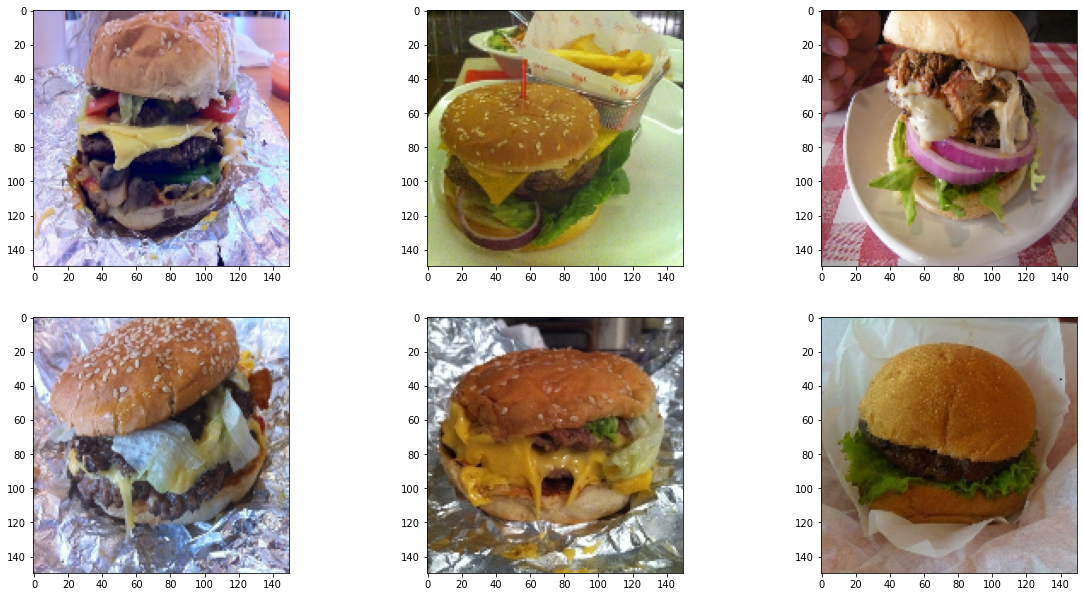

In [ ]:
plt.figure(figsize = (20, 16))
for value in list(enumerate(indices_new)):
  plt.subplot(3, 3, value[0] + 1)
  plt.imshow(cv2.cvtColor(data[value[1]], cv2.COLOR_BGR2RGB))

In [ ]:
data[0]

array([[[ 37,  41,  46],
        [ 40,  43,  51],
        [ 37,  39,  48],
        ...,
        [ 38,  36,  48],
        [ 39,  37,  49],
        [ 37,  35,  47]],

       [[ 37,  40,  48],
        [ 35,  37,  45],
        [ 38,  39,  49],
        ...,
        [ 36,  34,  46],
        [ 43,  41,  53],
        [ 38,  36,  48]],

       [[ 37,  39,  49],
        [ 41,  42,  52],
        [ 39,  41,  49],
        ...,
        [ 39,  37,  49],
        [ 40,  38,  49],
        [ 37,  35,  47]],

       ...,

       [[172, 183, 173],
        [189, 198, 188],
        [201, 209, 199],
        ...,
        [154, 158, 147],
        [152, 154, 142],
        [153, 153, 141]],

       [[161, 172, 162],
        [179, 188, 178],
        [196, 204, 194],
        ...,
        [150, 156, 145],
        [148, 152, 140],
        [148, 150, 138]],

       [[153, 164, 154],
        [164, 173, 163],
        [186, 195, 184],
        ...,
        [148, 154, 143],
        [146, 150, 138],
        [148, 149, 137]]

In [ ]:
import pickle

try:
  with open('data_.pkl', 'wb') as f:
    pickle.dump(f, extracted_features_)
except Exception as e:
  print(e.with_traceback)
else:
  print('data saved successfully')

<built-in method with_traceback of TypeError object at 0x7f2530466720>


In [ ]:
pickle.dump(data, open('data.pkl', 'wb'))

In [ ]:
pickle.dump(extracted_features_, open('features.pkl', 'wb'))

In [ ]:
pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......functional
.........layers
............conv2d
...............vars
..................0
..................1
............conv2d_1
...............vars
..................0
..................1
............conv2d_10
...............vars
..................0
..................1
............conv2d_11
...............vars
..................0
..................1
............conv2d_12
...............vars
..................0
..................1
............conv2d_2
...............vars
..................0
..................1
............conv2d_3
...............vars
..................0
..................1
............conv2d_4
...............vars
..................0
..................1
............conv2d_5
...............vars
..................0
..................1
............conv2d_6
...............vars
..................0
..................1
............conv2d_7
...............vars
..................0
..................1